# 🚗 Projet 9 Développement d'une preuve de concept : Segmentation d'images haute résolution, SegFormer vs CNN traditionnels

## 🎯 Contexte et Mission

Dans le cadre d'un test technique pour **DataSpace**, ce notebook évalue l'efficacité des architectures **Vision Transformer** modernes pour la segmentation d'images haute résolution, en comparaison avec les approches CNN traditionnelles.

### Problématique métier
Les systèmes de vision embarqués pour véhicules autonomes nécessitent une **précision maximale** pour la sécurité des usagers. Si les modèles CNN performent bien en basse résolution (224x224), le passage à des **résolutions plus élevées (512x512)** révèle de nouveaux défis :
- Détection critique des piétons et cyclistes à distance
- Segmentation précise des objets partiellement occultés  
- Gestion de la complexité spatiale accrue

### Objectifs de l'étude
1. **Évaluer SegFormer** (Vision Transformer, 2021) face aux meilleures approches CNN identifiées précédemment
2. **Analyser l'impact de la résolution** sur les performances de segmentation
3. **Démontrer les avantages** des architectures modernes pour les applications critiques
4. **Fournir une preuve de concept** prête pour l'intégration industrielle

## 🔬 Méthodologie de comparaison

### Modèles évalués
- **Baseline CNN 1** : FPN + EfficientNetB0 (champion précédent @ 224x224 - 75% mIoU)
- **Baseline CNN 2** : FPN + ResNet34 (co-champion précédent @ 224x224)  
- **Nouveau modèle 1** : SegFormerB0 (Version légère, comparable en complexité)
- **Nouveau modèle 2** : SegFormerB1 (Version standard avec plus de capacité)

### Architecture technique unifiée
- **Framework** : PyTorch avec `segmentation_models_pytorch`
- **Encodeurs CNN** : Pré-entraînés ImageNet avec fine-tuning activé
- **SegFormer** : Checkpoints pré-entraînés ADE20K (512x512) avec fine-tuning
- **Data Augmentation** : Pipeline aléatoire uniforme sur tous les modèles

### Dataset et résolution cible
- **Dataset** : Cityscapes (8 classes principales)
- **Résolution d'entraînement** : 512x512 pixels puis 768x768
- **Justification** : Résolution haute pour préserver les détails critiques en segmentation urbaine

### Limitations méthodologiques assumées
- **Hypothèse** : Les champions CNN @ 224x224 restent les meilleures baselines @ 512x512
- **Contrainte matérielle** : Résolution 512x512 (`batch_size = 24` max) puis 768x768 (`batch_size = 8` max) avec optimisations mémoire pour GPU T4
- **Scope** : Focus sur comparaison architecturale plutôt qu'exploration exhaustive d'hyperparamètres

## 🏗️ Configuration expérimentale

### Pipeline d'entraînement unifié
- **Framework** : `segmentation_models_pytorch` pour cohérence maximale
- **Stratégie CNN** : Fine-tuning avec encodeurs ImageNet pré-entraînés
- **Stratégie SegFormer** : Fine-tuning depuis checkpoints ADE20K-160k spécialisés
- **Augmentation** : Pipeline identique (rotations, flips, ajustements colorimétriques)
- **Optimisation** : Configuration adaptée par architecture

### Architectures détaillées
- **FPN + EfficientNetB0** : 5.7M paramètres, encoder ImageNet
- **FPN + ResNet34** : Encoder ImageNet, architecture plus robuste
- **SegFormerB0** : Version légère, checkpoint `segformer-b0-512x512-ade-160k`
- **SegFormerB1** : 13.7M paramètres, checkpoint `segformer-b1-512x512-ade-160k`

### Classes de segmentation (Cityscapes - 8 groupes)
1. **Route** - Surfaces roulantes principales
2. **Trottoir** - Zones piétonnes sécurisées  
3. **Bâtiments** - Infrastructure urbaine
4. **Végétation** - Espaces naturels
5. **Véhicules** - Moyens de transport motorisés
6. **Personnes** - Piétons et cyclistes *(classe critique)*
7. **Signalisation** - Panneaux et feux de circulation
8. **Mobilier urbain** - Infrastructure de voirie

## 📋 Déroulement de l'étude

### 1. Configuration et préparation
- Setup PyTorch avec `segmentation_models_pytorch`
- Préparation dataset Cityscapes @ 512x512 puis @ 768x768 avec mapping 8 classes
- Configuration MLflow pour tracking comparatif des 4 architectures

### 2. Adaptation des modèles pré-entraînés
- **CNN baselines** : Chargement encodeurs ImageNet + initialisation têtes FPN
- **SegFormer** : Chargement checkpoints ADE20K + adaptation couche finale (150→8 classes)
- Validation des architectures sur données test

### 3. Entraînement parallèle optimisé
- **Contrainte GPU** : 15GB VRAM
- **Pipeline uniforme** : Data augmentation et callbacks identiques
- **Monitoring** : MLflow tracking pour métriques comparatives

### 4. Analyse multi-dimensionnelle
- **Performance** : Mean IoU global et IoU par classe critique
- **Efficacité** : Ratio performance/complexité computationnelle  
- **Robustesse** : Analyse qualitative sur cas difficiles
- **Scalabilité** : Impact de l'augmentation de résolution par architecture

### 5. Validation métier et preuve de concept
- **Classes critiques** : Focus spécifique personnes/véhicules
- **Analyse d'erreurs** : Identification faux négatifs dangereux
- **Dashboard interactif** : Streamlit avec comparaison visuelle des 4 modèles

## 🎯 Hypothèses et attentes

### Avantages attendus de SegFormer
- **Attention globale** : Meilleure compréhension du contexte urbain complexe
- **Multi-scale native** : Gestion des objets de tailles variées sans pyramides explicites
- **Pré-entraînement spécialisé** : Checkpoints ADE20K optimisés pour la segmentation

### Comparaison B0 vs B1
- **SegFormerB0** : Équilibre performance/efficacité, concurrent direct des CNN
- **SegFormerB1** : Performance maximale, validation du potentiel Transformer

### Validation de l'hypothèse principale
Cette étude vise à démontrer empiriquement que les **architectures Vision Transformer** offrent un avantage significatif pour la segmentation haute résolution dans les applications critiques, justifiant l'évolution technologique malgré la complexité accrue.

## 🔧 Contraintes techniques

### Limitations matérielles
- **GPU** : NVIDIA T4 15GB (contrainte mémoire moyenne)
- **Infrastructure** : Google Colab Pro nécessaire pour l'entraînement SegFormer (temps de calcul élevé)
- **Résolution** : 512x512 puis 768x768 optimisée pour performance GPU/mémoire

### Adaptations requises
- **SegFormer** : Remplacement couche finale 150→8 classes depuis checkpoints ADE20K
- **Batch size** : Optimisation pour contrainte mémoire GPU T4
- **Temps d'entraînement** : Plan payant Google Colab requis pour convergence SegFormer
- **Pipeline data** : Augmentation équilibrée pour toutes les architectures

---

*Ce travail constitue une étude comparative rigoureuse visant à identifier l'architecture optimale pour les systèmes de vision embarqués nouvelle génération, en tenant compte des contraintes industrielles réelles.*

## GPU et mémoire RAM

Une gestion de la mixed precision (scaler + autocast) sera également proposée dans la partie "Entrainement" afin de réduire le temps de calcul.

In [1]:
# ====================================================================
# INFORMATIONS SYSTÈME
# ====================================================================

# GPU Info
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
    print('Not connected to a GPU')
else:
    print(gpu_info)

# RAM Info
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
    print('Not using a high-RAM runtime')
else:
    print('You are using a high-RAM runtime!')

/bin/bash: line 1: nvidia-smi: command not found
Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
# ====================================================================
# CONFIGURATION PYTORCH GPU
# ====================================================================

import torch
import gc

# Vérification GPU PyTorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"PyTorch device: {device}")

if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

    # Activer mixed precision pour PyTorch (équivalent de set_global_policy)
    # On utilisera torch.amp.autocast('cuda') dans les training loops
    print("Mixed precision sera activée avec torch.cuda.amp")

PyTorch device: cpu


In [3]:
# ====================================================================
# GESTION DE LA VRAM PYTORCH
# ====================================================================

def deep_clean_memory():
    """
    Nettoyage complet de la mémoire entre les modèles PyTorch
    Plus simple qu'avec TensorFlow !
    """
    print("🧹 Nettoyage mémoire PyTorch...")

    # 1. Vider le cache CUDA PyTorch (le plus important)
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.synchronize()  # Attendre que toutes les opérations GPU soient finies

    # 2. Forcer le garbage collector Python
    gc.collect()

    print("✅ Mémoire PyTorch nettoyée")

def monitor_gpu_memory(stage=""):
    """Surveillance de la VRAM avec PyTorch natif"""

    if torch.cuda.is_available():
        # Méthode PyTorch native (toujours disponible)
        allocated = torch.cuda.memory_allocated(0) / 1e9
        reserved = torch.cuda.memory_reserved(0) / 1e9
        total = torch.cuda.get_device_properties(0).total_memory / 1e9

        print(f"🔥 {stage} VRAM: {allocated:.1f}GB allocated, {reserved:.1f}GB reserved / {total:.1f}GB total")

        # Méthode GPUtil optionnelle (plus de détails si disponible)
        try:
            import GPUtil
            gpus = GPUtil.getGPUs()
            if gpus:
                gpu = gpus[0]
                used_gb = gpu.memoryUsed / 1024
                print(f"🖥️  {stage} GPUtil: {used_gb:.1f}GB used ({gpu.memoryPercent:.1f}%)")
                return gpu.memoryUsed
        except ImportError:
            # Pas d'erreur, juste pas d'info supplémentaire
            pass
        except Exception as e:
            print(f"⚠️  GPUtil error: {e}")

        return allocated
    else:
        print(f"🚫 {stage} Pas de GPU disponible")
        return 0

In [4]:
# Test initial
monitor_gpu_memory("Initial")
deep_clean_memory()
monitor_gpu_memory("After cleanup")

🚫 Initial Pas de GPU disponible
🧹 Nettoyage mémoire PyTorch...
✅ Mémoire PyTorch nettoyée
🚫 After cleanup Pas de GPU disponible


0

## 🔗 Connexion à Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')
import os
drive_folder=  "/content/drive/MyDrive/Colab_Notebooks/Project_9/notebooks"
os.chdir(drive_folder)
os.listdir()

Mounted at /content/drive


['content',
 'unet_architecture_simple.png',
 'model_architecture_1.png',
 'model_architecture_2.png',
 'model_architecture_3.png',
 'results',
 'requirements.txt',
 'p9_notebook.ipynb',
 'artifacts',
 'p8_notebook.ipynb',
 'p9_notebook_refactor_progress.ipynb']

## 🚗 Jeu de données

Nous utilisons le jeu de données [Cityscapes](https://www.cityscapes-dataset.com/dataset-overview/) qui se concentre sur la compréhension sémantique des scènes urbaines.

Pour notre modèle de segmentation d'images, nous exploitons les **5 000 images annotées avec des annotations fines** (fine annotations). Exemples [ici](https://www.cityscapes-dataset.com/examples/#fine-annotations).

Ce dataset présente plusieurs caractéristiques essentielles pour notre cas d'usage :
- Des annotations polygonales permettant une segmentation sémantique dense
- Une couverture de 30 classes dont nous retiendrons uniquement les **8 catégories principales** déjà définies [ici](https://www.cityscapes-dataset.com/dataset-overview/#class-definitions) : ***flat***, ***human***, ***vehicle***, ***construction***, ***object***, ***nature***, ***sky***, ***void***.
- Une diversité importante avec des données provenant de **50 villes différentes**, capturées sur plusieurs mois (printemps, été, automne)
- Des conditions variées mais contrôlées (jour, conditions météorologiques bonnes à moyennes)
- Des **scènes sélectionnées manuellement pour leur complexité** (nombreux objets dynamiques, variations dans l'agencement des scènes et l'arrière-plan)

**Documentation**

- https://www.cityscapes-dataset.com/dataset-overview/
- https://github.com/mcordts/cityscapesScripts



Nous utilisons le jeu de données **Cityscapes** qui contient **5 000 images avec des annotations fines**. La séparation entre *train*, *val* et *test* est déjà effectuée :
- Entraînement : 2 975
- Validation : 500
- Test : 1 525

Le format Cityscapes fournit plusieurs fichiers d'annotation pour chaque image originale. Cette structure facilite différentes approches de traitement et d'apprentissage. Pour chaque image d'origine, nous disposons de :
- Des fichiers `*_gtFine_instanceIds.png` qui encodent à la fois la classe et l'identifiant d'instance de chaque pixel
- Des fichiers `*_gtFine_labelIds.png` qui contiennent uniquement les identifiants de classe pour la segmentation sémantique
- Des fichiers `*_gtFine_color.png` qui offrent une représentation visuelle colorée des segmentations
- Des fichiers `*_gtFine_polygons.json` qui stockent les annotations sous forme vectorielle (polygones)

Cette richesse d'annotations nous permettra de développer un modèle robuste pour notre système de vision par ordinateur embarqué chez Future Vision Transport.

## Configuration de l'environnement et des dépendances

In [6]:
!pip install mlflow boto3 dotenv albumentations segmentation_models_pytorch --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 703.4/703.4 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203

In [43]:
# ---------------------------------------
# Imports Système et Utilitaires
# ---------------------------------------
import os
import sys
import random
import json
import shutil
import zipfile
from datetime import datetime
import glob
import time  # ← Pour mesurer le temps d'entraînement
import tempfile

# ---------------------------------------
# Data Science & Manipulation
# ---------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as PILImage
from tqdm import tqdm
import requests
import itertools
from sklearn.metrics import confusion_matrix

# ---------------------------------------
# Scikit-learn : pour gestion du split train/test
# ---------------------------------------
from sklearn.model_selection import train_test_split

# ---------------------------------------
# PyTorch & Segmentation Models PyTorch
# ---------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

# Segmentation Models PyTorch
import segmentation_models_pytorch as smp

# Pour les augmentations de données (remplace tf augmentations)
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ---------------------------------------
# MLflow : suivi d'expériences & gestion modèles
# ---------------------------------------
import mlflow
import mlflow.pytorch  # ← CHANGÉ: mlflow.keras → mlflow.pytorch
from mlflow.models.signature import infer_signature
from mlflow import MlflowClient
from mlflow.models.signature import ModelSignature
from mlflow.types import Schema, ColSpec, TensorSpec

# ---------------------------------------
# Environnements Colab & variables d'environnement
# ---------------------------------------
from google.colab import userdata
from dotenv import load_dotenv

# Chargement des variables d'environnement du fichier .env
load_dotenv(dotenv_path='../.env')

# Ajouter le dossier parent du notebook au PYTHONPATH
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# Chargement de fonctions diverses communes à l'entraînement et à l'inférence
# ATTENTION: Ces utils functions devront peut-être être adaptées pour PyTorch
from utils.utils import load_cityscapes_config, get_preprocessing_fn, load_model, load_best_model_from_registry, map_mask_ids, run_inference_and_visualize

In [8]:
# Vérification de la configuration
print(f"PyTorch version: {torch.__version__}")
print(f"Segmentation Models PyTorch version: {smp.__version__ if hasattr(smp, '__version__') else 'N/A'}")
print(f"CUDA disponible: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"CUDA version: {torch.version.cuda}")

# Définition des chemins des données (INCHANGÉ)
g_drive_dir = drive_folder
g_drive_dir_content = os.path.join(g_drive_dir, "content")
data_dir = os.path.join(g_drive_dir_content, "data")
cityscapes_unzipped_dir = os.path.join("/content", "data", "cityscapes_unzipped")

# Création des dossiers s'il n'existent pas déjà
os.makedirs(data_dir, exist_ok=True)
os.makedirs(os.path.join(g_drive_dir_content, 'models'), exist_ok=True)
os.makedirs(os.path.join(g_drive_dir_content, 'models', 'checkpoints'), exist_ok=True)
os.makedirs(os.path.join(g_drive_dir_content, 'logs'), exist_ok=True)

# Configuration des graines aléatoires pour la reproductibilité
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)  # ← CHANGÉ: tf.random.set_seed → torch.manual_seed
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # Pour multi-GPU
    # Pour plus de reproductibilité (peut ralentir un peu)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Configuration de MLflow avec les variables d'environnement (INCHANGÉ)
mlflow_tracking_uri = os.getenv("MLFLOW_TRACKING_URI")
mlflow_s3_endpoint_url = os.getenv("MLFLOW_S3_ENDPOINT_URL")
aws_access_key_id = os.getenv("AWS_ACCESS_KEY_ID")
aws_secret_access_key = os.getenv("AWS_SECRET_ACCESS_KEY")

# Configuration explicite de MLflow
mlflow.set_tracking_uri(mlflow_tracking_uri)
print(f"MLflow Tracking URI: {mlflow_tracking_uri}")

# Configuration explicite des identifiants AWS
os.environ["MLFLOW_S3_ENDPOINT_URL"] = mlflow_s3_endpoint_url
os.environ["AWS_ACCESS_KEY_ID"] = aws_access_key_id
os.environ["AWS_SECRET_ACCESS_KEY"] = aws_secret_access_key
print("Identifiants AWS configurés")

# Paramètres globaux PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # ← CHANGÉ: format PyTorch
print(f"Appareil utilisé: {device}")

PyTorch version: 2.8.0+cu126
Segmentation Models PyTorch version: 0.5.0
CUDA disponible: False
MLflow Tracking URI: https://mlflow.greg-madman-nas.duckdns.org/
Identifiants AWS configurés
Appareil utilisé: cpu


In [9]:
# Créer l'expérience MLflow
mlflow_experiment = "OC Projet 9"  # ← CHANGÉ: "OC Projet 8" → "OC Projet 9"
mlflow.set_experiment(mlflow_experiment)

<Experiment: artifact_location='s3://mlflow-artifacts/8', creation_time=1756193446752, experiment_id='8', last_update_time=1756193446752, lifecycle_stage='active', name='OC Projet 9', tags={}>

In [10]:
# Vérifications MLflow (INCHANGÉ)
print(f"MLflow version: {mlflow.__version__}")
print(f"MLflow tracking URI: {mlflow.get_tracking_uri()}")

# Test direct de l'API
from mlflow.tracking import MlflowClient
client = MlflowClient()
try:
    models = client.search_registered_models()
    print(f"✅ API MLflow fonctionne, {len(models)} modèles trouvés")
except Exception as e:
    print(f"❌ Erreur API MLflow: {e}")

MLflow version: 3.3.2
MLflow tracking URI: https://mlflow.greg-madman-nas.duckdns.org/
✅ API MLflow fonctionne, 3 modèles trouvés


In [11]:
# Test détaillé MLflow
print(f"URI: {os.getenv('MLFLOW_TRACKING_URI')}")
client = MlflowClient()
try:
    experiments = client.search_experiments()
    print(f"✅ search_experiments OK: {len(experiments)} found")

    # Test de recherche de modèle
    models = client.search_model_versions("name='StreetsSegmentation'")
    print(f"✅ search_model_versions OK: {len(models)} found")

except Exception as e:
    print(f"❌ Erreur: {e}")


URI: https://mlflow.greg-madman-nas.duckdns.org/
✅ search_experiments OK: 4 found
✅ search_model_versions OK: 2 found


In [12]:
print("✅ Imports PyTorch configurés avec succès!")

✅ Imports PyTorch configurés avec succès!


## Téléchargement et préparation des données Cityscapes

In [13]:
def download_and_extract_cityscapes():
    """Télécharge et extrait les données Cityscapes si elles n'existent pas déjà"""

    # Création des répertoires nécessaires s'ils n'existent pas
    os.makedirs(data_dir, exist_ok=True) # data_dir est sur Drive pour stocker les zips
    os.makedirs(cityscapes_unzipped_dir, exist_ok=True) # Créer le dossier unzipped dans /content

    # Liens vers les fichiers zip Cityscapes
    gtFine_url = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_gtFine_trainvaltest.zip"
    leftImg_url = "https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+8+-+Participez+%C3%A0+la+conception+d'une+voiture+autonome/P8_Cityscapes_leftImg8bit_trainvaltest.zip"

    # Chemins locaux pour les fichiers zip (sur Google Drive dans data_dir)
    gtFine_zip = os.path.join(data_dir, "P8_Cityscapes_gtFine_trainvaltest.zip")
    leftImg_zip = os.path.join(data_dir, "P8_Cityscapes_leftImg8bit_trainvaltest.zip")

    # Fonction pour télécharger un fichier avec barre de progression
    def download_file(url, filename):
        # Vérifier si le fichier existe déjà et a une taille non nulle
        if os.path.exists(filename) and os.path.getsize(filename) > 0:
            print(f"Le fichier {os.path.basename(filename)} existe déjà. Pas de téléchargement.")
            return True # Considérer comme succès si le fichier existe

        response = requests.get(url, stream=True)
        response.raise_for_status()  # Vérification des erreurs HTTP

        total_size = int(response.headers.get('content-length', 0))
        block_size = 1024  # 1 KB
        # Utilisation de tqdm pour une barre de progression interactive
        progress_bar = tqdm(total=total_size, unit='iB', unit_scale=True, desc=f"Téléchargement {os.path.basename(filename)}")

        with open(filename, 'wb') as file:
            for data in response.iter_content(block_size):
                progress_bar.update(len(data))
                file.write(data)

        progress_bar.close()

        if total_size != 0 and progress_bar.n != total_size:
            print(f"ERREUR: le téléchargement de {os.path.basename(filename)} n'est pas complet")
            return False

        return True

    # --- Logique de Téléchargement et Extraction ---
    # Vérification si les données extraites existent déjà dans /content/data/cityscapes_unzipped
    # On vérifie la présence d'un dossier caractéristique des données extraites
    extracted_data_check_path = os.path.join(cityscapes_unzipped_dir, "gtFine", "train")

    # Si les données extraites ne sont PAS présentes dans le répertoire temporaire
    if not os.path.exists(extracted_data_check_path):
        print("\n=== VÉRIFICATION ET TÉLÉCHARGEMENT DES FICHIERS ZIP ===")

        # Téléchargement des fichiers zip si nécessaire (dans data_dir sur Drive)
        download_success_gtFine = download_file(gtFine_url, gtFine_zip)
        download_success_leftImg = download_file(leftImg_url, leftImg_zip)

        if not download_success_gtFine or not download_success_leftImg:
            print("❌ Échec du téléchargement d'un ou plusieurs fichiers zip.")
            return False

        print("✅ Fichiers zip vérifiés ou téléchargés dans Google Drive.")

        print("\n=== EXTRACTION DES FICHIERS ZIP VERS L'ENVIRONNEMENT TEMPORAIRE ===")
        print(f"Extraction vers: {cityscapes_unzipped_dir}")

        # Extraction des fichiers zip VERS cityscapes_unzipped_dir (/content/data/cityscapes_unzipped)
        print("Extraction des annotations (gtFine)...")
        try:
            with zipfile.ZipFile(gtFine_zip, 'r') as zip_ref:
                # Extraction avec barre de progression
                for member in tqdm(zip_ref.infolist(), desc="Extraction gtFine"):
                    zip_ref.extract(member, cityscapes_unzipped_dir) # <-- Extraction vers le dossier /content
            print("Extraction des annotations terminée.")
        except zipfile.BadZipFile:
            print(f"❌ Erreur: {gtFine_zip} n'est pas un fichier ZIP valide.")
            return False
        except Exception as e:
            print(f"❌ Erreur lors de l'extraction de gtFine: {e}")
            return False


        print("Extraction des images (leftImg8bit)...")
        try:
            with zipfile.ZipFile(leftImg_zip, 'r') as zip_ref:
                # Extraction avec barre de progression
                for member in tqdm(zip_ref.infolist(), desc="Extraction leftImg8bit"):
                    zip_ref.extract(member, cityscapes_unzipped_dir) # <-- Extraction vers le dossier /content
            print("Extraction des images terminée.")
        except zipfile.BadZipFile:
            print(f"❌ Erreur: {leftImg_zip} n'est pas un fichier ZIP valide.")
            return False
        except Exception as e:
            print(f"❌ Erreur lors de l'extraction de leftImg8bit: {e}")
            return False

        print("\n✅ Préparation des données Cityscapes (extraction) terminée dans l'environnement temporaire.")
    else:
        print("\n✅ Les données Cityscapes semblent déjà extraites dans l'environnement temporaire.")

    return True

# Télécharger et extraire les données Cityscapes en utilisant les nouveaux chemins
download_and_extract_cityscapes()

# Mettre à jour la variable cityscapes_dir pour qu'elle pointe vers le dossier des données extraites
# Les fonctions suivantes (préparation, visualisation) utiliseront cette variable
cityscapes_dir = cityscapes_unzipped_dir
print(f"\nVariable 'cityscapes_dir' mise à jour vers: {cityscapes_dir}")


=== VÉRIFICATION ET TÉLÉCHARGEMENT DES FICHIERS ZIP ===
Le fichier P8_Cityscapes_gtFine_trainvaltest.zip existe déjà. Pas de téléchargement.
Le fichier P8_Cityscapes_leftImg8bit_trainvaltest.zip existe déjà. Pas de téléchargement.
✅ Fichiers zip vérifiés ou téléchargés dans Google Drive.

=== EXTRACTION DES FICHIERS ZIP VERS L'ENVIRONNEMENT TEMPORAIRE ===
Extraction vers: /content/data/cityscapes_unzipped
Extraction des annotations (gtFine)...


Extraction gtFine: 100%|██████████| 20032/20032 [00:06<00:00, 2947.11it/s]


Extraction des annotations terminée.
Extraction des images (leftImg8bit)...


Extraction leftImg8bit: 100%|██████████| 5032/5032 [02:23<00:00, 35.16it/s]

Extraction des images terminée.

✅ Préparation des données Cityscapes (extraction) terminée dans l'environnement temporaire.

Variable 'cityscapes_dir' mise à jour vers: /content/data/cityscapes_unzipped


In [14]:
split = 'train'
images_dir = os.path.join(cityscapes_unzipped_dir, 'leftImg8bit', split)
masks_dir = os.path.join(cityscapes_unzipped_dir, 'gtFine', split)

# Lists to store image and mask paths
image_paths = []
mask_paths = []

# Go through all city directories
for city in os.listdir(images_dir):
    city_img_dir = os.path.join(images_dir, city)
    city_mask_dir = os.path.join(masks_dir, city)

    # Find all matching image and mask files
    for file_name in os.listdir(city_img_dir):
        if file_name.endswith('_leftImg8bit.png'):
            img_path = os.path.join(city_img_dir, file_name)
            mask_name = file_name.replace('_leftImg8bit.png', '_gtFine_labelIds.png')
            mask_path = os.path.join(city_mask_dir, mask_name)

            if os.path.exists(mask_path):
                image_paths.append(img_path)
                mask_paths.append(mask_path)

print(f"{split} dataset: {len(image_paths)} images found")

train dataset: 2975 images found


## Définition des classes et mapping pour la segmentation

Les définitions de classes officielles sont présentes [ici](https://www.cityscapes-dataset.com/dataset-overview/#class-definitions).

In [15]:
import os
import json

# Chemin vers le répertoire gtFine (assurez-vous que cityscapes_unzipped_dir est défini)
gtFine_dir = os.path.join(cityscapes_unzipped_dir, 'gtFine')

if not os.path.exists(gtFine_dir):
    print(f"Le répertoire {gtFine_dir} n'existe pas.")
else:
    print(f"Exploration du répertoire : {gtFine_dir}")
    all_labels = set()
    json_files_count = 0

    # Parcourir tous les sous-répertoires et fichiers
    for root, dirs, files in os.walk(gtFine_dir):
        for file in files:
            if file.endswith('_gtFine_polygons.json'):
                json_files_count += 1
                json_path = os.path.join(root, file)
                try:
                    with open(json_path, 'r', encoding='utf-8') as f:
                        data = json.load(f)
                        # Assurez-vous que la structure JSON correspond à ce que vous attendez
                        # Ici, on suppose que 'objects' est une liste d'objets,
                        # et chaque objet a une clé 'label'
                        if 'objects' in data:
                            for obj in data['objects']:
                                if 'label' in obj:
                                    all_labels.add(obj['label'])
                except Exception as e:
                    print(f"Erreur lors du traitement du fichier {json_path}: {e}")

    print(f"\nNombre total de fichiers JSON '_gtFine_polygons.json' trouvés : {json_files_count}")
    print("\nValeurs uniques de 'label' trouvées :")
    # Convertir l'ensemble en liste et la trier pour un affichage cohérent
    unique_labels_list = sorted(list(all_labels))
    for label in unique_labels_list:
        print(f"- {label}")

    print(f"\nNombre de valeurs uniques de 'label' : {len(unique_labels_list)}")

Exploration du répertoire : /content/data/cityscapes_unzipped/gtFine

Nombre total de fichiers JSON '_gtFine_polygons.json' trouvés : 5000

Valeurs uniques de 'label' trouvées :
- bicycle
- bicyclegroup
- bridge
- building
- bus
- car
- caravan
- cargroup
- dynamic
- ego vehicle
- fence
- ground
- guard rail
- license plate
- motorcycle
- motorcyclegroup
- out of roi
- parking
- person
- persongroup
- pole
- polegroup
- rail track
- rectification border
- rider
- ridergroup
- road
- sidewalk
- sky
- static
- terrain
- traffic light
- traffic sign
- trailer
- train
- truck
- truckgroup
- tunnel
- vegetation
- wall

Nombre de valeurs uniques de 'label' : 40


Le dataset Cityscapes fournit plusieurs types de fichiers d'annotations, ce qui peut prêter à confusion. Pour notre tâche de **segmentation sémantique**, où chaque pixel est assigné à une catégorie de classe, nous nous basons spécifiquement sur les fichiers `*_gtFine_labelIds.png`.

Ces fichiers PNG en niveaux de gris encodent la classe de chaque pixel à l'aide d'un **ID numérique**. Les IDs utilisés dans ces fichiers vont de **0 à 33**.

Les définitions et la correspondance entre ces IDs numériques et les noms de classes sont documentées dans le script `labels.py` du dépôt CityscapesScripts ([`cityscapesscripts/helpers/labels.py`](https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py)). Ce fichier liste 34 entrées (IDs 0 à 33) avec leurs noms, catégories, couleurs, etc.

Parallèlement, le dataset inclut d'autres formats d'annotations, comme les fichiers `*_gtFine_polygons.json`. Ces fichiers contiennent des informations plus détaillées, y compris des annotations vectorielles (polygones) et peuvent référencer un ensemble plus large de labels, potentiellement 40 catégories comme observé lors de l'exploration des fichiers JSON, incluant des labels d'instances ou de groupes (comme 'person group') qui ne sont pas représentés par des IDs distincts dans les fichiers `*_gtFine_labelIds.png` utilisés pour la segmentation sémantique pixel-par-pixel.

De même, le fichier `labels_cityPersons.py` ([`cityscapesscripts/helpers/labels_cityPersons.py`](https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels_cityPersons.py)) définit des classes spécifiquement pour l'annotation des instances de personnes et de cyclistes, qui sont utilisées dans d'autres contextes ou formats d'annotation du dataset, mais pas dans les `*_gtFine_labelIds.png` pour la segmentation sémantique de base.

**Pour notre projet de segmentation sémantique, nous utilisons donc uniquement les IDs numériques présents dans les fichiers `*_gtFine_labelIds.png` et nous mappons ces IDs (0 à 33) à nos 8 groupes de classes définis.** L'exploration des labels dans les fichiers JSON était utile pour comprendre la richesse du dataset, mais le mapping du modèle se base sur les IDs des masques `_labelIds.png`.

In [16]:
mapping_config = load_cityscapes_config("../cityscapes_config.json")

== Groupes de classes Cityscapes ==
  - flat : ['road', 'sidewalk', 'parking', 'rail track']
  - human : ['person', 'rider']
  - vehicle : ['car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'caravan', 'trailer']
  - construction : ['building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel']
  - object : ['pole', 'pole group', 'traffic sign', 'traffic light']
  - nature : ['vegetation', 'terrain']
  - sky : ['sky']
  - void : ['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground']

== Mapping ID Cityscapes → Groupe ==
  ID  0 ('unlabeled') → groupe 'void' (7)
  ID  1 ('ego vehicle') → groupe 'void' (7)
  ID  2 ('rectification border') → groupe 'void' (7)
  ID  3 ('out of roi') → groupe 'void' (7)
  ID  4 ('static') → groupe 'void' (7)
  ID  5 ('dynamic') → groupe 'void' (7)
  ID  6 ('ground') → groupe 'void' (7)
  ID  7 ('road') → groupe 'flat' (0)
  ID  8 ('sidewalk') → groupe 'flat' (0)
  ID  9 ('parking') → groupe 'flat' (0)
  ID 10

Le tableau `id_to_group` a une taille de **256 éléments** car il correspond à toutes les valeurs possibles sur **8 bits** (de 0 à 255), soit la plage complète des IDs de classes que peuvent prendre les masques d'annotation Cityscapes.

Même si dans notre cas précis on ne mappe que 34 IDs utilisés, on crée un tableau complet pour :

- Permettre un accès direct et rapide par index (ID) sans calcul supplémentaire.
- Gérer des masques pouvant contenir n'importe quelle valeur d'ID possible (y compris des valeurs non utilisées).
- Assurer la robustesse de la conversion sans erreurs d’index hors limites.

Ainsi, chaque valeur d’ID dans un masque peut être convertie en son groupe associé en un accès simple via `id_to_group[ID]`.

Les IDs non présents dans notre mapping restent mappés à 0 (par défaut), mais on peut aussi choisir une autre valeur spéciale pour représenter une classe "void" ou "non définie".


In [17]:
id_to_group = mapping_config['id_to_group']
id_to_group

array([7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5,
       5, 6, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Architecture de Segmentation 🖼️✨

Pour la tâche de segmentation d’images, deux architectures principales sont utilisées dans cette étude : **U-Net** et **FPN (Feature Pyramid Network)**.

---

### Les architectures principales 🏗️

- **U-Net** 🔄  
  U-Net est composée de deux parties symétriques :
  - 🧱 **Un encodeur (chemin descendant)** qui extrait les caractéristiques de plus en plus abstraites grâce à des convolutions et du max-pooling.
  - 🏗️ **Un décodeur (chemin ascendant)** qui reconstruit une image de même taille que l’entrée à l’aide d’upsampling (ou transposed convolutions).
  - Chaque niveau du décodeur reçoit également des **"skip connections"** venant de l’encodeur à la même résolution, pour préserver les détails spatiaux.

  U-Net est donc efficace quand il faut localiser précisément des objets (par exemple en imagerie médicale).

  <img src="https://datascientest.com/wp-content/uploads/2021/05/u-net-architecture-1024x682.png" width="800" />

- **FPN (Feature Pyramid Network)** 🧭  
  FPN est une architecture conçue pour capturer efficacement des objets à **différentes échelles**, grâce à une combinaison intelligente de caractéristiques extraites à plusieurs résolutions.

  Elle repose sur deux étapes principales :
  
  1. 🔽 **Chemin descendant (bottom-up)** :  
     L’image passe dans un encodeur profond (souvent un ResNet), qui génère des cartes de caractéristiques à plusieurs résolutions (`1/4`, `1/8`, `1/16`, `1/32`).  
     Plus la résolution est petite, plus l’information est abstraite.
  
  2. 🔼 **Chemin ascendant (top-down)** :  
     Les cartes profondes sont **upsamplées progressivement** (x2 à chaque étape) et **fusionnées avec des cartes plus superficielles** à l’aide de *connexions latérales* (lateral connections).  
     Cette fusion permet de combiner des informations **globales et locales** à chaque niveau de la pyramide.

  Finalement, les différentes cartes sont combinées et passées dans un petit réseau convolutionnel (souvent un 3x3) pour produire la **prédiction finale**.

  👉 Cette approche rend FPN particulièrement efficace sur des images avec des objets de **tailles très variées**, comme en vision par ordinateur généraliste (urbain, aérien, etc.).

  Le modèle a été historiquement entraîné avec ResNet50 et ResNet101 par l'équipe de chercheurs.
> **“We build FPN on top of ResNet-50/101 [21], which are used as backbone feature extractors.”**  
> — *Feature Pyramid Networks for Object Detection*,  
> Tsung-Yi Lin, Piotr Dollár, Ross Girshick, Kaiming He, Serge Belongie.  
> *CVPR 2017*  
> [arXiv:1612.03144](https://arxiv.org/abs/1612.03144)


  *(Le schéma ci-dessous illustre cette architecture dans le contexte original de la détection, mais le principe est le même en segmentation sémantique.)*

  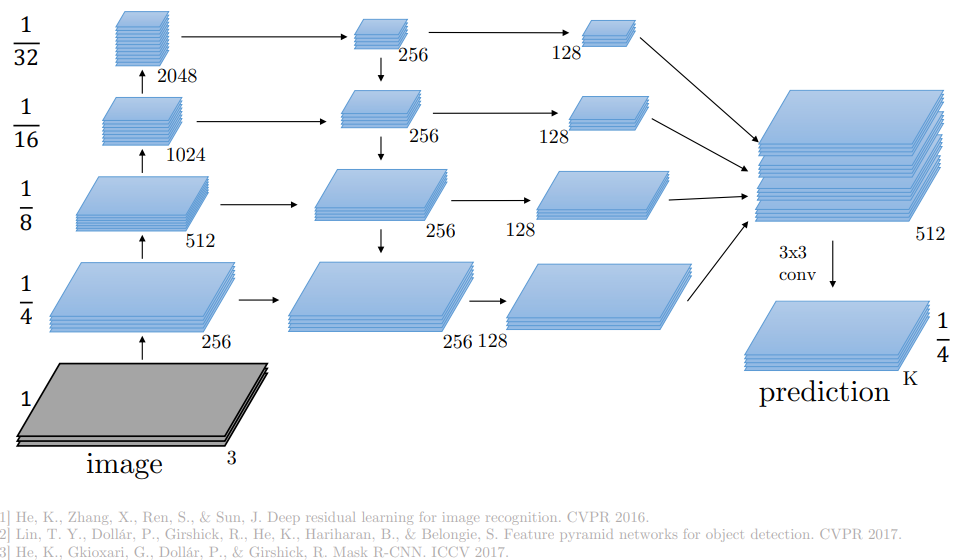

---

### Choix des encodeurs 🧠

Plusieurs encodeurs sont disponibles pour ces architectures :  
- **Encodeur intégré** 🆕 : L’encodeur est entraîné en même temps que le décodeur, sans poids pré-entraînés. Pour U-Net, il a été développé *from scratch* mais pour FPN, il s'agira de ResNet34 (plus léger que ResNet50, le modèle de feature extraction originellement utilisé dans les travaux de recherche).
- **MobilenetV2 pré-entraîné** 🚀 : Un encodeur léger et efficace, pré-entraîné sur ImageNet, permettant un bon compromis entre rapidité et performance.  
- **EfficientNetB0 pré-entraîné** ⚡ : Un encodeur plus puissant et performant, également basé sur un modèle pré-entraîné, utilisé pour tirer parti du transfert learning.

ℹ️ Par défaut, la bibliothèque `segmentation_models` utilise **ResNet34 pré-entraîné sur ImageNet** comme encodeur si aucun autre n’est spécifié.

---

### Gel ou fine-tuning de l’encodeur ❄️🔥

Lors de l’entraînement, deux stratégies sont possibles :  
- **Encodage gelé** ❄️ : Les poids de l’encodeur pré-entraîné restent fixes, ce qui accélère l’entraînement et évite la modification de caractéristiques déjà apprises.  
- **Encodage entraînable (fine-tuning)** 🔥 : Les poids de l’encodeur sont ajustés pour mieux s’adapter aux données spécifiques, ce qui peut améliorer les performances au prix d’un temps d’entraînement plus long.

---

### Stratégie recommandée pour l’expérimentation 🎯

1. **Tester toutes les architectures et encodeurs avec l’encodeur gelé** ❄️ pour un benchmark rapide.  
2. **Sélectionner la meilleure configuration** 🏆 selon les performances obtenues.  
3. **Refaire l’entraînement avec l’encodeur dégelé (fine-tuning)** 🔥 pour optimiser les résultats finaux.

Cette méthode permet de gagner du temps tout en explorant efficacement l’espace des modèles.



### Création des modèles

In [18]:
# Configuration pour résolution plus haute
IMG_SIZE = 768  # ← NOUVELLE résolution (était 224x224)
BATCH_SIZE = 8  # ← Optimisé pour GPU T4 15GB

print(f"Configuration: {IMG_SIZE}x{IMG_SIZE} pixels, batch_size={BATCH_SIZE}")

Configuration: 768x768 pixels, batch_size=8


In [19]:
# === FONCTION DE PERTE PERSONNALISÉE ===
class CategoricalFocalJaccardLoss(nn.Module):
    """
    Reproduction exacte de sm.losses.categorical_focal_jaccard_loss pour PyTorch
    Combine FocalLoss (gestion déséquilibre classes) + JaccardLoss (IoU)
    """
    def __init__(self, focal_weight=1.0, jaccard_weight=1.0,
                 alpha=0.25, gamma=2.0, smooth=1.0):
        super().__init__()
        self.focal_weight = focal_weight
        self.jaccard_weight = jaccard_weight

        self.focal_loss = smp.losses.FocalLoss(
            mode='multiclass',
            alpha=alpha,
            gamma=gamma
        )

        self.jaccard_loss = smp.losses.JaccardLoss(
            mode='multiclass',
            from_logits=True,
            smooth=smooth
        )

    def forward(self, pred, target):
        focal = self.focal_loss(pred, target)
        jaccard = self.jaccard_loss(pred, target)

        return (self.focal_weight * focal +
                self.jaccard_weight * jaccard)
print("✅ Fonction de perte CategoricalFocalJaccardLoss définie")

✅ Fonction de perte CategoricalFocalJaccardLoss définie


In [20]:
def show_available_backbones():
    """Affiche tous les backbones disponibles dans segmentation_models_pytorch"""

    try:
        # PyTorch segmentation models a une structure différente
        import segmentation_models_pytorch.encoders as encoders

        print("🔧 BACKBONES DISPONIBLES DANS SEGMENTATION_MODELS_PYTORCH:")
        print("=" * 65)

        # Les encoders sont organisés différemment en PyTorch
        encoder_names = list(encoders.encoders.keys())

        # Grouper par famille
        families = {
            'ResNet': [b for b in encoder_names if b.startswith('resnet')],
            'SEResNet': [b for b in encoder_names if b.startswith('seresnet')],
            'SEResNeXt': [b for b in encoder_names if b.startswith('seresnext')],
            'ResNeXt': [b for b in encoder_names if b.startswith('resnext')],
            'VGG': [b for b in encoder_names if b.startswith('vgg')],
            'DenseNet': [b for b in encoder_names if b.startswith('densenet')],
            'EfficientNet': [b for b in encoder_names if 'efficientnet' in b],
            'MobileNet': [b for b in encoder_names if 'mobilenet' in b],
            'RegNet': [b for b in encoder_names if 'regnet' in b],
            'MiT (SegFormer)': [b for b in encoder_names if 'mit-' in b],
        }

        for family, models in families.items():
            if models:
                print(f"\n📱 {family}:")
                for model in sorted(models):
                    print(f"   • {model}")

        print(f"\n📊 Total: {len(encoder_names)} backbones disponibles")

    except Exception as e:
        print(f"Erreur lors de la récupération des backbones: {e}")

        # Fallback avec les principaux backbones PyTorch connus
        main_backbones = [
            'efficientnet-b0', 'efficientnet-b1', 'efficientnet-b2',
            'resnet34', 'resnet50', 'mobilenet_v2',
            'nvidia/mit-b0', 'nvidia/mit-b1', 'nvidia/mit-b2'  # Pour SegFormer
        ]

        print("🔧 BACKBONES PRINCIPAUX (fallback):")
        for backbone in main_backbones:
            print(f"   • {backbone}")

# Afficher les backbones disponibles
show_available_backbones()

🔧 BACKBONES DISPONIBLES DANS SEGMENTATION_MODELS_PYTORCH:

📱 ResNet:
   • resnet101
   • resnet152
   • resnet18
   • resnet34
   • resnet50

📱 ResNeXt:
   • resnext101_32x16d
   • resnext101_32x32d
   • resnext101_32x48d
   • resnext101_32x4d
   • resnext101_32x8d
   • resnext50_32x4d

📱 VGG:
   • vgg11
   • vgg11_bn
   • vgg13
   • vgg13_bn
   • vgg16
   • vgg16_bn
   • vgg19
   • vgg19_bn

📱 DenseNet:
   • densenet121
   • densenet161
   • densenet169
   • densenet201

📱 EfficientNet:
   • efficientnet-b0
   • efficientnet-b1
   • efficientnet-b2
   • efficientnet-b3
   • efficientnet-b4
   • efficientnet-b5
   • efficientnet-b6
   • efficientnet-b7
   • timm-efficientnet-b0
   • timm-efficientnet-b1
   • timm-efficientnet-b2
   • timm-efficientnet-b3
   • timm-efficientnet-b4
   • timm-efficientnet-b5
   • timm-efficientnet-b6
   • timm-efficientnet-b7
   • timm-efficientnet-b8
   • timm-efficientnet-l2
   • timm-tf_efficientnet_lite0
   • timm-tf_efficientnet_lite1
   • timm-tf_ef

In [21]:
# # ================================================================
# # CONFIGURATIONS EXPÉRIMENTALES - PYTORCH VERSION
# # FPN baselines + SegFormer pré-entraînés
# # ================================================================

# def generate_experiment_configs():
#     """
#     Configuration finale avec SegFormer en priorité
#     """
#     model_configs = []

#     # ================================================================
#     # 1. SEGFORMER PRÉ-ENTRAÎNÉS EN PREMIER (priorité critique)
#     # ================================================================

#     segformer_variants = [
#         {
#             'variant': 'b1',
#             'checkpoint': 'smp-hub/segformer-b1-512x512-ade-160k',
#             'description': 'SegFormer plus lourd, validation',
#             'batch_size': BATCH_SIZE
#         },
#         {
#             'variant': 'b0',
#             'checkpoint': 'smp-hub/segformer-b0-512x512-ade-160k',
#             'description': 'SegFormer léger, test critique',
#             'batch_size': BATCH_SIZE
#         }

#     ]

#     for variant in segformer_variants:
#         model_configs.append({
#             "name": f"SegFormer_{variant['variant']}_pretrained_finetune",
#             "architecture": "SegFormer_pretrained",
#             "checkpoint": variant['checkpoint'],
#             "classes": 8,
#             "activation": None,
#             "params": {
#                 'learning_rate': 5e-5,
#                 'epochs': 20,
#                 'batch_size': variant['batch_size'],
#                 'img_size': (IMG_SIZE, IMG_SIZE),
#                 'augmentation': True
#             },
#             "type": "segformer_new",
#             "description": variant['description'],
#             "priority": "high"
#         })

#     # ================================================================
#     # 2. FPN BASELINES ENSUITE (après validation SegFormer)
#     # ================================================================

#     fpn_baselines = [
#         {
#             'encoder': 'efficientnet-b0',
#             'description': 'Baseline de référence',
#             'priority': 'reference'
#         },
#         {
#             'encoder': 'resnet34',
#             'description': 'Alternative robuste',
#             'priority': 'high'
#         }
#     ]

#     for baseline in fpn_baselines:
#         model_configs.append({
#             "name": f"FPN_{baseline['encoder'].replace('-', '_')}_finetune_aug",
#             "architecture": "FPN",
#             "encoder_name": baseline['encoder'],
#             "encoder_weights": "imagenet",
#             "classes": 8,
#             "activation": None,
#             "params": {
#                 'learning_rate': 1.5e-4,
#                 'epochs': 20,
#                 'batch_size': BATCH_SIZE,
#                 'img_size': (IMG_SIZE, IMG_SIZE),
#                 'augmentation': True,
#                 'encoder_freeze': False
#             },
#             "type": "fpn_baseline",
#             "description": baseline['description'],
#             "priority": baseline['priority']
#         })

#     return model_configs

In [22]:
def generate_experiment_configs():
    """Configuration unifiée avec augmentations communes et hyperparamètres spécialisés par architecture"""

    model_configs = []

    # ================================================================
    # PARAMÈTRES D'AUGMENTATION COMMUNS POUR TOUS LES MODÈLES
    # ================================================================
    common_aug_params = {
        'horizontal_flip': 0.5,
        'brightness_contrast': {
            'brightness_limit': 0.15,
            'contrast_limit': 0.15,
            'p': 0.3
        },
        'gamma': {
            'gamma_limit': (80, 120),
            'p': 0.2
        },
        'rotation': {
            'limit': 8,
            'p': 0.25
        }
    }

    # ================================================================
    # SEGFORMER CONFIGS OPTIMISÉES
    # ================================================================
    segformer_variants = [
        {
            'variant': 'b1',
            'checkpoint': 'smp-hub/segformer-b1-512x512-ade-160k',
            'description': 'SegFormer B1 optimisé 20 epochs',
            'batch_size': BATCH_SIZE
        },
        {
            'variant': 'b0',
            'checkpoint': 'smp-hub/segformer-b0-512x512-ade-160k',
            'description': 'SegFormer B0 optimisé 20 epochs',
            'batch_size': BATCH_SIZE
        }
    ]

    for variant in segformer_variants:
        model_configs.append({
            "name": f"SegFormer_{variant['variant']}_pretrained_optimized",
            "architecture": "SegFormer_pretrained",
            "checkpoint": variant['checkpoint'],
            "classes": 8,
            "activation": None,
            "params": {
                # === TRAINING BASICS ===
                'epochs': 30,
                'batch_size': variant['batch_size'],
                'img_size': (IMG_SIZE, IMG_SIZE),

                # === OPTIMIZER SEGFORMER (AdamW optimisé) ===
                'optimizer': 'adamw',
                'learning_rate': 1e-4,
                'weight_decay': 1e-4,
                'eps': 1e-8,

                # === SCHEDULER SEGFORMER (Cosine) ===
                'scheduler': 'cosine',
                'warmup_epochs': 2,
                'min_lr': 1e-6,

                # === LOSS FUNCTION SEGFORMER (Jaccard seule) ===
                'loss_type': 'jaccard_only',
                'loss_params': {
                    'focal_weight': 0.0,      # Pas de Focal pour SegFormer
                    'jaccard_weight': 1.0,    # Jaccard seule
                    'alpha': 0.2,             # Non utilisé mais gardé
                    'gamma': 1.5,             # Non utilisé mais gardé
                    'smooth': 1.0
                },

                # === AUGMENTATION COMMUNE ===
                'augmentation': True,
                'aug_params': common_aug_params,

                # === CALLBACKS SEGFORMER ===
                'early_stopping': True,
                'early_stopping_patience': 5,
                'lr_reduce_patience': 3,
                'mixed_precision': True
            },
            "type": "segformer_optimized",
            "description": variant['description'],
            "priority": "high"
        })

    # ================================================================
    # FPN CONFIGS BASELINES
    # ================================================================
    fpn_baselines = [
        {
            'encoder': 'efficientnet-b0',
            'description': 'FPN EfficientNet-B0 baseline',
            'priority': 'reference'
        },
        {
            'encoder': 'resnet34',
            'description': 'FPN ResNet34 baseline',
            'priority': 'high'
        }
    ]

    for baseline in fpn_baselines:
        model_configs.append({
            "name": f"FPN_{baseline['encoder'].replace('-', '_')}_baseline",
            "architecture": "FPN",
            "encoder_name": baseline['encoder'],
            "encoder_weights": "imagenet",
            "classes": 8,
            "activation": None,
            "params": {
                # === TRAINING BASICS ===
                'epochs': 20,
                'batch_size': BATCH_SIZE,
                'img_size': (IMG_SIZE, IMG_SIZE),

                # === OPTIMIZER FPN (Adam classique) ===
                'optimizer': 'adam',
                'learning_rate': 1.5e-4,
                'weight_decay': 1e-5,

                # === SCHEDULER FPN (Plateau) ===
                'scheduler': 'plateau',
                'lr_reduce_patience': 4,

                # === LOSS FUNCTION FPN (Focal + Jaccard) ===
                'loss_type': 'focal_jaccard',
                'loss_params': {
                    'focal_weight': 1.0,      # Focal active pour FPN
                    'jaccard_weight': 1.0,    # + Jaccard
                    'alpha': 0.25,
                    'gamma': 2.0,
                    'smooth': 1.0
                },

                # === AUGMENTATION COMMUNE (identique à SegFormer) ===
                'augmentation': True,
                'aug_params': common_aug_params,

                # === CALLBACKS FPN ===
                'early_stopping': True,
                'early_stopping_patience': 7,
                'lr_reduce_patience': 4,
                'mixed_precision': True
            },
            "type": "fpn_baseline",
            "description": baseline['description'],
            "priority": baseline['priority']
        })

    print(f"✅ Configurations générées: {len(model_configs)} modèles")
    print(f"   📊 SegFormer: {len(segformer_variants)} variantes")
    print(f"   📊 FPN: {len(fpn_baselines)} baselines")
    print(f"   🎯 Augmentations communes: {list(common_aug_params.keys())}")

    return model_configs

In [23]:
def create_model_from_config(config, verbose=False):
    """
    Crée un modèle PyTorch à partir d'une configuration
    Supporte FPN baseline et SegFormer pré-entraîné
    """
    architecture = config['architecture']
    classes = config['classes']
    img_size = config['params']['img_size'][0]  # 📍 Récupération de la résolution

    if verbose:
        print(f"Création du modèle PyTorch '{config['name']}'")
        print(f"   Architecture: {architecture}")
        print(f"   Classes: {classes}")
        print(f"   Résolution: {config['params']['img_size']}")

    try:
        if architecture == "FPN":
            # FPN avec encodeur pré-entraîné ImageNet
            encoder_name = config['encoder_name']
            encoder_weights = config.get('encoder_weights', 'imagenet')

            model = smp.FPN(
                encoder_name=encoder_name,
                encoder_weights=encoder_weights,
                classes=classes,
                activation=config.get('activation')
            )

            if verbose:
                print(f"   Encoder: {encoder_name} (weights: {encoder_weights})")

        elif architecture == "SegFormer_pretrained":
          checkpoint = config['checkpoint']
          if verbose:
              print(f"   Checkpoint: {checkpoint}")

          model = smp.from_pretrained(checkpoint)

          # 🔧 DÉFINIR conv_layers_150 EN DEHORS DU BLOC VERBOSE
          conv_layers_150 = []
          for name, module in model.named_modules():
              if isinstance(module, nn.Conv2d) and module.out_channels == 150:
                  conv_layers_150.append((name, module))

          # 📊 AFFICHAGE VERBOSE (optionnel)
          if verbose:
              print(f"   🔍 EXPLORATION COMPLÈTE DU MODÈLE ENTIER:")
              print(f"      - Modules principaux: {list(model._modules.keys())}")

              for name, module in model.named_modules():
                  if isinstance(module, nn.Conv2d):
                      print(f"      - Conv2d: {name} -> in={module.in_channels}, out={module.out_channels}, kernel={module.kernel_size}")
                      if module.out_channels == 150:
                          print(f"        ★★★ CIBLE 150 CLASSES: {name}")

              print(f"   🎯 COUCHES 150 CLASSES TROUVÉES: {len(conv_layers_150)}")

          # 🔧 REMPLACER LA COUCHE (TOUJOURS, même sans verbose)
          if len(conv_layers_150) > 0:
              layer_name, old_layer = conv_layers_150[0]

              # Créer la nouvelle couche
              new_layer = nn.Conv2d(
                  old_layer.in_channels,
                  classes,
                  kernel_size=old_layer.kernel_size,
                  stride=old_layer.stride,
                  padding=old_layer.padding,
                  bias=old_layer.bias is not None
              )

              # Remplacer dans le modèle
              if '.' in layer_name:
                  parent = model
                  attrs = layer_name.split('.')
                  for attr in attrs[:-1]:
                      parent = getattr(parent, attr)
                  setattr(parent, attrs[-1], new_layer)
              else:
                  setattr(model, layer_name, new_layer)

              if verbose:
                  print(f"   ✅ COUCHE {layer_name} REMPLACÉE:")
                  print(f"      Ancien: {old_layer}")
                  print(f"      Nouveau: {new_layer}")

          # 🧪 TEST FINAL (seulement si verbose)
          if verbose and torch.cuda.is_available():
              print(f"   🧪 TEST FINAL:")
              model.eval()
              test_input = torch.randn(1, 3, img_size, img_size).cuda()
              model = model.cuda()

              with torch.no_grad():
                  output = model(test_input)
                  print(f"      - Output shape: {output.shape}")

                  if output.shape[1] == classes:
                      print(f"      ✅ SUCCESS: {classes} classes!")
                  else:
                      print(f"      ❌ TOUJOURS {output.shape[1]} classes au lieu de {classes}")

              model.train()

        elif architecture == "SegFormer":
            # SegFormer from scratch (si vous décidez de l'utiliser)
            encoder_name = config['encoder_name']

            model = smp.Segformer(
                encoder_name=encoder_name,
                classes=classes
            )

            if verbose:
                print(f"   Encoder: {encoder_name} (from scratch)")

        else:
            raise ValueError(f"Architecture '{architecture}' non supportée")

        if verbose:
            # Compter les paramètres PyTorch
            total_params = sum(p.numel() for p in model.parameters())
            trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
            frozen_params = total_params - trainable_params

            print(f"   Paramètres: {total_params:,} total | {trainable_params:,} entraînables | {frozen_params:,} gelés")
            print(f"   Type: {config.get('type', 'unknown')}")
            if 'description' in config:
                print(f"   Description: {config['description']}")

        return model

    except Exception as e:
        print(f"Erreur création modèle: {e}")
        raise

In [24]:
def print_experiment_plan(configs):
    """Affiche le plan d'expériences de façon organisée"""

    img_size = configs[0]['params']['img_size'][0]  # 📍 Récupération de la résolution

    print("PLAN D'EXPÉRIENCES - OC PROJET 9")
    print("=" * 60)
    print("Objectif: SegFormer doit battre FPN baseline en Mean IoU")
    print("Contrainte: GPU T4 12GB, 2h max par expérience")
    print(f"Résolution: {img_size}×{img_size} (upgrade de 224×224)")
    print("=" * 60)

    # Grouper par type
    types = {}
    for config in configs:
        config_type = config.get('type', 'unknown')
        if config_type not in types:
            types[config_type] = []
        types[config_type].append(config)

    for config_type, type_configs in types.items():
        print(f"\n{config_type.upper().replace('_', ' ')}:")

        for config in sorted(type_configs, key=lambda x: x.get('priority', 'medium')):
            priority = config.get('priority', 'medium')
            priority_icon = {"reference": "🎯", "high": "⭐", "medium": "📊"}

            print(f"   {priority_icon.get(priority, '•')} {config['name']}")

            # Adapter l'affichage selon le type d'architecture
            if config['architecture'] == 'SegFormer_pretrained':
                checkpoint_name = config['checkpoint'].split('/')[-1]
                print(f"      └─ {checkpoint_name} | batch={config['params']['batch_size']} | lr={config['params']['learning_rate']}")
            else:
                print(f"      └─ {config['encoder_name']} | batch={config['params']['batch_size']} | lr={config['params']['learning_rate']}")

            if 'description' in config:
                print(f"         {config['description']}")

    print(f"\nTotal: {len(configs)} expériences planifiées")

    # Estimation du temps
    total_epochs = sum(c['params']['epochs'] for c in configs)
    estimated_hours = total_epochs * 0.1  # Estimation très grossière
    print(f"Temps estimé: ~{estimated_hours:.1f}h (si tout séquentiel)")

In [25]:
# Génération des configurations
experimental_configurations = generate_experiment_configs()

✅ Configurations générées: 4 modèles
   📊 SegFormer: 2 variantes
   📊 FPN: 2 baselines
   🎯 Augmentations communes: ['horizontal_flip', 'brightness_contrast', 'gamma', 'rotation']


In [26]:
# Affichage du plan
print_experiment_plan(experimental_configurations)

# Test de création d'un modèle
print("\n" + "="*50)
print("🧪 TEST DE CRÉATION D'UN MODÈLE")
print("="*50)

# Test des deux types
print("="*50)
print("🧪 TEST FPN (référence)")
print("="*50)
fpn_config = next(c for c in experimental_configurations if c.get('priority') == 'reference')
test_fpn = create_model_from_config(fpn_config, verbose=True)

print("\n" + "="*50)
print("🧪 TEST SEGFORMER (problématique)")
print("="*50)
segformer_config = next(c for c in experimental_configurations if 'SegFormer' in c.get('name', ''))
test_segformer = create_model_from_config(segformer_config, verbose=True)

print(f"\n✅ Modèle de test créé avec succès!")

PLAN D'EXPÉRIENCES - OC PROJET 9
Objectif: SegFormer doit battre FPN baseline en Mean IoU
Contrainte: GPU T4 12GB, 2h max par expérience
Résolution: 768×768 (upgrade de 224×224)

SEGFORMER OPTIMIZED:
   ⭐ SegFormer_b1_pretrained_optimized
      └─ segformer-b1-512x512-ade-160k | batch=8 | lr=0.0001
         SegFormer B1 optimisé 20 epochs
   ⭐ SegFormer_b0_pretrained_optimized
      └─ segformer-b0-512x512-ade-160k | batch=8 | lr=0.0001
         SegFormer B0 optimisé 20 epochs

FPN BASELINE:
   ⭐ FPN_resnet34_baseline
      └─ resnet34 | batch=8 | lr=0.00015
         FPN ResNet34 baseline
   🎯 FPN_efficientnet_b0_baseline
      └─ efficientnet-b0 | batch=8 | lr=0.00015
         FPN EfficientNet-B0 baseline

Total: 4 expériences planifiées
Temps estimé: ~10.0h (si tout séquentiel)

🧪 TEST DE CRÉATION D'UN MODÈLE
🧪 TEST FPN (référence)
Création du modèle PyTorch 'FPN_efficientnet_b0_baseline'
   Architecture: FPN
   Classes: 8
   Résolution: (768, 768)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/106 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

   Encoder: efficientnet-b0 (weights: imagenet)
   Paramètres: 5,760,388 total | 5,760,388 entraînables | 0 gelés
   Type: fpn_baseline
   Description: FPN EfficientNet-B0 baseline

🧪 TEST SEGFORMER (problématique)
Création du modèle PyTorch 'SegFormer_b1_pretrained_optimized'
   Architecture: SegFormer_pretrained
   Classes: 8
   Résolution: (768, 768)
   Checkpoint: smp-hub/segformer-b1-512x512-ade-160k


config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

   🔍 EXPLORATION COMPLÈTE DU MODÈLE ENTIER:
      - Modules principaux: ['encoder', 'decoder', 'segmentation_head']
      - Conv2d: encoder.patch_embed1.proj -> in=3, out=64, kernel=(7, 7)
      - Conv2d: encoder.patch_embed2.proj -> in=64, out=128, kernel=(3, 3)
      - Conv2d: encoder.patch_embed3.proj -> in=128, out=320, kernel=(3, 3)
      - Conv2d: encoder.patch_embed4.proj -> in=320, out=512, kernel=(3, 3)
      - Conv2d: encoder.block1.0.attn.sr -> in=64, out=64, kernel=(8, 8)
      - Conv2d: encoder.block1.0.mlp.dwconv.dwconv -> in=256, out=256, kernel=(3, 3)
      - Conv2d: encoder.block1.1.attn.sr -> in=64, out=64, kernel=(8, 8)
      - Conv2d: encoder.block1.1.mlp.dwconv.dwconv -> in=256, out=256, kernel=(3, 3)
      - Conv2d: encoder.block2.0.attn.sr -> in=128, out=128, kernel=(4, 4)
      - Conv2d: encoder.block2.0.mlp.dwconv.dwconv -> in=512, out=512, kernel=(3, 3)
      - Conv2d: encoder.block2.1.attn.sr -> in=128, out=128, kernel=(4, 4)
      - Conv2d: encoder.block2.1.

### Analyse et compréhension détaillée des modèles

L'objectif est simplement ici d'afficher des informations générales sur les modèles et notamment vérifier le gel des poids pour les modèles de feature extraction (backbone) qui fournissent des descripteurs aux modèles de segmentation et ce afin de pouvoir comparer les différences de performances.

In [27]:
def analyze_model_comprehensive(config, show_architecture=False, detailed_layers=False):
    """
    Analyse exhaustive d'un modèle PyTorch de segmentation
    ADAPTÉ PYTORCH : Utilise les APIs PyTorch pour l'analyse des paramètres

    Args:
        config (dict): Configuration du modèle
        show_architecture (bool): Afficher l'architecture complète
        detailed_layers (bool): Afficher TOUTES les couches

    Returns:
        dict: Résultats de l'analyse
    """
    print(f"\n{'='*70}")
    print(f"🏗️  ANALYSE COMPLÈTE PYTORCH: {config['name']}")
    print(f"{'='*70}")

    # === 1. INFORMATIONS DE CONFIGURATION ===
    print(f"📊 Configuration:")
    print(f"   • Architecture: {config['architecture']}")
    print(f"   • Encoder: {config['encoder_name']}")
    print(f"   • Type: {config['type'].replace('_', ' ').title()}")
    print(f"   • Learning rate: {config['params']['learning_rate']}")
    print(f"   • Époques prévues: {config['params']['epochs']}")
    print(f"   • Taille images: {config['params']['img_size']}")
    print(f"   • Batch size: {config['params']['batch_size']}")

    try:
        # === 2. CRÉATION DU MODÈLE ===
        print(f"\n🔧 Création du modèle PyTorch...")
        model = create_model_from_config(config, verbose=False)

        # === 3. ANALYSE DES PARAMÈTRES PYTORCH ===
        total_params = sum(p.numel() for p in model.parameters())
        trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
        frozen_params = total_params - trainable_params
        frozen_ratio = (frozen_params / total_params) * 100 if total_params > 0 else 0

        print(f"\n🔢 Paramètres:")
        print(f"   • Total: {total_params:,}")
        print(f"   • Entraînables: {trainable_params:,} ({(trainable_params/total_params)*100:.1f}%)")
        print(f"   • Gelés: {frozen_params:,} ({frozen_ratio:.1f}%)")

        # === 4. ANALYSE DES MODULES PYTORCH ===
        encoder_modules = []
        decoder_modules = []
        other_modules = []

        encoder_total = 0
        encoder_frozen = 0

        # Analyser tous les modules nommés
        for name, module in model.named_modules():
            if len(list(module.parameters())) == 0:  # Skip modules sans paramètres
                continue

            module_params = sum(p.numel() for p in module.parameters())
            module_trainable = sum(p.numel() for p in module.parameters() if p.requires_grad)
            module_frozen = module_params - module_trainable

            # Classifier le module
            is_encoder = False
            if any(keyword in name.lower() for keyword in ['encoder', 'backbone', 'features']):
                is_encoder = True
                encoder_modules.append({
                    'name': name,
                    'params': module_params,
                    'trainable': module_trainable,
                    'frozen': module_frozen,
                    'requires_grad': module_trainable > 0
                })
                encoder_total += module_params
                encoder_frozen += module_frozen
            elif any(keyword in name.lower() for keyword in ['decoder', 'fpn', 'segmentation_head']):
                decoder_modules.append({
                    'name': name,
                    'params': module_params,
                    'trainable': module_trainable,
                    'frozen': module_frozen,
                    'requires_grad': module_trainable > 0
                })
            else:
                other_modules.append({
                    'name': name,
                    'params': module_params,
                    'trainable': module_trainable,
                    'frozen': module_frozen,
                    'requires_grad': module_trainable > 0
                })

        # === 5. AFFICHAGE DES MODULES ===
        if detailed_layers:
            print(f"\n🔍 TOUS LES MODULES (🟢 = Entraînable, 🔴 = Gelé):")
            print("-" * 70)

            all_modules = encoder_modules + decoder_modules + other_modules
            for i, module_info in enumerate(all_modules):
                icon = "🔴" if module_info['frozen'] > module_info['trainable'] else "🟢"
                status = "GELÉ" if module_info['frozen'] > module_info['trainable'] else "ENTRAÎNABLE"

                # Type de module
                if any(keyword in module_info['name'].lower() for keyword in ['encoder', 'backbone']):
                    module_type = " (ENCODER)"
                elif any(keyword in module_info['name'].lower() for keyword in ['decoder', 'fpn']):
                    module_type = " (DECODER)"
                elif 'head' in module_info['name'].lower():
                    module_type = " (HEAD)"
                else:
                    module_type = ""

                print(f"{i+1:2d}. {icon} {module_info['name']:<40} {module_info['params']:>8,} params - {status}{module_type}")
        else:
            # Affichage résumé
            if encoder_modules:
                print(f"\n🔍 MODULES ENCODER (🟢 = Entraînable, 🔴 = Gelé):")
                print("-" * 60)

                for module_info in encoder_modules[:5]:  # Limite pour lisibilité
                    icon = "🔴" if module_info['frozen'] > module_info['trainable'] else "🟢"
                    status = "GELÉ" if module_info['frozen'] > module_info['trainable'] else "ENTRAÎNABLE"
                    print(f"   {icon} {module_info['name']:<35} {module_info['params']:>8,} params - {status}")

                if len(encoder_modules) > 5:
                    print(f"   ... et {len(encoder_modules)-5} autres modules encoder")

            print(f"\n🏗️ AUTRES MODULES:")
            print(f"   • Decoder: {len(decoder_modules)} modules")
            print(f"   • Autres: {len(other_modules)} modules")
            print(f"   • (Utilisez detailed_layers=True pour voir tous)")

        # === 6. RÉSUMÉ ENCODER ===
        if encoder_total > 0:
            encoder_frozen_ratio = (encoder_frozen / encoder_total * 100)
            print(f"\n📋 Résumé encoder:")
            print(f"   • Total encoder: {encoder_total:,} params")
            print(f"   • Encoder gelé: {encoder_frozen:,} params ({encoder_frozen_ratio:.1f}%)")
            print(f"   • Encoder entraînable: {encoder_total - encoder_frozen:,} params ({100-encoder_frozen_ratio:.1f}%)")

        # === 7. VALIDATION SPÉCIFIQUE PYTORCH ===
        print(f"\n🎯 Validation modèle PyTorch:")

        # Pour FPN et SegFormer, validation différente
        if config['architecture'] == 'FPN':
            # FPN devrait avoir encoder + decoder entraînables
            if trainable_params > total_params * 0.8:
                status = "✅ OK"
                message = f"FPN entièrement entraînable ({(trainable_params/total_params)*100:.1f}%)"
            else:
                status = "⚠️ SUSPECT"
                message = f"FPN partiellement gelé ({frozen_ratio:.1f}% gelé)"

        elif config['architecture'] == 'SegFormer':
            # SegFormer devrait être entièrement entraînable
            if frozen_ratio < 5.0:
                status = "✅ OK"
                message = f"SegFormer correctement entraînable ({frozen_ratio:.1f}% gelé)"
            else:
                status = "⚠️ SUSPECT"
                message = f"SegFormer avec gel inattendu ({frozen_ratio:.1f}% gelé)"
        else:
            status = "❓ INCONNU"
            message = f"Architecture {config['architecture']} non reconnue"

        print(f"   • Statut: {status}")
        print(f"   • {message}")

        # === 8. ARCHITECTURE DÉTAILLÉE ===
        if show_architecture:
            print(f"\n🏛️ Architecture PyTorch:")
            print("-" * 60)
            print(model)

        # === 9. TEST FORWARD PASS ===
        print(f"\n🧪 Test forward pass:")
        model.eval()
        img_size = config['params']['img_size']
        batch_size = config['params']['batch_size']

        try:
            with torch.no_grad():
                dummy_input = torch.randn(1, 3, img_size[0], img_size[1])
                output = model(dummy_input)
                print(f"   • Input shape: {dummy_input.shape}")
                print(f"   • Output shape: {output.shape}")
                print(f"   • ✅ Forward pass réussi")
        except Exception as e:
            print(f"   • ❌ Forward pass échoué: {e}")

        # === 10. RÉSULTATS ===
        results = {
            'model': model,
            'total_params': total_params,
            'trainable_params': trainable_params,
            'frozen_params': frozen_params,
            'frozen_ratio': frozen_ratio,
            'encoder_params': encoder_total,
            'encoder_frozen': encoder_frozen,
            'encoder_frozen_ratio': encoder_frozen_ratio if encoder_total > 0 else 0,
            'status': 'success',
            'validation': status
        }

        print(f"\n✅ Analyse PyTorch terminée avec succès")
        return results

    except Exception as e:
        print(f"\n❌ Erreur lors de l'analyse: {e}")
        return {
            'model': None,
            'status': 'error',
            'error': str(e)
        }

In [28]:
def test_model_configurations():
    """
    Test des configurations PyTorch pour vérifier leur validité
    ADAPTÉ : Test des modèles FPN et SegFormer
    """
    print("🧪 TEST DES CONFIGURATIONS PYTORCH")
    print("=" * 60)

    # Sélectionner les configs par leurs vrais noms
    test_configs = []

    # Chercher "FPN_efficientnet_b0_baseline"
    fpn_config = None
    for config in experimental_configurations:
        if config['name'] == 'FPN_efficientnet_b0_baseline':
            fpn_config = config
            test_configs.append(config)
            break

    # Chercher "SegFormer_mit-b0_new"
    segformer_config = None
    for config in experimental_configurations:
        if config['name'] == 'SegFormer_mit-b0_new':
            segformer_config = config
            test_configs.append(config)
            break

    if not test_configs:
        print("Aucune config trouvée, utilisation des premières disponibles")
        test_configs = experimental_configurations[:2]

    print(f"Testing {len(test_configs)} configurations:")
    for config in test_configs:
        print(f"  - {config['name']}")
    print("-" * 60)

    results = {}

    for config in test_configs:
        print(f"\n🔍 Test: {config['name']}")
        print("-" * 50)

        try:
            # Création du modèle
            model = create_model_from_config(config, verbose=True)

            # Comptage des paramètres
            total_params = sum(p.numel() for p in model.parameters())
            trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
            frozen_params = total_params - trainable_params
            frozen_ratio = (frozen_params / total_params) * 100

            print(f"\n📈 Résultat:")
            print(f"   • Total: {total_params:,}")
            print(f"   • Entraînables: {trainable_params:,}")
            print(f"   • Gelés: {frozen_params:,}")
            print(f"   • % gelés: {frozen_ratio:.1f}%")

            # Test forward pass
            img_size = config['params']['img_size']
            try:
                with torch.no_grad():
                    dummy_input = torch.randn(1, 3, img_size[0], img_size[1])
                    output = model(dummy_input)
                    print(f"   • Forward pass: ✅ OK {dummy_input.shape} → {output.shape}")
            except Exception as e:
                print(f"   • Forward pass: ❌ ÉCHEC - {e}")

            # Validation selon le type
            if config['architecture'] == 'FPN':
                expected_ratio = 5.0  # FPN devrait être mostly trainable
                status = "✅ OK" if frozen_ratio < expected_ratio else "⚠️ ATTENTION"
                print(f"   • Statut FPN (attendu <5% gelé): {status}")
            elif config['architecture'] == 'SegFormer':
                expected_ratio = 2.0  # SegFormer devrait être fully trainable
                status = "✅ OK" if frozen_ratio < expected_ratio else "⚠️ ATTENTION"
                print(f"   • Statut SegFormer (attendu <2% gelé): {status}")

            results[config['type']] = {
                'total': total_params,
                'trainable': trainable_params,
                'frozen': frozen_params,
                'frozen_ratio': frozen_ratio,
                'forward_pass': 'success'
            }

            # Nettoyage
            del model
            torch.cuda.empty_cache() if torch.cuda.is_available() else None

        except Exception as e:
            print(f"   • ❌ Erreur: {e}")
            results[config['type']] = {'error': str(e)}

    # === RÉSUMÉ COMPARATIF ===
    print(f"\n🎯 RÉSUMÉ COMPARATIF PyTorch")
    print("=" * 60)

    for config_type, result in results.items():
        if 'error' not in result:
            print(f"{config_type}:")
            print(f"   • Params totaux: {result['total']:,}")
            print(f"   • Ratio gelé: {result['frozen_ratio']:.1f}%")
            print(f"   • Forward pass: {result['forward_pass']}")
        else:
            print(f"{config_type}: ❌ {result['error']}")

    return results

In [29]:
def show_all_modules_status(config):
    """
    Fonction spécialisée pour afficher les modules PyTorch de manière compacte
    """
    print(f"\n🔍 MODULES PYTORCH - {config['name']}")
    print("=" * 70)
    print("🟢 ENTRAÎNABLE | 🔴 GELÉ")
    print("-" * 70)

    try:
        model = create_model_from_config(config, verbose=False)

        trainable_count = 0
        frozen_count = 0

        for i, (name, module) in enumerate(model.named_modules()):
            if len(list(module.parameters())) == 0:
                continue

            module_params = sum(p.numel() for p in module.parameters())
            module_trainable = sum(p.numel() for p in module.parameters() if p.requires_grad)
            is_trainable = module_trainable > (module_params * 0.5)

            icon = "🟢" if is_trainable else "🔴"

            if is_trainable:
                trainable_count += 1
            else:
                frozen_count += 1

            # Type de module
            if any(keyword in name.lower() for keyword in ['encoder', 'backbone']):
                module_type = "ENCODER"
            elif any(keyword in name.lower() for keyword in ['decoder', 'fpn']):
                module_type = "DECODER"
            elif 'head' in name.lower():
                module_type = "HEAD"
            else:
                module_type = "AUTRE"

            print(f"{i+1:2d}. {icon} {name:<35} {module_params:>8,} {module_type}")

        print("-" * 70)
        print(f"📊 RÉSUMÉ: {trainable_count} entraînables, {frozen_count} gelés")

        del model
        torch.cuda.empty_cache() if torch.cuda.is_available() else None

    except Exception as e:
        print(f"❌ Erreur: {e}")

In [30]:
# === EXÉCUTION DES TESTS ===
print(f"\n" + "="*70)
print("LANCEMENT DES TESTS PYTORCH")
print("="*70)

# Test des configurations
test_results = test_model_configurations()

# Analyse détaillée d'un modèle FPN (recherche par nom exact)
fpn_config = None
for config in experimental_configurations:
    if config['name'] == 'FPN_efficientnet_b0_baseline':
        fpn_config = config
        break

if fpn_config:
    print(f"\n" + "="*70)
    print("ANALYSE DÉTAILLÉE - FPN BASELINE")
    print("="*70)

    # Analyse standard
    analyze_model_comprehensive(fpn_config)

    # Vue des modules
    show_all_modules_status(fpn_config)
else:
    print("⚠️ Config FPN_efficientnet_b0_baseline non trouvée")

# Analyse SegFormer
segformer_config = None
for config in experimental_configurations:
    if config['name'] == 'SegFormer_mit_b0_new':
        segformer_config = config
        break

if segformer_config:
    print(f"\n" + "="*70)
    print("ANALYSE DÉTAILLÉE - SEGFORMER")
    print("="*70)

    analyze_model_comprehensive(segformer_config)
else:
    print("⚠️ Config SegFormer_mit-b0_new non trouvée")

print("\n✅ Tous les tests d'analyse PyTorch terminés!")


LANCEMENT DES TESTS PYTORCH
🧪 TEST DES CONFIGURATIONS PYTORCH
Testing 1 configurations:
  - FPN_efficientnet_b0_baseline
------------------------------------------------------------

🔍 Test: FPN_efficientnet_b0_baseline
--------------------------------------------------
Création du modèle PyTorch 'FPN_efficientnet_b0_baseline'
   Architecture: FPN
   Classes: 8
   Résolution: (768, 768)
   Encoder: efficientnet-b0 (weights: imagenet)
   Paramètres: 5,760,388 total | 5,760,388 entraînables | 0 gelés
   Type: fpn_baseline
   Description: FPN EfficientNet-B0 baseline

📈 Résultat:
   • Total: 5,760,388
   • Entraînables: 5,760,388
   • Gelés: 0
   • % gelés: 0.0%
   • Forward pass: ✅ OK torch.Size([1, 3, 768, 768]) → torch.Size([1, 8, 768, 768])
   • Statut FPN (attendu <5% gelé): ✅ OK

🎯 RÉSUMÉ COMPARATIF PyTorch
fpn_baseline:
   • Params totaux: 5,760,388
   • Ratio gelé: 0.0%
   • Forward pass: success

ANALYSE DÉTAILLÉE - FPN BASELINE

🏗️  ANALYSE COMPLÈTE PYTORCH: FPN_efficientnet_b0

## Préparation des données

Ici, les données vont être prétraitées et des datasets d'entrainement, de validation et de test vont être constitués.
Il est important de noter la correspondance terminologique entre le jeu de données officiel et les jeux de données que nous constituerons dans le cadre de cet entraînement :\
• Split 'train' Cityscapes → Train (80%) + Validation (20%)\
• Split 'val' Cityscapes → Test final\
• Split 'test' Cityscapes → non utilisé

En effet, le dossier "test" de Cityscapes ne contient pas de masque de vérité et sert à effectuer un benchmark de performances dans le cadre d'un concours Kaggel (résultats cachés, donc).

In [32]:
class CityscapesDataset(Dataset):
    """
    Dataset PyTorch pour Cityscapes allégé utilisant get_preprocessing_fn externe
    """

    def __init__(self, image_paths, mask_paths, img_size=(IMG_SIZE, IMG_SIZE),
                 encoder=None, id_to_group_mapping=None, augment=False, aug_params=None):
        """
        Args:
            image_paths: Liste des chemins vers les images
            mask_paths: Liste des chemins vers les masques
            img_size: Taille des images (H, W)
            encoder: Nom du backbone pour preprocessing
            id_to_group_mapping: Mapping des IDs Cityscapes
            augment: Appliquer les augmentations
            aug_params: Dict des paramètres d'augmentation détaillés
        """
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.img_size = img_size
        self.encoder = encoder
        self.id_to_group_mapping = id_to_group_mapping
        self.augment = augment
        self.aug_params = aug_params or {}

        # === CONSTRUCTION DE LA PIPELINE D'AUGMENTATIONS ===
        augmentation_transforms = []

        # Augmentations (seulement si demandées)
        if augment and aug_params:
            # Flip horizontal
            if 'horizontal_flip' in aug_params:
                augmentation_transforms.append(A.HorizontalFlip(p=aug_params['horizontal_flip']))

            # Variations de luminosité et contraste
            if 'brightness_contrast' in aug_params:
                bc = aug_params['brightness_contrast']
                augmentation_transforms.append(A.RandomBrightnessContrast(
                    brightness_limit=bc.get('brightness_limit', 0.2),
                    contrast_limit=bc.get('contrast_limit', 0.2),
                    p=bc.get('p', 0.3)
                ))

            # Variations gamma
            if 'gamma' in aug_params:
                gamma = aug_params['gamma']
                augmentation_transforms.append(A.RandomGamma(
                    gamma_limit=gamma.get('gamma_limit', (80, 120)),
                    p=gamma.get('p', 0.2)
                ))

            # Rotation légère
            if 'rotation' in aug_params:
                rot = aug_params['rotation']
                augmentation_transforms.append(A.Rotate(
                    limit=rot.get('limit', 10),
                    p=rot.get('p', 0.3),
                    border_mode=cv2.BORDER_CONSTANT,
                    value=0,
                    mask_value=0
                ))

            # Variations de teinte et saturation
            if 'hue_saturation' in aug_params:
                hs = aug_params['hue_saturation']
                augmentation_transforms.append(A.HueSaturationValue(
                    hue_shift_limit=hs.get('hue_limit', 10),
                    sat_shift_limit=hs.get('saturation_limit', 10),
                    val_shift_limit=hs.get('value_limit', 10),
                    p=hs.get('p', 0.3)
                ))

            # Blur léger
            if 'blur' in aug_params:
                blur = aug_params['blur']
                augmentation_transforms.append(A.OneOf([
                    A.MotionBlur(p=0.5),
                    A.MedianBlur(blur_limit=3, p=0.5),
                    A.Blur(blur_limit=3, p=0.5),
                ], p=blur.get('p', 0.2)))

            # Noise
            if 'noise' in aug_params:
                noise = aug_params['noise']
                augmentation_transforms.append(A.OneOf([
                    A.GaussNoise(p=0.5),
                    A.ISONoise(p=0.5),
                ], p=noise.get('p', 0.1)))

        # Pipeline d'augmentation (peut être vide si pas d'augmentation)
        self.augmentation_pipeline = A.Compose(augmentation_transforms) if augmentation_transforms else None

        # Pipeline de preprocessing standard (redimensionnement + normalisation + tensor)
        self.preprocessing_fn = get_preprocessing_fn(img_size=img_size, encoder=encoder)

        print(f"CityscapesDataset initialisé:")
        print(f"  - Images: {len(self.image_paths)}")
        print(f"  - Taille: {img_size}")
        print(f"  - Encoder: {encoder}")
        print(f"  - Augmentation: {augment}")
        if augment and aug_params:
            print(f"  - Aug params: {list(aug_params.keys())}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Chargement de l'image et du masque
        img_path = self.image_paths[idx]
        mask_path = self.mask_paths[idx]

        image = np.array(PILImage.open(img_path).convert('RGB'))
        mask = np.array(PILImage.open(mask_path).convert('L'))

        # Application du mapping des IDs si fourni
        if self.id_to_group_mapping is not None:
            mask_mapped = np.zeros_like(mask, dtype=np.uint8)
            for old_id, new_id in enumerate(self.id_to_group_mapping):
                mask_mapped[mask == old_id] = new_id
            mask = mask_mapped

        # 1. Augmentations (si activées)
        if self.augmentation_pipeline is not None:
            try:
                augmented = self.augmentation_pipeline(image=image, mask=mask)
                image, mask = augmented['image'], augmented['mask']
            except Exception as e:
                print(f"Erreur augmentation sur {img_path}: {e}")
                # Continue avec l'image originale

        # 2. Preprocessing standard (redimensionnement + normalisation + tensor)
        try:
            image_tensor, mask_tensor = self.preprocessing_fn(image, mask)
        except Exception as e:
            print(f"Erreur preprocessing sur {img_path}: {e}")
            # Fallback: preprocessing minimal
            fallback_fn = get_preprocessing_fn(img_size=self.img_size, encoder=None)
            image_tensor, mask_tensor = fallback_fn(image, mask)

        return image_tensor, mask_tensor

    def get_sample_for_debug(self, idx=0):
        """Méthode utilitaire pour debug/visualisation"""
        image_tensor, mask_tensor = self.__getitem__(idx)
        return {
            'image': image_tensor,
            'mask': mask_tensor,
            'image_path': self.image_paths[idx],
            'mask_path': self.mask_paths[idx],
            'image_shape': image_tensor.shape,
            'mask_shape': mask_tensor.shape,
            'mask_classes': torch.unique(mask_tensor).tolist()
        }

In [33]:
# class CityscapesDataset(Dataset):
#     """
#     Dataset PyTorch pour Cityscapes avec préprocessing et augmentations paramétrables
#     """

#     def __init__(self, image_paths, mask_paths, img_size=(IMG_SIZE, IMG_SIZE),
#                  encoder=None, id_to_group_mapping=None, augment=False, aug_params=None):
#         """
#         Args:
#             image_paths: Liste des chemins vers les images
#             mask_paths: Liste des chemins vers les masques
#             img_size: Taille des images (H, W)
#             encoder: Nom du backbone pour preprocessing
#             id_to_group_mapping: Mapping des IDs Cityscapes
#             augment: Appliquer les augmentations
#             aug_params: Dict des paramètres d'augmentation détaillés
#         """
#         self.image_paths = image_paths
#         self.mask_paths = mask_paths
#         self.img_size = img_size
#         self.encoder = encoder
#         self.id_to_group_mapping = id_to_group_mapping
#         self.augment = augment
#         self.aug_params = aug_params or {}

#         # Préparation des transformations
#         self.preprocessing_fn = get_preprocessing_fn(encoder)

#         # === CONSTRUCTION DE LA PIPELINE DE TRANSFORMATIONS ===
#         transforms_list = []

#         # 1. Redimensionnement (toujours en premier)
#         transforms_list.append(A.Resize(img_size[0], img_size[1]))

#         # 2. Augmentations (seulement si demandées)
#         if augment and aug_params:
#             # Flip horizontal
#             if 'horizontal_flip' in aug_params:
#                 transforms_list.append(A.HorizontalFlip(p=aug_params['horizontal_flip']))

#             # Variations de luminosité et contraste
#             if 'brightness_contrast' in aug_params:
#                 bc = aug_params['brightness_contrast']
#                 transforms_list.append(A.RandomBrightnessContrast(
#                     brightness_limit=bc.get('brightness_limit', 0.2),
#                     contrast_limit=bc.get('contrast_limit', 0.2),
#                     p=bc.get('p', 0.3)
#                 ))

#             # Variations gamma
#             if 'gamma' in aug_params:
#                 gamma = aug_params['gamma']
#                 transforms_list.append(A.RandomGamma(
#                     gamma_limit=gamma.get('gamma_limit', (80, 120)),
#                     p=gamma.get('p', 0.2)
#                 ))

#             # Rotation légère
#             if 'rotation' in aug_params:
#                 rot = aug_params['rotation']
#                 transforms_list.append(A.Rotate(
#                     limit=rot.get('limit', 10),
#                     p=rot.get('p', 0.3),
#                     border_mode=cv2.BORDER_CONSTANT,
#                     value=0,
#                     mask_value=0
#                 ))

#             # Variations de teinte et saturation (optionnel)
#             if 'hue_saturation' in aug_params:
#                 hs = aug_params['hue_saturation']
#                 transforms_list.append(A.HueSaturationValue(
#                     hue_shift_limit=hs.get('hue_limit', 10),
#                     sat_shift_limit=hs.get('saturation_limit', 10),
#                     val_shift_limit=hs.get('value_limit', 10),
#                     p=hs.get('p', 0.3)
#                 ))

#             # Blur léger (optionnel)
#             if 'blur' in aug_params:
#                 blur = aug_params['blur']
#                 transforms_list.append(A.OneOf([
#                     A.MotionBlur(p=0.5),
#                     A.MedianBlur(blur_limit=3, p=0.5),
#                     A.Blur(blur_limit=3, p=0.5),
#                 ], p=blur.get('p', 0.2)))

#             # Noise (optionnel)
#             if 'noise' in aug_params:
#                 noise = aug_params['noise']
#                 transforms_list.append(A.OneOf([
#                     A.GaussNoise(p=0.5),
#                     A.ISONoise(p=0.5),
#                 ], p=noise.get('p', 0.1)))

#         # 3. Normalisation (selon le backbone ou par défaut)
#         if encoder is None:
#             # Normalisation simple [0, 1]
#             transforms_list.append(A.Normalize(
#                 mean=[0.0, 0.0, 0.0],
#                 std=[1.0, 1.0, 1.0],
#                 max_pixel_value=255.0
#             ))
#         else:
#             # Normalisation ImageNet (standard pour la plupart des backbones)
#             transforms_list.append(A.Normalize(
#                 mean=[0.485, 0.456, 0.406],
#                 std=[0.229, 0.224, 0.225]
#             ))

#         # 4. Conversion en tenseurs PyTorch (toujours en dernier)
#         transforms_list.append(ToTensorV2())

#         # Création de la pipeline complète
#         self.transform = A.Compose(transforms_list)

#         print(f"CityscapesDataset initialisé:")
#         print(f"  - Images: {len(self.image_paths)}")
#         print(f"  - Taille: {img_size}")
#         print(f"  - Encoder: {encoder}")
#         print(f"  - Augmentation: {augment}")
#         if augment and aug_params:
#             print(f"  - Aug params: {list(aug_params.keys())}")

#     def __len__(self):
#         return len(self.image_paths)

#     def __getitem__(self, idx):
#         # Chargement de l'image
#         img_path = self.image_paths[idx]
#         image = np.array(PILImage.open(img_path).convert('RGB'))

#         # Chargement du masque
#         mask_path = self.mask_paths[idx]
#         mask = np.array(PILImage.open(mask_path).convert('L'))  # Grayscale

#         # Application du mapping des IDs si fourni
#         if self.id_to_group_mapping is not None:
#             # Conversion via numpy pour performance
#             mask_mapped = np.zeros_like(mask, dtype=np.uint8)
#             for old_id, new_id in enumerate(self.id_to_group_mapping):
#                 mask_mapped[mask == old_id] = new_id
#             mask = mask_mapped

#         # Application des transformations (image + mask simultanément)
#         try:
#             transformed = self.transform(image=image, mask=mask)
#             image_tensor = transformed['image']
#             mask_tensor = transformed['mask'].long()
#         except Exception as e:
#             print(f"Erreur transformation sur {img_path}: {e}")
#             # Fallback: transformation minimale
#             fallback_transform = A.Compose([
#                 A.Resize(self.img_size[0], self.img_size[1]),
#                 A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#                 ToTensorV2()
#             ])
#             transformed = fallback_transform(image=image, mask=mask)
#             image_tensor = transformed['image']
#             mask_tensor = transformed['mask'].long()

#         return image_tensor, mask_tensor

#     def get_sample_for_debug(self, idx=0):
#         """Méthode utilitaire pour debug/visualisation"""
#         image_tensor, mask_tensor = self.__getitem__(idx)
#         return {
#             'image': image_tensor,
#             'mask': mask_tensor,
#             'image_path': self.image_paths[idx],
#             'mask_path': self.mask_paths[idx],
#             'image_shape': image_tensor.shape,
#             'mask_shape': mask_tensor.shape,
#             'mask_classes': torch.unique(mask_tensor).tolist()
#         }

In [34]:
def prepare_cityscapes_dataset(
    cityscapes_dir,
    split='train',
    validation_split=0.2,
    batch_size=8,
    img_size=(IMG_SIZE, IMG_SIZE),  # ← CHANGÉ: 224→512
    encoder=None,
    id_to_group_mapping=None,
    num_workers=4
):
    """
    Prépare les datasets Cityscapes avec PyTorch DataLoader
    ADAPTÉ PYTORCH : Utilise Dataset et DataLoader au lieu de tf.data

    Args:
        cityscapes_dir (str): Chemin vers le répertoire Cityscapes
        split (str): Split Cityscapes à utiliser ('train', 'val', 'test')
        validation_split (float): Si split='train', proportion à garder pour validation
        batch_size (int): Taille des batches
        img_size (tuple): Taille des images (H, W)
        encoder (str): Nom du backbone pour preprocessing ou None
        id_to_group_mapping (list ou np.ndarray): Mapping des IDs de classes ou None
        num_workers (int): Nombre de workers pour DataLoader

    Returns:
        DataLoader(s): Si split='train' et validation_split > 0 → (train_dataloader, val_dataloader)
                      Sinon → dataloader unique
    """
    if not os.path.exists(cityscapes_dir):
        raise ValueError(f"Le répertoire Cityscapes n'existe pas: {cityscapes_dir}")

    images_dir = os.path.join(cityscapes_dir, 'leftImg8bit', split)
    masks_dir = os.path.join(cityscapes_dir, 'gtFine', split)

    if not os.path.exists(images_dir) or not os.path.exists(masks_dir):
        raise ValueError(f"Split Cityscapes '{split}' non trouvé dans {cityscapes_dir}")

    image_paths = []
    mask_paths = []

    print(f"🔍 Lecture du split Cityscapes '{split}'...")

    # Parcours des fichiers (identique à TensorFlow)
    for city in os.listdir(images_dir):
        city_img_dir = os.path.join(images_dir, city)
        city_mask_dir = os.path.join(masks_dir, city)

        if os.path.isdir(city_img_dir) and os.path.isdir(city_mask_dir):
            for file_name in os.listdir(city_img_dir):
                if file_name.endswith('_leftImg8bit.png'):
                    img_path = os.path.join(city_img_dir, file_name)
                    mask_name = file_name.replace('_leftImg8bit.png', '_gtFine_labelIds.png')
                    mask_path = os.path.join(city_mask_dir, mask_name)
                    if os.path.exists(img_path) and os.path.exists(mask_path):
                        image_paths.append(img_path)
                        mask_paths.append(mask_path)
                    else:
                        print(f"⚠️ Fichier manquant pour {file_name}")

    print(f"📊 Split Cityscapes '{split}': {len(image_paths)} images trouvées")

    if len(image_paths) == 0:
        raise ValueError(f"Aucun fichier valide trouvé pour le split '{split}'!")

    # Découpage Train/Validation si nécessaire
    if split == 'train' and validation_split > 0:
        print(f"✂️ Découpage en Train/Validation ({int((1-validation_split)*100)}%/{int(validation_split*100)}%)")

        # Mélange déterministe
        combined = list(zip(image_paths, mask_paths))
        random.seed(42)
        random.shuffle(combined)
        image_paths, mask_paths = zip(*combined)

        total_samples = len(image_paths)
        val_samples = int(total_samples * validation_split)
        train_samples = total_samples - val_samples

        train_img_paths = list(image_paths[:train_samples])
        train_mask_paths = list(mask_paths[:train_samples])
        val_img_paths = list(image_paths[train_samples:])
        val_mask_paths = list(mask_paths[train_samples:])

        print(f"  └─ 📚 Train final: {len(train_img_paths)} images")
        print(f"  └─ 📊 Validation final: {len(val_img_paths)} images")

        # Création des datasets PyTorch
        train_dataset = CityscapesDataset(
            train_img_paths, train_mask_paths,
            img_size=img_size, encoder=encoder,
            id_to_group_mapping=id_to_group_mapping,
            augment=True  # Augmentations pour l'entraînement
        )

        val_dataset = CityscapesDataset(
            val_img_paths, val_mask_paths,
            img_size=img_size, encoder=encoder,
            id_to_group_mapping=id_to_group_mapping,
            augment=False  # Pas d'augmentations pour la validation
        )

        # Création des DataLoaders
        train_dataloader = DataLoader(
            train_dataset, batch_size=batch_size,
            shuffle=True, num_workers=num_workers,
            pin_memory=torch.cuda.is_available()
        )

        val_dataloader = DataLoader(
            val_dataset, batch_size=batch_size,
            shuffle=False, num_workers=num_workers,
            pin_memory=torch.cuda.is_available()
        )

        return train_dataloader, val_dataloader

    else:
        usage = "Test" if split == 'val' else split.title()
        print(f"📋 Utilisation complète comme dataset de {usage}")

        # Dataset unique
        dataset = CityscapesDataset(
            image_paths, mask_paths,
            img_size=img_size, encoder=encoder,
            id_to_group_mapping=id_to_group_mapping,
            augment=False  # Pas d'augmentations pour test
        )

        # DataLoader unique
        dataloader = DataLoader(
            dataset, batch_size=batch_size,
            shuffle=(split=='train'), num_workers=num_workers,
            pin_memory=torch.cuda.is_available()
        )

        return dataloader

In [35]:
# === UTILISATION PYTORCH - PARAMÈTRES ADAPTÉS ===

# Vérifier si id_to_group existe
try:
    id_mapping = id_to_group
except NameError:
    print("⚠️ Variable 'id_to_group' non définie, pas de mapping des IDs")
    id_mapping = None

print("=== PRÉPARATION DES DATASETS CITYSCAPES PYTORCH ===")
print(f"📊 Paramètres:")
print(f"   • Taille image: {IMG_SIZE},{IMG_SIZE}")
print(f"   • Taille batch: {BATCH_SIZE}")
print(f"   • Framework: PyTorch + Albumentations")
print(f"   • Répertoire: {cityscapes_unzipped_dir}")

print(f"\n🗂️ Stratégie de découpage:")
print(f"   • Split 'train' Cityscapes → Train (80%) + Validation (20%)")
print(f"   • Split 'val' Cityscapes → Test final")

try:
    # 1. Créer TRAIN + VALIDATION à partir du split 'train' de Cityscapes
    print(f"\n--- Découpage du split 'train' Cityscapes en Train/Validation ---")
    train_dataset, val_dataset = prepare_cityscapes_dataset(
        cityscapes_unzipped_dir,  # ← Variable correcte
        split='train',
        batch_size=BATCH_SIZE,
        img_size=(IMG_SIZE, IMG_SIZE),
        validation_split=0.2,
        id_to_group_mapping=id_mapping,
        num_workers=2  # Réduit pour Colab
    )

    # 2. Créer TEST à partir du split 'val' de Cityscapes
    print(f"\n--- Création du dataset de TEST à partir du split 'val' Cityscapes ---")
    test_dataset = prepare_cityscapes_dataset(
        cityscapes_unzipped_dir,
        split='val',
        batch_size=BATCH_SIZE,
        img_size=(IMG_SIZE, IMG_SIZE),
        id_to_group_mapping=id_mapping,
        num_workers=2
    )

    print(f"\n✅ Datasets PyTorch créés avec succès!")

    # Vérification rapide
    print(f"\n🔍 Vérification des formes PyTorch:")
    for name, dataloader in [("Train", train_dataset), ("Validation", val_dataset), ("Test", test_dataset)]:
        sample_batch = next(iter(dataloader))
        images, masks = sample_batch
        print(f"   {name}: images = {images.shape}, masques = {masks.shape}")
        print(f"            dtype: images = {images.dtype}, masques = {masks.dtype}")

    print(f"\n📋 Récapitulatif PyTorch:")
    print(f"   • Train DataLoader: pour l'entraînement (avec augmentations)")
    print(f"   • Validation DataLoader: pour la sélection des hyperparamètres")
    print(f"   • Test DataLoader: pour l'évaluation finale")
    print(f"   • Résolution: {IMG_SIZE}x{IMG_SIZE} (upgrade de 224x224)")
    print(f"   • Batch size: {BATCH_SIZE} (optimisé pour GPU T4 12GB)")

except Exception as e:
    print(f"❌ Erreur: {e}")
    print("Vérifications:")
    print("1. Variable 'cityscapes_unzipped_dir' définie ?")
    print("2. Fichiers Cityscapes extraits ?")
    print("3. Structure correcte (leftImg8bit/, gtFine/) ?")
    print("4. Albumentations installé ? pip install albumentations")
    raise

=== PRÉPARATION DES DATASETS CITYSCAPES PYTORCH ===
📊 Paramètres:
   • Taille image: 768,768
   • Taille batch: 8
   • Framework: PyTorch + Albumentations
   • Répertoire: /content/data/cityscapes_unzipped

🗂️ Stratégie de découpage:
   • Split 'train' Cityscapes → Train (80%) + Validation (20%)
   • Split 'val' Cityscapes → Test final

--- Découpage du split 'train' Cityscapes en Train/Validation ---
🔍 Lecture du split Cityscapes 'train'...
📊 Split Cityscapes 'train': 2975 images trouvées
✂️ Découpage en Train/Validation (80%/20%)
  └─ 📚 Train final: 2380 images
  └─ 📊 Validation final: 595 images
CityscapesDataset initialisé:
  - Images: 2380
  - Taille: (768, 768)
  - Encoder: None
  - Augmentation: True
CityscapesDataset initialisé:
  - Images: 595
  - Taille: (768, 768)
  - Encoder: None
  - Augmentation: False

--- Création du dataset de TEST à partir du split 'val' Cityscapes ---
🔍 Lecture du split Cityscapes 'val'...
📊 Split Cityscapes 'val': 500 images trouvées
📋 Utilisation c

## Visualisation des données

Une visualisation de quelques images (train, val, test) sera proposée avec les masques de vérité dont on propose une colorisation tab10 puis une colorisation plus spécifique

In [39]:
def visualize_cityscapes_samples(
    datasets_dict=None,
    cityscapes_dir=None,
    num_samples=3,
    save_dir=None,
    show_stats=True,
    show_legend=True
):
    """
    Visualise des échantillons Cityscapes avec PyTorch DataLoaders
    ADAPTÉ PYTORCH : Gère les DataLoaders au lieu des tf.data.Dataset

    Args:
        datasets_dict: {'train': train_dataloader, 'val': val_dataloader, 'test': test_dataloader}
        cityscapes_dir: Chemin vers données brutes (si datasets_dict=None)
        num_samples: Nombre d'échantillons par dataset
        save_dir: Répertoire de sauvegarde (optionnel)
        show_stats: Afficher statistiques des classes
        show_legend: Créer légende des classes
    """

    # Mode 1: Depuis les DataLoaders PyTorch (préféré)
    if datasets_dict is not None:
        print("📊 Visualisation depuis les DataLoaders PyTorch...")
        _visualize_from_dataloaders(datasets_dict, num_samples, save_dir, show_stats)

    # Mode 2: Depuis les fichiers bruts (fallback)
    elif cityscapes_dir is not None:
        print("📁 Visualisation depuis les fichiers bruts...")
        _visualize_from_files(cityscapes_dir, num_samples, save_dir, show_stats)

    else:
        raise ValueError("Fournir soit datasets_dict soit cityscapes_dir")

    # Créer la légende si demandée
    if show_legend:
        _create_legend(save_dir)

def _visualize_from_dataloaders(datasets_dict, num_samples, save_dir, show_stats):
    """Visualise depuis les DataLoaders PyTorch (après preprocessing)"""

    for split_name, dataloader in datasets_dict.items():
        print(f"\n--- {split_name.title()} DataLoader ---")

        sample_count = 0

        # Itérer sur le DataLoader PyTorch
        for batch_idx, (images, masks) in enumerate(dataloader):
            batch_size = images.size(0)

            # Traiter chaque échantillon du batch
            for i in range(min(batch_size, num_samples - sample_count)):
                image = images[i]  # [3, H, W]
                mask = masks[i]    # [H, W]

                # Convertir les tenseurs PyTorch pour visualisation
                # Image: [3, H, W] → [H, W, 3] et dénormaliser
                image_np = _denormalize_image(image).permute(1, 2, 0).cpu().numpy()
                image_np = np.clip(image_np, 0, 1)  # Assurer [0, 1]

                # Masque: tensor → numpy
                mask_np = mask.cpu().numpy()

                # Créer la visualisation
                fig = _create_sample_plot(image_np, mask_np,
                                        f"{split_name.title()} Sample {sample_count+1}")

                # Sauvegarder si demandé
                if save_dir:
                    os.makedirs(save_dir, exist_ok=True)
                    fig_path = os.path.join(save_dir, f'{split_name}_sample_{sample_count+1}.png')
                    fig.savefig(fig_path, dpi=150, bbox_inches='tight')
                    print(f"💾 Sauvegardé: {fig_path}")

                plt.show()
                plt.close(fig)

                # Afficher les stats si demandé
                if show_stats:
                    _show_class_stats(mask_np)

                sample_count += 1
                if sample_count >= num_samples:
                    break

            if sample_count >= num_samples:
                break

def _denormalize_image(image_tensor):
    """
    Dénormalise une image PyTorch pour visualisation
    Inverse la normalisation ImageNet ou simple
    """
    # Détecter le type de normalisation en analysant les valeurs
    mean_val = image_tensor.mean().item()

    if abs(mean_val) < 0.1:  # Probablement normalisé ImageNet
        # Dénormalisation ImageNet standard
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)

        # Dénormaliser
        image_denorm = image_tensor * std + mean
    else:
        # Probablement déjà dans [0, 1] ou normalisation simple
        image_denorm = image_tensor

    return torch.clamp(image_denorm, 0, 1)

def _visualize_from_files(cityscapes_dir, num_samples, save_dir, show_stats):
    """Visualise depuis les fichiers bruts (fallback) - INCHANGÉ"""

    for split in ['train', 'val']:
        print(f"\n--- {split.title()} (Raw Files) ---")

        # Collecter les chemins
        images_dir = os.path.join(cityscapes_dir, 'leftImg8bit', split)
        masks_dir = os.path.join(cityscapes_dir, 'gtFine', split)

        if not os.path.exists(images_dir):
            print(f"⚠️ Split '{split}' non trouvé, ignoré")
            continue

        image_paths, mask_paths = _collect_sample_paths(images_dir, masks_dir, num_samples)

        for i, (img_path, mask_path) in enumerate(zip(image_paths, mask_paths)):
            # Charger avec PIL
            img = np.array(PILImage.open(img_path).resize((512, 256), PILImage.Resampling.BILINEAR))
            mask_raw = np.array(PILImage.open(mask_path).resize((512, 256), PILImage.Resampling.NEAREST))

            # Appliquer le mapping (vérifier que id_to_group existe)
            if 'id_to_group' in globals():
                mask = id_to_group[mask_raw]
            else:
                print("⚠️ Variable 'id_to_group' non trouvée, utilisation brute")
                mask = mask_raw

            # Normaliser l'image pour l'affichage
            img_normalized = img.astype(np.float32) / 255.0

            # Créer la visualisation
            fig = _create_sample_plot(img_normalized, mask, f"{split.title()} Raw Sample {i+1}")

            # Sauvegarder si demandé
            if save_dir:
                os.makedirs(save_dir, exist_ok=True)
                fig_path = os.path.join(save_dir, f'{split}_raw_sample_{i+1}.png')
                fig.savefig(fig_path, dpi=150, bbox_inches='tight')
                print(f"💾 Sauvegardé: {fig_path}")

            plt.show()
            plt.close(fig)

            # Afficher les stats si demandé
            if show_stats:
                _show_class_stats(mask)

def _create_sample_plot(image, mask, title):
    """Crée le plot avec les 3 vues (INCHANGÉ)"""

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(title, fontsize=14)

    # Vue 1: Image originale
    axes[0].imshow(image)
    axes[0].set_title("Image Originale")
    axes[0].axis('off')

    # Vue 2: Masque avec IDs (en tab10)
    im = axes[1].imshow(mask, cmap='tab10', vmin=0, vmax=mapping_config['num_classes']-1)
    axes[1].set_title("Masque (IDs de classes)")
    axes[1].axis('off')

    # Vue 3: Masque colorisé avec nos couleurs
    colored_mask = _colorize_mask(mask)
    axes[2].imshow(colored_mask)
    axes[2].set_title("Masque Segmenté (Coloré)")
    axes[2].axis('off')

    plt.tight_layout()
    return fig

def _colorize_mask(mask):
    """Applique la colorisation du masque (INCHANGÉ)"""
    colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)
    for group_id in range(mapping_config['num_classes']):
        colored_mask[mask == group_id] = mapping_config['group_colors'][group_id]
    return colored_mask

def _show_class_stats(mask):
    """Affiche les statistiques des classes (INCHANGÉ)"""
    unique_classes, counts = np.unique(mask, return_counts=True)
    print("\n📊 Classes présentes dans cette image:")
    for class_id, count in zip(unique_classes, counts):
        if class_id < len(mapping_config['group_names']):
            percentage = (count / mask.size) * 100
            print(f"   {mapping_config['group_names'][class_id]}: {count} pixels ({percentage:.1f}%)")

def _collect_sample_paths(images_dir, masks_dir, num_samples):
    """Collecte aléatoirement des chemins d'images (INCHANGÉ)"""
    image_paths, mask_paths = [], []

    for city in os.listdir(images_dir):
        city_img_dir = os.path.join(images_dir, city)
        city_mask_dir = os.path.join(masks_dir, city)

        if os.path.isdir(city_img_dir) and os.path.isdir(city_mask_dir):
            for file_name in os.listdir(city_img_dir):
                if file_name.endswith('_leftImg8bit.png'):
                    img_path = os.path.join(city_img_dir, file_name)
                    mask_name = file_name.replace('_leftImg8bit.png', '_gtFine_labelIds.png')
                    mask_path = os.path.join(city_mask_dir, mask_name)

                    if os.path.exists(mask_path):
                        image_paths.append(img_path)
                        mask_paths.append(mask_path)

    # Sélection aléatoire
    if len(image_paths) > num_samples:
        selected_indices = np.random.choice(len(image_paths), size=num_samples, replace=False)
        image_paths = [image_paths[i] for i in selected_indices]
        mask_paths = [mask_paths[i] for i in selected_indices]

    return image_paths, mask_paths

def _create_legend(save_dir):
    """Crée la légende des classes (INCHANGÉ)"""
    fig, ax = plt.subplots(figsize=(8, 5))
    fig.suptitle("Légende des classes de segmentation", fontsize=14)

    for i, (name, color) in enumerate(zip(mapping_config['group_names'], mapping_config['group_colors'])):
        ax.fill_between([0, 1], [i, i], [i+0.9, i+0.9], color=[c/255 for c in color])
        ax.text(1.1, i+0.5, name, va='center', fontsize=12)

    ax.set_xlim(0, 2.5)
    ax.set_ylim(len(mapping_config['group_names'])-0.1, -0.1)
    ax.axis('off')

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)
        legend_path = os.path.join(save_dir, 'class_legend.png')
        fig.savefig(legend_path, dpi=150, bbox_inches='tight')
        print(f"🏷️ Légende sauvegardée: {legend_path}")

    plt.show()
    plt.close(fig)

In [40]:
# === UTILISATION AVEC DATALOADERS PYTORCH ===
print("=== VISUALISATION DES ÉCHANTILLONS CITYSCAPES PYTORCH ===")

# Utilisation avec les DataLoaders PyTorch
datasets_dict = {
    'train': train_dataset,    # DataLoader
    'val': val_dataset,        # DataLoader
    'test': test_dataset       # DataLoader
}

# Créer le dossier de sauvegarde
if 'g_drive_dir_content' in globals():
    viz_dir = os.path.join(g_drive_dir_content, 'visualizations')
else:
    viz_dir = './visualizations'

# Visualiser avec toutes les options
visualize_cityscapes_samples(
    datasets_dict=datasets_dict,
    num_samples=2,  # 2 échantillons par dataset
    save_dir=viz_dir,
    show_stats=True,
    show_legend=True
)

Output hidden; open in https://colab.research.google.com to view.

## Entrainement du modèle

In [89]:
# ====================================================================
# CONFIGURATION SELON LE MODE
# ====================================================================

TEST_MODE = False  # Mettre True pour test rapide

if TEST_MODE:
    print("MODE TEST ACTIVÉ")
    MAX_EPOCHS = 2
    EARLY_STOPPING_PATIENCE = 2
    LR_REDUCE_PATIENCE = 1
    SUBSET_SIZE = 20
    TEST_IMG_SIZE = (128, 128)
    TEST_BATCH_SIZE = 2
    TEST_MAX_CONFIGS = 2
else:
    print("MODE PRODUCTION ACTIVÉ")
    MAX_EPOCHS = 20
    EARLY_STOPPING_PATIENCE = 5
    LR_REDUCE_PATIENCE = 3
    SUBSET_SIZE = None
    TEST_IMG_SIZE = None
    TEST_BATCH_SIZE = None
    TEST_MAX_CONFIGS = None

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Configuration PyTorch: Device={device}, Max_Epochs={MAX_EPOCHS}")

MODE PRODUCTION ACTIVÉ
Configuration PyTorch: Device=cuda, Max_Epochs=20


In [90]:
# ====================================================================
# SYSTÈME DE REPRISE AUTOMATIQUE - MLFLOW
# ====================================================================

def get_completed_experiments(experiment_name="OC Projet 9"):
    """Récupère la liste des expériences déjà terminées dans MLflow"""
    try:
        print(f"Vérification des expériences déjà terminées dans '{experiment_name}'...")

        experiment = mlflow.get_experiment_by_name(experiment_name)
        if experiment is None:
            print(f"Expérience '{experiment_name}' non trouvée")
            return set()

        runs = mlflow.search_runs(
            experiment_ids=[experiment.experiment_id],
            filter_string="status = 'FINISHED'",
            output_format="pandas"
        )

        if runs.empty:
            print("Aucune expérience terminée trouvée")
            return set()

        completed_runs = set()
        for idx, run in runs.iterrows():
            run_name = run.get('tags.mlflow.runName', '')
            if run_name:
                completed_runs.add(run_name)

        print(f"{len(completed_runs)} expériences terminées trouvées")
        for run_name in sorted(completed_runs):
            print(f"   - {run_name}")

        return completed_runs

    except Exception as e:
        print(f"Erreur lors de la vérification MLflow: {e}")
        return set()

# def generate_stable_run_name(config, test_mode=False):
#     """Génère un nom de run stable basé sur la configuration"""
#     base_name = config['name']
#     mode_suffix = "test" if test_mode else "prod"
#     return f"{base_name}_{mode_suffix}"

# def filter_configs_to_run(experimental_configurations, experiment_name="OC Projet 9"):
#     """Filtre les configurations pour ne garder que celles non encore entraînées"""
#     completed_runs = get_completed_experiments(experiment_name)

#     if not completed_runs:
#         print("Aucune expérience terminée trouvée, tous les modèles seront entraînés")
#         return list(range(len(experimental_configurations)))

#     configs_to_run = []
#     skipped_configs = []

#     for idx, config in enumerate(experimental_configurations):
#         expected_run_name = generate_stable_run_name(config, TEST_MODE)

#         if expected_run_name in completed_runs:
#             skipped_configs.append((idx, config['name'], expected_run_name))
#         else:
#             configs_to_run.append(idx)

#     print(f"\nFILTRAGE DES CONFIGURATIONS:")
#     print(f"À entraîner: {len(configs_to_run)} configurations")
#     print(f"Déjà terminées: {len(skipped_configs)} configurations")

#     if skipped_configs:
#         print(f"\nCONFIGURATIONS IGNORÉES (déjà terminées):")
#         for idx, config_name, run_name in skipped_configs:
#             print(f"   [{idx}] {config_name} → {run_name}")

#     if configs_to_run:
#         print(f"\nCONFIGURATIONS À ENTRAÎNER:")
#         for idx in configs_to_run:
#             config_name = experimental_configurations[idx]['name']
#             expected_run_name = generate_stable_run_name(experimental_configurations[idx], TEST_MODE)
#             print(f"   [{idx}] {config_name} → {expected_run_name}")

#     return configs_to_run


def generate_stable_run_name(config, test_mode=False, with_timestamp=True):
    base_name = config['name']
    mode_suffix = "test" if test_mode else "prod"
    if with_timestamp:
        timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
        return f"{base_name}_{mode_suffix}_{timestamp}"
    else:
        return f"{base_name}_{mode_suffix}"

def prefix_match_in_completed(completed_runs, expected_prefix):
    """Vérifie si un nom de run commence par le préfixe attendu"""
    for name in completed_runs:
        if name.startswith(expected_prefix):
            return True
    return False

def filter_configs_to_run(experimental_configurations, experiment_name="OC Projet 9", force=False):
    """Filtre les configurations pour ne garder que celles non encore entraînées"""

    completed_runs = get_completed_experiments(experiment_name)
    configs_to_run = []
    skipped_configs = []

    if not completed_runs:
        print("Aucune expérience terminée trouvée, tous les modèles seront entraînés")
        return list(range(len(experimental_configurations)))

    # Une seule boucle de filtrage
    for idx, config in enumerate(experimental_configurations):
        expected_prefix = generate_stable_run_name(config, TEST_MODE, with_timestamp=False)

        if not force and prefix_match_in_completed(completed_runs, expected_prefix):
            skipped_configs.append((idx, config['name'], expected_prefix))
        else:
            configs_to_run.append(idx)

    # Affichage des résultats
    print(f"\nFILTRAGE DES CONFIGURATIONS:")
    print(f"À entraîner: {len(configs_to_run)} configurations")
    print(f"Déjà terminées: {len(skipped_configs)} configurations")

    if force:
        print("⚠️  Mode FORCE activé - relancement des expériences existantes")

    if skipped_configs:
        print(f"\nCONFIGURATIONS IGNORÉES (déjà terminées):")
        for idx, config_name, prefix in skipped_configs:
            print(f"   [{idx}] {config_name} → {prefix}*")

    if configs_to_run:
        print(f"\nCONFIGURATIONS À ENTRAÎNER:")
        for idx in configs_to_run:
            config_name = experimental_configurations[idx]['name']
            # Génération du nom complet avec timestamp pour l'affichage
            expected_run_name = generate_stable_run_name(experimental_configurations[idx], TEST_MODE, with_timestamp=True)
            print(f"   [{idx}] {config_name} → {expected_run_name}")

    return configs_to_run

In [91]:
# ====================================================================
# MÉTRIQUES D'ENTRAÎNEMENT
# ====================================================================

class IoUMetric:
    def __init__(self, num_classes, ignore_index=None, device='cuda'):
        self.num_classes = num_classes
        self.ignore_index = ignore_index
        self.device = device
        self.reset()

    def reset(self):
        self.confusion_matrix = torch.zeros(
            (self.num_classes, self.num_classes),
            dtype=torch.long,
            device=self.device  # <- Spécifier le device
        )

    def update(self, predictions, targets):
      predictions = torch.argmax(predictions, dim=1).flatten().to(self.device)
      targets = targets.flatten().to(self.device)

      if self.ignore_index is not None:
          mask = targets != self.ignore_index
          predictions = predictions[mask]
          targets = targets[mask]

      # CORRECTION CRITIQUE : Clipper les valeurs aberrantes
      predictions = torch.clamp(predictions, 0, self.num_classes-1)
      targets = torch.clamp(targets, 0, self.num_classes-1)

      indices = (self.num_classes * targets + predictions).to(self.device)
      bincount_result = torch.bincount(
          indices,
          minlength=self.num_classes**2
      ).to(self.device)

      self.confusion_matrix += bincount_result.reshape(self.num_classes, self.num_classes)

    def compute(self):
        diag = torch.diag(self.confusion_matrix)
        sum_dim1 = self.confusion_matrix.sum(dim=1)
        sum_dim0 = self.confusion_matrix.sum(dim=0)

        iou_per_class = diag / (sum_dim1 + sum_dim0 - diag)

        present_classes = sum_dim1 > 0
        iou_per_class = torch.nan_to_num(iou_per_class, nan=0.0)

        if present_classes.any():
            mean_iou = torch.mean(iou_per_class[present_classes])
        else:
            mean_iou = torch.tensor(0.0, device=self.device)

        return mean_iou.item(), iou_per_class.cpu().numpy()

def calculate_accuracy(predictions, targets):
    """Calcul accuracy avec gestion device correcte"""
    predictions = torch.argmax(predictions, dim=1)
    # FIX: Assurer que les tensors sont sur le même device
    predictions = predictions.to(targets.device)
    correct = (predictions == targets).float()
    return correct.mean().item()

In [92]:
# ====================================================================
# CALLBACKS PYTORCH
# ====================================================================

class EarlyStopping:
    def __init__(self, patience=7, min_delta=0, restore_best_weights=True, mode='max'):
        self.patience = patience
        self.min_delta = min_delta
        self.restore_best_weights = restore_best_weights
        self.mode = mode
        self.best_score = None
        self.counter = 0
        self.best_weights = None

    def __call__(self, score, model):
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(model)
        elif self.is_better(score, self.best_score):
            self.best_score = score
            self.counter = 0
            self.save_checkpoint(model)
        else:
            self.counter += 1

        if self.counter >= self.patience:
            if self.restore_best_weights and self.best_weights is not None:
                model.load_state_dict(self.best_weights)
            return True
        return False

    def is_better(self, current, best):
        if self.mode == 'max':
            return current > best + self.min_delta
        else:
            return current < best - self.min_delta

    def save_checkpoint(self, model):
        self.best_weights = model.state_dict().copy()

class ReduceLROnPlateau:
    def __init__(self, optimizer, mode='max', factor=0.2, patience=3, min_lr=1e-6, verbose=True):
        self.optimizer = optimizer
        self.mode = mode
        self.factor = factor
        self.patience = patience
        self.min_lr = min_lr
        self.verbose = verbose
        self.best_score = None
        self.counter = 0

    def step(self, score):
        if self.best_score is None:
            self.best_score = score
        elif self.is_better(score, self.best_score):
            self.best_score = score
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            self.reduce_lr()
            self.counter = 0

    def is_better(self, current, best):
        return current > best if self.mode == 'max' else current < best

    def reduce_lr(self):
        for param_group in self.optimizer.param_groups:
            old_lr = param_group['lr']
            new_lr = max(old_lr * self.factor, self.min_lr)
            param_group['lr'] = new_lr
            if self.verbose and new_lr < old_lr:
                print(f"   Réduction LR: {old_lr:.6f} → {new_lr:.6f}")

In [93]:
# ====================================================================
# BOUCLES D'ENTRAÎNEMENT
# ====================================================================

def train_epoch(model, dataloader, criterion, optimizer, device, iou_metric, epoch_num, scaler=None):
    """Training epoch avec mixed precision et device management strict"""
    model.train()
    running_loss = 0.0
    running_accuracy = 0.0
    num_batches = 0

    iou_metric.reset()

    pbar = tqdm(dataloader, desc=f"Epoch {epoch_num} - Training")
    for batch_idx, (images, masks) in enumerate(pbar):
        # Transfer vers GPU si nécessaire
        if not images.is_cuda and device.type == 'cuda':
            images = images.to(device)
        if not masks.is_cuda and device.type == 'cuda':
            masks = masks.to(device)

        optimizer.zero_grad()

        # MIXED PRECISION : autocast pour forward + scaler pour backward
        if scaler is not None:
            with torch.amp.autocast('cuda'):  # Calculs forward en FP16
                outputs = model(images)
                loss = criterion(outputs, masks)

            # Backward avec gradient scaling pour éviter underflow
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            # Mode normal FP32 (si pas de GPU ou scaler désactivé)
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()

        # Calcul des métriques (outputs déjà calculé dans le bloc if/else)
        running_loss += loss.item()
        running_accuracy += calculate_accuracy(outputs, masks)
        iou_metric.update(outputs.detach(), masks.detach())
        num_batches += 1

        pbar.set_postfix({
            'Loss': f'{running_loss/num_batches:.4f}',
            'Acc': f'{running_accuracy/num_batches:.4f}',
        })

        # Limitation en mode TEST
        if TEST_MODE and SUBSET_SIZE and num_batches >= SUBSET_SIZE // len(images):
            break

    epoch_loss = running_loss / num_batches
    epoch_accuracy = running_accuracy / num_batches
    epoch_iou, _ = iou_metric.compute()

    return epoch_loss, epoch_accuracy, epoch_iou


def validate_epoch(model, dataloader, criterion, device, iou_metric, epoch_num):
    """Validation epoch avec autocast (mais pas de scaler car pas de backward)"""
    model.eval()
    running_loss = 0.0
    running_accuracy = 0.0
    num_batches = 0

    iou_metric.reset()

    with torch.no_grad():  # Pas de gradients en validation
        pbar = tqdm(dataloader, desc=f"Epoch {epoch_num} - Validation")
        for batch_idx, (images, masks) in enumerate(pbar):
            # Transfer vers GPU si nécessaire
            if not images.is_cuda and device.type == 'cuda':
                images = images.to(device)
            if not masks.is_cuda and device.type == 'cuda':
                masks = masks.to(device)

            # MIXED PRECISION : seulement autocast (pas de scaler car pas de backward)
            if torch.cuda.is_available():
                with torch.amp.autocast('cuda'):  # Forward en FP16 pour économiser mémoire/temps
                    outputs = model(images)
                    loss = criterion(outputs, masks)
            else:
                # Mode CPU ou sans mixed precision
                outputs = model(images)
                loss = criterion(outputs, masks)

            running_loss += loss.item()
            running_accuracy += calculate_accuracy(outputs, masks)
            iou_metric.update(outputs, masks)
            num_batches += 1

            pbar.set_postfix({
                'Loss': f'{running_loss/num_batches:.4f}',
                'Acc': f'{running_accuracy/num_batches:.4f}'
            })

            # Limitation en mode TEST
            if TEST_MODE and SUBSET_SIZE and num_batches >= SUBSET_SIZE // (2 * len(images)):
                break

    epoch_loss = running_loss / num_batches
    epoch_accuracy = running_accuracy / num_batches
    epoch_iou, _ = iou_metric.compute()

    return epoch_loss, epoch_accuracy, epoch_iou

In [94]:
# # ====================================================================
# # CONFIGURATION ET SETUP PYTORCH
# # ====================================================================

# def setup_training_components(config, run_id):
#     """Setup avec gestion device stricte et fonction de perte personnalisée"""

#     if TEST_MODE:
#         batch_size = TEST_BATCH_SIZE
#         img_size = TEST_IMG_SIZE
#         print(f"Mode test: batch_size={batch_size}, img_size={img_size}")
#     else:
#         batch_size = config['params']['batch_size']
#         img_size = config['params']['img_size']
#         print(f"Mode production: batch_size={batch_size}, img_size={img_size}")

#     print(f"\nPréparation des datasets PyTorch sur device: {device}...")

#     try:
#         id_mapping = id_to_group
#         mlflow.log_param("class_mapping", "custom_id_to_group")
#     except NameError:
#         print("Variable 'id_to_group' non définie")
#         id_mapping = None
#         mlflow.log_param("class_mapping", "none")

#     train_dataset, val_dataset = prepare_cityscapes_dataset(
#         cityscapes_unzipped_dir,
#         split='train',
#         batch_size=batch_size,
#         img_size=img_size,
#         validation_split=0.2,
#         id_to_group_mapping=id_mapping,
#         num_workers=2
#     )

#     test_dataset = prepare_cityscapes_dataset(
#         cityscapes_unzipped_dir,
#         split='val',
#         batch_size=batch_size,
#         img_size=img_size,
#         id_to_group_mapping=id_mapping,
#         num_workers=2
#     )

#     print(f"\nCréation du modèle PyTorch {config['name']}...")
#     model = create_model_from_config(config, verbose=False)

#     # FIX: Transfer model to device BEFORE any operations
#     print(f"Transfer du modèle vers {device}...")
#     model = model.to(device)

#     # FIX: Vérification que le modèle est bien sur GPU
#     model_device = next(model.parameters()).device
#     print(f"Modèle créé sur device: {model_device}")

#     if str(model_device) != str(device):
#         print(f"ATTENTION: Modèle sur {model_device}, device cible {device}")
#         model = model.to(device)
#         print(f"Modèle retransféré vers {device}")

#     num_classes_from_model = config['classes']
#     total_params = sum(p.numel() for p in model.parameters())
#     trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

#     print(f"Nombre de classes: {num_classes_from_model}")
#     print(f"Paramètres: {total_params:,} total | {trainable_params:,} entraînables")

#     print("\nConfiguration des composants PyTorch...")

#     # 🎯 NOUVELLE FONCTION DE PERTE PERSONNALISÉE
#     # Remplacement de nn.CrossEntropyLoss() par notre classe personnalisée
#     architecture = config['architecture']

#     # Définir les paramètres selon l'architecture
#     if architecture == "FPN":
#         loss_params = {
#             'focal_weight': 1.0,
#             'jaccard_weight': 1.0,
#             'alpha': 0.25,
#             'gamma': 2.0,
#             'smooth': 1.0
#         }
#     # elif architecture in ["SegFormer", "SegFormer_pretrained"]:
#     #     loss_params = {
#     #         'focal_weight': 0.8,
#     #         'jaccard_weight': 1.2,
#     #         'alpha': 0.2,
#     #         'gamma': 1.5,
#     #         'smooth': 1.0
#     #     }
#     elif architecture in ["SegFormer", "SegFormer_pretrained"]:
#       loss_params = {
#           'focal_weight': 0.0,      # Désactiver Focal
#           'jaccard_weight': 1.0,    # Jaccard pure
#           'alpha': 0.2,             # Non utilisé mais gardé pour cohérence
#           'gamma': 1.5,             # Non utilisé mais gardé pour cohérence
#           'smooth': 1.0
#       }
#     else:
#         loss_params = {
#             'focal_weight': 1.0,
#             'jaccard_weight': 1.0,
#             'alpha': 0.25,
#             'gamma': 2.0,
#             'smooth': 1.0
#         }

#     # Créer le criterion avec les paramètres
#     criterion = CategoricalFocalJaccardLoss(**loss_params)

#     learning_rate = config['params']['learning_rate']
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # FIX: IoUMetric avec device explicite
#     train_iou_metric = IoUMetric(num_classes_from_model, device=device)
#     val_iou_metric = IoUMetric(num_classes_from_model, device=device)

#     early_stopping = EarlyStopping(
#         patience=EARLY_STOPPING_PATIENCE,
#         mode='max',
#         restore_best_weights=True
#     )

#     lr_scheduler = ReduceLROnPlateau(
#         optimizer,
#         mode='max',
#         factor=0.2,
#         patience=LR_REDUCE_PATIENCE,
#         min_lr=1e-6
#     )

#     scaler = torch.amp.GradScaler('cuda') if torch.cuda.is_available() else None

#     artifacts_dir = f"artifacts/run_{run_id}"
#     os.makedirs(artifacts_dir, exist_ok=True)

#     print("CONFIGURATION PYTORCH POUR SEGMENTATION SÉMANTIQUE:")
#     print(f"   LOSS: CategoricalFocalJaccardLoss (équivalent SM categorical_focal_jaccard_loss)")
#     print(f"   LOSS PARAMS: Architecture={architecture}")
#     print(f"      - Focal weight: {loss_params['focal_weight']}, Jaccard weight: {loss_params['jaccard_weight']}, alpha: {loss_params['alpha']}, gamma: {loss_params['gamma']}")
#     print("   OPTIMIZER: Adam")
#     print("   MÉTRIQUE PRINCIPALE: Mean IoU")
#     print(f"   DEVICE MANAGEMENT: Strict {device}")
#     print(f"   CALLBACKS: EarlyStopping (patience={EARLY_STOPPING_PATIENCE}), ReduceLROnPlateau")

#     return {
#         'model': model,
#         'train_dataset': train_dataset,
#         'val_dataset': val_dataset,
#         'test_dataset': test_dataset,
#         'criterion': criterion,
#         'optimizer': optimizer,
#         'train_iou_metric': train_iou_metric,
#         'val_iou_metric': val_iou_metric,
#         'early_stopping': early_stopping,
#         'lr_scheduler': lr_scheduler,
#         'artifacts_dir': artifacts_dir,
#         'num_classes_from_model': num_classes_from_model,
#         'batch_size': batch_size,
#         'img_size': img_size,
#         'scaler': scaler,
#         'loss_params': loss_params
#     }

In [95]:
def setup_training_components(config, run_id):
    """Setup simplifié qui utilise les datasets globaux et applique les configs spécialisées"""

    # === PARAMÈTRES DE BASE ===
    batch_size = TEST_BATCH_SIZE if TEST_MODE else config['params']['batch_size']
    img_size = (TEST_IMG_SIZE, TEST_IMG_SIZE) if TEST_MODE else config['params']['img_size']

    print(f"Mode {'test' if TEST_MODE else 'production'}: batch_size={batch_size}, img_size={img_size}")

    # === RÉCUPÉRATION DES DATASETS GLOBAUX ===
    # Les datasets sont déjà créés globalement, on les utilise directement
    # Pas de recréation ici, ce qui assure l'équité entre modèles
    print("📊 Utilisation des datasets globaux (équité entre modèles)")

    # === MODEL CREATION ===
    print(f"\nCréation du modèle PyTorch {config['name']}...")
    model = create_model_from_config(config, verbose=False)

    # Transfer model to device
    print(f"Transfer du modèle vers {device}...")
    model = model.to(device)

    # Vérification device
    model_device = next(model.parameters()).device
    print(f"Modèle créé sur device: {model_device}")
    if str(model_device) != str(device):
        print(f"ATTENTION: Modèle sur {model_device}, device cible {device}")
        model = model.to(device)
        print(f"Modèle retransféré vers {device}")

    # === MODEL INFO ===
    num_classes_from_model = config['classes']
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"Nombre de classes: {num_classes_from_model}")
    print(f"Paramètres: {total_params:,} total | {trainable_params:,} entraînables")

    print("\nConfiguration des composants d'entraînement...")

    # === LOSS FUNCTION (spécialisée par architecture) ===
    loss_params = config['params']['loss_params']
    criterion = CategoricalFocalJaccardLoss(**loss_params)

    # === OPTIMIZER (spécialisé par architecture) ===
    optimizer_type = config['params'].get('optimizer', 'adam').lower()
    lr = config['params']['learning_rate']
    weight_decay = config['params'].get('weight_decay', 0)

    if optimizer_type == 'adamw':
        optimizer = optim.AdamW(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay,
            eps=config['params'].get('eps', 1e-8)
        )
        print(f"   OPTIMIZER: AdamW (lr={lr}, wd={weight_decay})")
    else:
        optimizer = optim.Adam(
            model.parameters(),
            lr=lr,
            weight_decay=weight_decay
        )
        print(f"   OPTIMIZER: Adam (lr={lr}, wd={weight_decay})")

    # === SCHEDULER (spécialisé par architecture) ===
    scheduler_type = config['params'].get('scheduler', 'plateau').lower()

    if scheduler_type == 'cosine':
        # Cosine Annealing simple (pas de warmup complexe pour 20 epochs)
        min_lr = config['params'].get('min_lr', 1e-6)
        lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
            optimizer,
            T_max=config['params']['epochs'],
            eta_min=min_lr
        )
        print(f"   SCHEDULER: CosineAnnealing (min_lr={min_lr})")
    else:
        # Plateau (défaut pour FPN)
        lr_scheduler = ReduceLROnPlateau(
            optimizer,
            mode='max',
            factor=0.2,
            patience=config['params'].get('lr_reduce_patience', 3),
            min_lr=1e-6
        )
        print(f"   SCHEDULER: ReduceLROnPlateau (patience={config['params'].get('lr_reduce_patience', 3)})")

    # === CALLBACKS ===
    early_stopping_patience = config['params'].get('early_stopping_patience', 5)
    early_stopping = EarlyStopping(
        patience=early_stopping_patience,
        mode='max',
        restore_best_weights=True
    ) if config['params'].get('early_stopping', True) else None

    print(f"   EARLY STOPPING: patience={early_stopping_patience}")

    # === METRICS ===
    train_iou_metric = IoUMetric(num_classes_from_model, device=device)
    val_iou_metric = IoUMetric(num_classes_from_model, device=device)

    # === MIXED PRECISION ===
    scaler = torch.amp.GradScaler('cuda') if (
        torch.cuda.is_available() and config['params'].get('mixed_precision', False)
    ) else None

    if scaler:
        print("   MIXED PRECISION: Activée")

    # === ARTIFACTS ===
    artifacts_dir = f"artifacts/run_{run_id}"
    os.makedirs(artifacts_dir, exist_ok=True)

    # === LOGGING FINAL CONFIG ===
    architecture = config['architecture']
    print(f"\n✅ CONFIGURATION FINALE - {architecture.upper()}:")
    print(f"   🎯 LOSS: {config['params']['loss_type']}")
    print(f"      - Focal weight: {loss_params['focal_weight']}")
    print(f"      - Jaccard weight: {loss_params['jaccard_weight']}")
    print(f"   🚀 TRAINING: {config['params']['epochs']} epochs, batch_size={batch_size}")
    print(f"   📊 AUGMENTATION: Communes à tous les modèles")
    print(f"   💾 DEVICE: {device}")

    return {
        'model': model,
        'train_dataset': train_dataset,       # ← Datasets globaux
        'val_dataset': val_dataset,           # ← Datasets globaux
        'test_dataset': test_dataset,         # ← Datasets globaux
        'criterion': criterion,
        'optimizer': optimizer,
        'lr_scheduler': lr_scheduler,
        'early_stopping': early_stopping,
        'train_iou_metric': train_iou_metric,
        'val_iou_metric': val_iou_metric,
        'artifacts_dir': artifacts_dir,
        'scaler': scaler,
        'batch_size': batch_size,
        'img_size': img_size,
        'num_classes_from_model': num_classes_from_model,
        'loss_params': loss_params
    }

In [96]:
def train_model_core(components, max_epochs, config, run_id):
    """Boucle d'entraînement PyTorch principale avec corrections device"""
    print(f"\nDébut de l'entraînement PyTorch ({max_epochs} epochs max)...")
    start_time = time.time()

    model = components['model']
    train_dataset = components['train_dataset']
    val_dataset = components['val_dataset']
    criterion = components['criterion']
    optimizer = components['optimizer']
    train_iou_metric = components['train_iou_metric']
    val_iou_metric = components['val_iou_metric']
    early_stopping = components['early_stopping']
    lr_scheduler = components['lr_scheduler']
    artifacts_dir = components['artifacts_dir']

    history = {
        'loss': [],
        'accuracy': [],
        'mean_iou': [],
        'val_loss': [],
        'val_accuracy': [],
        'val_mean_iou': []
    }

    best_val_iou = 0.0

    # Log des paramètres MLflow
    mlflow.log_param("model_architecture", config["architecture"])
    mlflow.log_param("model_name", config["name"])
    mlflow.log_param("encoder_name", config.get("encoder_name", "None"))
    mlflow.log_param("script_batch_size", components['batch_size'])
    mlflow.log_param("script_img_size", str(components['img_size']))
    mlflow.log_param("test_mode", TEST_MODE)
    mlflow.log_param("max_epochs", config["epochs"])
    mlflow.log_param("device", str(device))

    # Ajout du logging des paramètres de loss
    loss_params = components['loss_params']
    mlflow.log_param("loss_type", "CategoricalFocalJaccardLoss")
    mlflow.log_param("loss_focal_weight", loss_params['focal_weight'])
    mlflow.log_param("loss_jaccard_weight", loss_params['jaccard_weight'])
    mlflow.log_param("loss_alpha", loss_params['alpha'])
    mlflow.log_param("loss_gamma", loss_params['gamma'])
    mlflow.log_param("loss_smooth", loss_params['smooth'])

    for epoch in range(max_epochs):
        print(f"\n{'='*50}")
        print(f"Époque {epoch+1}/{max_epochs}")
        print(f"{'='*50}")

        train_loss, train_acc, train_iou = train_epoch(
            model, train_dataset, criterion, optimizer, device,
            train_iou_metric, epoch+1, scaler=components.get('scaler') # ← Passer le scaler
        )

        val_loss, val_acc, val_iou = validate_epoch(
            model, val_dataset, criterion, device,
            val_iou_metric, epoch+1 # ← Pas de scaler pour validation
        )

        history['loss'].append(train_loss)
        history['accuracy'].append(train_acc)
        history['mean_iou'].append(train_iou)
        history['val_loss'].append(val_loss)
        history['val_accuracy'].append(val_acc)
        history['val_mean_iou'].append(val_iou)

        # Log MLflow
        mlflow.log_metric("loss", train_loss, step=epoch)
        mlflow.log_metric("accuracy", train_acc, step=epoch)
        mlflow.log_metric("mean_iou", train_iou, step=epoch)
        mlflow.log_metric("val_loss", val_loss, step=epoch)
        mlflow.log_metric("val_accuracy", val_acc, step=epoch)
        mlflow.log_metric("val_mean_iou", val_iou, step=epoch)

        print(f"\nRésultats Époque {epoch+1}:")
        print(f"   Train - Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, IoU: {train_iou:.4f}")
        print(f"   Val   - Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, IoU: {val_iou:.4f}")

        if isinstance(lr_scheduler, ReduceLROnPlateau):
            lr_scheduler.step(val_iou)  # ReduceLROnPlateau prend la métrique
        else:
            lr_scheduler.step()  # CosineAnnealingLR ne prend rien

        if val_iou > best_val_iou:
            best_val_iou = val_iou
            best_model_path = os.path.join(artifacts_dir, 'best_model.pth')
            torch.save(model.state_dict(), best_model_path)
            print(f"   Nouveau meilleur modèle sauvegardé (Val IoU: {val_iou:.4f})")

        if early_stopping(val_iou, model):
            print(f"   Early stopping déclenché à l'époque {epoch+1}")
            print(f"   Meilleur Val IoU: {best_val_iou:.4f}")
            break

    training_time = time.time() - start_time
    mlflow.log_metric("training_time_seconds", training_time)
    mlflow.log_metric("best_val_mean_iou", best_val_iou)
    print(f"\nTemps d'entraînement: {training_time:.2f}s")
    print(f"Meilleur Val IoU: {best_val_iou:.4f}")

    return history, training_time, best_val_iou

In [97]:
# ====================================================================
# EVALUATION ET MÉTRIQUES
# ====================================================================

def evaluate_model_comprehensive(model, test_dataset, num_classes_from_model, artifacts_dir, class_names):
    """Évaluation complète du modèle PyTorch"""
    print("\nÉvaluation complète sur le jeu de test...")

    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    num_batches = 0

    criterion = nn.CrossEntropyLoss()
    iou_metric = IoUMetric(num_classes_from_model)
    iou_metric.reset()

    all_predictions = []
    all_targets = []

    with torch.no_grad():
        pbar = tqdm(test_dataset, desc="Test")
        for images, masks in pbar:
            images, masks = images.to(device), masks.to(device)

            outputs = model(images)
            loss = criterion(outputs, masks)

            test_loss += loss.item()
            test_accuracy += calculate_accuracy(outputs, masks)
            iou_metric.update(outputs, masks)

            predictions = torch.argmax(outputs, dim=1)
            all_predictions.extend(predictions.cpu().flatten().numpy())
            all_targets.extend(masks.cpu().flatten().numpy())

            num_batches += 1

            # Limitation en mode TEST
            if TEST_MODE and SUBSET_SIZE and num_batches >= SUBSET_SIZE // (2 * len(images)):
                break

    test_loss /= num_batches
    test_accuracy /= num_batches
    test_iou, class_ious = iou_metric.compute()

    basic_test_metrics = {
        'loss': test_loss,
        'accuracy': test_accuracy,
        'mean_iou': test_iou
    }

    for metric_name, value in basic_test_metrics.items():
        mlflow.log_metric(f"test_{metric_name}", value)
        print(f"Test {metric_name}: {value:.4f}")

    detailed_metrics = {
        'mean_iou': test_iou,
        'class_ious': class_ious,
        'class_stats': []
    }

    print(f"\nANALYSE DÉTAILLÉE PAR CLASSE:")
    print("-" * 70)
    print(f"{'Classe':<15} {'IoU':<8}")
    print("-" * 70)

    for i, iou in enumerate(class_ious):
        class_name = class_names[i] if class_names and i < len(class_names) else f"Class_{i}"
        print(f"{class_name:<15} {iou:<8.4f}")

        detailed_metrics['class_stats'].append({
            'class_id': i,
            'class_name': class_name,
            'iou': float(iou)
        })

        mlflow.log_metric(f"class_{i}_iou", float(iou))

    print("-" * 70)
    print(f"{'MEAN IoU':<15} {test_iou:<8.4f}")

    print("\nGénération de la matrice de confusion...")
    confusion_matrix_data = generate_confusion_matrix_pytorch(
        all_predictions, all_targets, num_classes_from_model, class_names, artifacts_dir
    )

    return basic_test_metrics, detailed_metrics, confusion_matrix_data

def generate_confusion_matrix_pytorch(predictions, targets, num_classes, class_names, artifacts_dir):
    """Génère la matrice de confusion PyTorch"""
    print("Calcul de la matrice de confusion...")

    cm = confusion_matrix(targets, predictions, labels=range(num_classes))

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matrice de Confusion - Jeu de Test (PyTorch)', fontsize=14)
    plt.colorbar()

    if class_names:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45, ha='right')
        plt.yticks(tick_marks, class_names)
    else:
        tick_marks = np.arange(num_classes)
        plt.xticks(tick_marks, [f"Class_{i}" for i in range(num_classes)])
        plt.yticks(tick_marks, [f"Class_{i}" for i in range(num_classes)])

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                verticalalignment="center",
                color="white" if cm[i, j] > thresh else "black",
                fontsize=10,
                fontweight='bold')

    plt.ylabel('Vraie classe', fontsize=12)
    plt.xlabel('Classe prédite', fontsize=12)
    plt.tight_layout()

    cm_image_path = os.path.join(artifacts_dir, 'confusion_matrix.png')
    plt.savefig(cm_image_path, dpi=300, bbox_inches='tight')
    plt.close()

    confusion_matrix_data = {
        'matrix': cm.tolist(),
        'class_names': class_names if class_names else [f"Class_{i}" for i in range(num_classes)],
        'total_samples': len(targets),
        'accuracy': float(np.trace(cm) / np.sum(cm))
    }

    print(f"Matrice de confusion sauvegardée : {cm_image_path}")
    return confusion_matrix_data

In [98]:
# ====================================================================
# VISUALISATIONS ET ARTEFACTS
# ====================================================================

def generate_training_visualizations(history, detailed_metrics, class_names, run_id, config, artifacts_dir):
    """Génère les visualisations d'entraînement"""
    print("\nCréation des visualisations...")
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Entraînement PyTorch {config["name"]} - Run {run_id[:8]}', fontsize=16)

    # Loss
    axes[0, 0].plot(history['loss'], label='Train Loss')
    axes[0, 0].plot(history['val_loss'], label='Val Loss')
    axes[0, 0].set_title('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # Accuracy
    axes[0, 1].plot(history['accuracy'], label='Train Acc')
    axes[0, 1].plot(history['val_accuracy'], label='Val Acc')
    axes[0, 1].set_title('Accuracy')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # Mean IoU
    axes[1, 0].plot(history['mean_iou'], label='Train Mean IoU')
    axes[1, 0].plot(history['val_mean_iou'], label='Val Mean IoU')
    axes[1, 0].set_title('Mean IoU')
    axes[1, 0].legend()
    axes[1, 0].grid(True)

    # IoU par classe
    if class_names and len(class_names) == len(detailed_metrics['class_ious']):
        axes[1, 1].bar(range(len(detailed_metrics['class_ious'])), detailed_metrics['class_ious'])
        axes[1, 1].set_title(f'IoU par classe sur jeu de test (Mean: {detailed_metrics["mean_iou"]:.3f})')
        axes[1, 1].set_xticks(range(len(class_names)))
        axes[1, 1].set_xticklabels(class_names, rotation=45)
        axes[1, 1].grid(True, axis='y')

    plt.tight_layout()
    training_curves_path = os.path.join(artifacts_dir, 'training_curves.png')
    plt.savefig(training_curves_path, dpi=300, bbox_inches='tight')
    plt.close()

def save_training_artifacts(history, config, detailed_metrics, confusion_matrix_data, artifacts_dir):
    """Sauvegarde tous les artefacts"""
    print("\nSauvegarde des artefacts...")

    history_path = os.path.join(artifacts_dir, 'training_history.json')
    with open(history_path, 'w') as f:
        history_json = {k: [float(v) for v in values] for k, values in history.items()}
        json.dump(history_json, f, indent=2)

    config_path = os.path.join(artifacts_dir, 'model_config.json')
    with open(config_path, 'w') as f:
        json.dump(config, f, indent=2)

    detailed_path = os.path.join(artifacts_dir, 'detailed_metrics.json')
    with open(detailed_path, 'w') as f:
        detailed_json = {
            'mean_iou': float(detailed_metrics['mean_iou']),
            'class_ious': [float(iou) for iou in detailed_metrics['class_ious']],
            'class_stats': detailed_metrics['class_stats']
        }
        json.dump(detailed_json, f, indent=2)

    if confusion_matrix_data:
        confusion_path = os.path.join(artifacts_dir, 'confusion_matrix.json')
        with open(confusion_path, 'w') as f:
            json.dump(confusion_matrix_data, f, indent=2)

    mlflow.log_artifacts(artifacts_dir)

In [99]:
def train_segmentation_model_optimized(config, run_name=None):
    """Fonction principale d'entraînement PyTorch avec corrections device"""
    with mlflow.start_run(run_name=run_name) as run:
        run_id = run.info.run_id
        print(f"MLflow Run ID: {run_id}")
        print(f"MLflow Run Name: {run_name}")
        print(f"Device utilisé: {device}")

        try:
            components = setup_training_components(config, run_id)

            # Vérification des devices avant entraînement
            model_device = next(components['model'].parameters()).device
            print(f"\nVÉRIFICATION DEVICES AVANT ENTRAÎNEMENT:")
            print(f"   Modèle sur: {model_device}")
            print(f"   Device cible: {device}")
            print(f"   IoU Metric device: {components['train_iou_metric'].device}")

            history, training_time, best_val_iou = train_model_core(
                components, config['params']['epochs'], config, run_id
            )

            best_model_path = os.path.join(components['artifacts_dir'], 'best_model.pth')
            if os.path.exists(best_model_path):
                components['model'].load_state_dict(torch.load(best_model_path, map_location=device))
                print("Meilleur modèle chargé pour l'évaluation")

            try:
                class_names = mapping_config['group_names'] if 'group_names' in mapping_config else None
            except:
                class_names = [f"Class_{i}" for i in range(components['num_classes_from_model'])]

            basic_test_metrics, detailed_metrics, confusion_matrix_data = evaluate_model_comprehensive(
                components['model'],
                components['test_dataset'],
                components['num_classes_from_model'],
                components['artifacts_dir'],
                class_names
            )

            generate_training_visualizations(
                history, detailed_metrics, class_names,
                run_id, config, components['artifacts_dir']
            )

            save_training_artifacts(
                history, config, detailed_metrics,
                confusion_matrix_data, components['artifacts_dir']
            )

            best_val_acc = max(history['val_accuracy'])
            results = {
                'run_id': run_id,
                'config': config,
                'training_time': training_time,
                'final_epoch': len(history['loss']),
                'best_val_accuracy': best_val_acc,
                'best_val_iou': best_val_iou,
                'test_metrics': basic_test_metrics,
                'detailed_metrics': detailed_metrics,
                'confusion_matrix': confusion_matrix_data,
                'artifacts_dir': components['artifacts_dir'],
                'num_classes': components['num_classes_from_model']
            }

            print(f"\nEntraînement PyTorch terminé!")
            print(f"Meilleure val_accuracy: {best_val_acc:.4f}")
            print(f"Meilleur val_IoU: {best_val_iou:.4f}")
            print(f"Test Mean IoU: {detailed_metrics['mean_iou']:.4f}")
            test_acc = basic_test_metrics.get('accuracy', 0)
            print(f"Test accuracy: {test_acc:.4f}")

            return results

        except Exception as e:
            mlflow.log_param("error", str(e))
            print(f"Erreur pendant l'entraînement: {e}")
            print(f"Type erreur: {type(e)}")
            import traceback
            traceback.print_exc()
            raise

In [100]:
# ====================================================================
# GESTION D'EXPÉRIENCES MULTIPLES
# ====================================================================

def run_experiments_optimized(configs_to_test=None, experiment_name="OC Projet 9", force=False):
    """Version PyTorch avec système de reprise automatique"""

    print(f"\n{'='*60}")
    print(f"DÉBUT DES EXPÉRIENCES PYTORCH - Mode: {'TEST' if TEST_MODE else 'PRODUCTION'}")
    print(f"Expérience MLflow: {experiment_name}")
    print(f"{'='*60}")

    if configs_to_test is None:
        remaining_configs = filter_configs_to_run(experimental_configurations, experiment_name, force=force)

        if not remaining_configs:
            print("\nTOUTES LES EXPÉRIENCES SONT DÉJÀ TERMINÉES !")
            print("Rien à faire. Utilisez compare_experiments_local() pour voir les résultats.")
            return []

        if TEST_MODE and TEST_MAX_CONFIGS:
            configs_to_test = remaining_configs[:TEST_MAX_CONFIGS]
            print(f"\nMode TEST: limitation à {len(configs_to_test)} configurations")
        else:
            configs_to_test = remaining_configs
    else:
        completed_runs = get_completed_experiments(experiment_name)
        filtered_configs = []
        for config_idx in configs_to_test:
            if config_idx >= len(experimental_configurations):
                print(f"Index {config_idx} invalide, ignoré")
                continue
            config = experimental_configurations[config_idx]
            expected_run_name = generate_stable_run_name(config, TEST_MODE)
            if expected_run_name in completed_runs:
                print(f"[{config_idx}] {config['name']} déjà terminé, ignoré")
            else:
                filtered_configs.append(config_idx)
        configs_to_test = filtered_configs

    if not configs_to_test:
        print("\nToutes les configurations demandées sont déjà terminées !")
        return []

    print(f"\nENTRAÎNEMENT PYTORCH DE {len(configs_to_test)} CONFIGURATIONS:")

    results = []
    for i, config_idx in enumerate(configs_to_test):
        config = experimental_configurations[config_idx]
        stable_run_name = generate_stable_run_name(config, TEST_MODE)

        print(f"\n{'-'*50}")
        print(f"Expérience {i+1}/{len(configs_to_test)}: {config['name']}")
        print(f"Run name: {stable_run_name}")
        print(f"{'-'*50}")

        try:
            result = train_segmentation_model_optimized(config, run_name=stable_run_name)
            results.append(result)
            print(f"[{config_idx}] {config['name']} terminé avec succès")

            remaining = len(configs_to_test) - (i + 1)
            if remaining > 0:
                print(f"{remaining} configuration(s) restante(s)")

        except Exception as e:
            print(f"Erreur avec [{config_idx}] {config['name']}: {e}")

        if i < len(configs_to_test) - 1:
            print("Nettoyage mémoire GPU PyTorch...")
            torch.cuda.empty_cache() if torch.cuda.is_available() else None

    print(f"\n{'='*60}")
    print(f"RÉSUMÉ DE CETTE SESSION PYTORCH")
    print(f"{'='*60}")

    if results:
        print(f"{len(results)} nouvelles expériences réussies")

        print(f"\n{'Modèle':<25} {'Val Acc':<10} {'Val IoU':<10} {'Test IoU':<10} {'Temps':<8} {'Run ID':<10}")
        print("-" * 85)

        for result in results:
            config_name = result['config']['name']
            val_acc = result['best_val_accuracy']
            val_iou = result['best_val_iou']
            test_iou = result['detailed_metrics']['mean_iou']
            time_min = result['training_time'] / 60
            run_id = result['run_id'][:8]
            print(f"{config_name:<25} {val_acc:<10.4f} {val_iou:<10.4f} {test_iou:<10.4f} {time_min:<8.1f} {run_id:<10}")

        best_result = max(results, key=lambda x: x['detailed_metrics']['mean_iou'])
        print(f"\nMeilleur de cette session: {best_result['config']['name']}")
        print(f"   Val Acc: {best_result['best_val_accuracy']:.4f}")
        print(f"   Val IoU: {best_result['best_val_iou']:.4f}")
        print(f"   Test IoU: {best_result['detailed_metrics']['mean_iou']:.4f}")
        print(f"   MLflow Run: {best_result['run_id']}")

        total_remaining = filter_configs_to_run(experimental_configurations, experiment_name)
        if len(total_remaining) > len(configs_to_test):
            remaining_count = len(total_remaining) - len(configs_to_test)
            print(f"\nIl reste encore {remaining_count} configuration(s) à entraîner")
            print("Relancez le script pour continuer automatiquement")
        else:
            print(f"\nTOUTES LES CONFIGURATIONS PYTORCH SONT MAINTENANT TERMINÉES !")
            print("Utilisez compare_experiments_local() pour voir tous les résultats")
    else:
        print("Aucune nouvelle expérience réussie dans cette session")

    return results

In [101]:
# ====================================================================
# COMPARAISON DES EXPÉRIENCES
# ====================================================================

def compare_experiments_local(artifacts_base_dir="artifacts"):
    """Compare les résultats PyTorch via les artefacts locaux"""
    if not os.path.exists(artifacts_base_dir):
        print("Aucun répertoire d'artefacts trouvé")
        return

    results = []
    print(f"Recherche des expériences PyTorch dans {artifacts_base_dir}/...")

    run_dirs = [d for d in os.listdir(artifacts_base_dir) if d.startswith('run_')]

    if not run_dirs:
        print("Aucune expérience trouvée")
        return

    print(f"{len(run_dirs)} expériences trouvées")

    for run_dir in run_dirs:
        run_path = os.path.join(artifacts_base_dir, run_dir)
        config_path = os.path.join(run_path, "model_config.json")
        history_path = os.path.join(run_path, "training_history.json")
        detailed_path = os.path.join(run_path, "detailed_metrics.json")

        if os.path.exists(config_path) and os.path.exists(history_path):
            try:
                with open(config_path, 'r') as f:
                    config = json.load(f)

                with open(history_path, 'r') as f:
                    history = json.load(f)

                detailed_metrics = None
                if os.path.exists(detailed_path):
                    with open(detailed_path, 'r') as f:
                        detailed_metrics = json.load(f)

                final_metrics = {
                    'run_id': run_dir.replace('run_', ''),
                    'experiment': config.get('name', 'Unknown'),
                    'architecture': config.get('architecture', 'Unknown'),
                    'encoder_name': config.get('encoder_name', 'None'),
                    'final_train_acc': history['accuracy'][-1],
                    'final_val_acc': history['val_accuracy'][-1],
                    'final_train_loss': history['loss'][-1],
                    'final_val_loss': history['val_loss'][-1],
                    'best_val_acc': max(history['val_accuracy']),
                    'best_val_iou': max(history['val_mean_iou']),
                    'epochs_trained': len(history['loss']),
                    'mean_iou': detailed_metrics['mean_iou'] if detailed_metrics else None,
                    'run_path': run_path
                }
                results.append(final_metrics)

            except Exception as e:
                print(f"Erreur lors du chargement de {run_dir}: {e}")
                continue

    if results:
        print(f"\nCOMPARAISON DES {len(results)} EXPÉRIENCES PYTORCH")
        print("=" * 100)

        if any(r['mean_iou'] is not None for r in results):
            results_sorted = sorted(results, key=lambda x: x['mean_iou'] or 0, reverse=True)
            print("Classement par Test Mean IoU (meilleur premier)")
        else:
            results_sorted = sorted(results, key=lambda x: x['best_val_iou'], reverse=True)
            print("Classement par Validation IoU (meilleur premier)")

        print()

        for i, result in enumerate(results_sorted, 1):
            print(f"#{i} - {result['experiment']}")
            print(f"   Architecture: {result['architecture']}")

            if result['encoder_name'] != 'None':
                print(f"   Encoder: {result['encoder_name']}")

            print(f"   Meilleur Val IoU: {result['best_val_iou']:.4f}")
            print(f"   Meilleure Val Acc: {result['best_val_acc']:.4f}")

            if result['mean_iou'] is not None:
                print(f"   Test Mean IoU: {result['mean_iou']:.4f}")

            print(f"   Époques: {result['epochs_trained']}")
            print(f"   Run ID: {result['run_id'][:8]}...")
            print(f"   Chemin: {result['run_path']}")
            print()

        print("STATISTIQUES GLOBALES PYTORCH:")
        print("-" * 50)
        avg_val_iou = sum(r['best_val_iou'] for r in results) / len(results)
        print(f"Val IoU moyen: {avg_val_iou:.4f}")

        if any(r['mean_iou'] is not None for r in results):
            valid_ious = [r['mean_iou'] for r in results if r['mean_iou'] is not None]
            avg_test_iou = sum(valid_ious) / len(valid_ious)
            print(f"Test IoU moyen: {avg_test_iou:.4f}")

        avg_epochs = sum(r['epochs_trained'] for r in results) / len(results)
        print(f"Époques moyennes: {avg_epochs:.1f}")

        architectures = {}
        for r in results:
            arch = r['architecture']
            if arch not in architectures:
                architectures[arch] = []
            architectures[arch].append(r['best_val_iou'])

        print(f"\nPERFORMANCE PAR ARCHITECTURE:")
        print("-" * 50)
        for arch, ious in architectures.items():
            avg_iou = sum(ious) / len(ious)
            print(f"{arch}: {avg_iou:.4f} IoU moyen (sur {len(ious)} runs)")

    else:
        print("Aucune expérience valide trouvée")

    return results

def show_best_experiment_details(artifacts_base_dir="artifacts"):
    """Affiche les détails de la meilleure expérience PyTorch"""
    results = compare_experiments_local(artifacts_base_dir)

    if not results:
        return

    if any(r['mean_iou'] is not None for r in results):
        best = max(results, key=lambda x: x['mean_iou'] or 0)
        metric_name = "Test Mean IoU"
        metric_value = best['mean_iou']
    else:
        best = max(results, key=lambda x: x['best_val_iou'])
        metric_name = "Validation IoU"
        metric_value = best['best_val_iou']

    print(f"\nDÉTAILS DE LA MEILLEURE EXPÉRIENCE PYTORCH ({metric_name})")
    print("=" * 60)
    print(f"Nom: {best['experiment']}")
    print(f"Architecture: {best['architecture']}")

    if best['encoder_name'] != 'None':
        print(f"Encoder: {best['encoder_name']}")

    print(f"{metric_name}: {metric_value:.4f}")
    print(f"Validation IoU: {best['best_val_iou']:.4f}")
    print(f"Validation Accuracy: {best['best_val_acc']:.4f}")
    print(f"Époques: {best['epochs_trained']}")
    print(f"Run ID: {best['run_id']}")
    print(f"Chemin des artefacts: {best['run_path']}")

    model_path = os.path.join(best['run_path'], 'best_model.pth')
    if os.path.exists(model_path):
        print(f"Modèle PyTorch disponible: {model_path}")
    else:
        print(f"Modèle PyTorch non trouvé: {model_path}")

print("Code d'entraînement PyTorch complet chargé et prêt!")

Code d'entraînement PyTorch complet chargé et prêt!


In [102]:
# ====================================================================
# POINT D'ENTRÉE PRINCIPAL ADAPTATIF
# ====================================================================

if __name__ == "__main__":
    print("SCRIPT D'ENTRAÎNEMENT PYTORCH OPTIMISÉ POUR SEGMENTATION")
    print(f"Mode: {'TEST' if TEST_MODE else 'PRODUCTION'}")
    print("SYSTÈME DE REPRISE AUTOMATIQUE ACTIVÉ")

    try:
        if 'mlflow' in globals():
            print(f"MLflow version: {mlflow.__version__}")
        print(f"PyTorch version: {torch.__version__}")
        print(f"Device: {device}")

        if 'cityscapes_unzipped_dir' in globals():
            print(f"Cityscapes dir: {cityscapes_unzipped_dir}")
        else:
            print("Variable 'cityscapes_unzipped_dir' non définie")

        if 'experimental_configurations' in globals():
            print(f"Configurations disponibles: {len(experimental_configurations)}")
        else:
            print("Variable 'experimental_configurations' non définie")

        assert callable(create_model_from_config), "create_model_from_config non disponible"
        assert callable(prepare_cityscapes_dataset), "prepare_cityscapes_dataset non disponible"

        print("Toutes les vérifications PyTorch passées")

        # POINT D'ENTRÉE ADAPTATIF
        if TEST_MODE:
          print("\n=== MODE TEST ===")
          configs_to_test = experimental_configurations[:TEST_MAX_CONFIGS] if TEST_MAX_CONFIGS else experimental_configurations
          results = []

          print(f"Test de {len(configs_to_test)} configurations en mode TEST")

          for i, config in enumerate(configs_to_test):
              print(f"\n--- Configuration {i+1}/{len(configs_to_test)}: {config['name']} ---")
              stable_run_name = generate_stable_run_name(config, test_mode=True)

              try:
                  # Avec MLflow, un run par config, run_name unique
                  with mlflow.start_run(run_name=stable_run_name) as run:
                      run_id = run.info.run_id
                      components = setup_training_components(config, run_id)
                      history, training_time, best_val_iou = train_model_core(
                          components, config['params']['epochs'], config, run_id
                      )
                      best_val_acc = max(history['val_accuracy'])
                      result = {
                          'config': config,
                          'best_val_accuracy': best_val_acc,
                          'best_val_iou': best_val_iou,
                          'training_time': training_time,
                          'detailed_metrics': {'mean_iou': best_val_iou}
                      }
                      results.append(result)
                      print(f"Test terminé: Val IoU = {best_val_iou:.4f}")

                  torch.cuda.empty_cache() if torch.cuda.is_available() else None

              except Exception as e:
                  print(f"Erreur lors du test: {e}")

          print("\nScript TEST terminé avec succès!")

        else:
            print("\n=== MODE PRODUCTION ===")
            # force = True pour forcer l'entraînement même si d'autres modèles ont déjà été entraînés
            results = run_experiments_optimized(force=True)
            print("\nScript PRODUCTION terminé avec succès!")

        # Objectif du projet
        if results and len(results) > 1:
            fpn_results = [r for r in results if 'FPN' in r['config']['name']]
            segformer_results = [r for r in results if 'SegFormer' in r['config']['name']]

            if fpn_results and segformer_results:
                best_fpn_iou = max(r['detailed_metrics']['mean_iou'] for r in fpn_results)
                best_segformer_iou = max(r['detailed_metrics']['mean_iou'] for r in segformer_results)

                print(f"\nOBJECTIF DU PROJET - SegFormer vs FPN:")
                print(f"   Meilleur FPN IoU: {best_fpn_iou:.4f}")
                print(f"   Meilleur SegFormer IoU: {best_segformer_iou:.4f}")

                if best_segformer_iou > best_fpn_iou:
                    print(f"   OBJECTIF ATTEINT ! SegFormer bat FPN (+{best_segformer_iou-best_fpn_iou:.4f})")
                else:
                    print(f"   Objectif non atteint. FPN reste meilleur (+{best_fpn_iou-best_segformer_iou:.4f})")

    except Exception as e:
        print(f"Erreur fatale: {e}")
        print("Vérifications:")
        print("1. Variables cityscapes_unzipped_dir et experimental_configurations définies ?")
        print("2. Fonctions create_model_from_config, prepare_cityscapes_dataset disponibles ?")
        print("3. MLflow configuré ?")
        print("4. Données Cityscapes présentes ?")
        print("5. PyTorch et segmentation_models_pytorch installés ?")

SCRIPT D'ENTRAÎNEMENT PYTORCH OPTIMISÉ POUR SEGMENTATION
Mode: PRODUCTION
SYSTÈME DE REPRISE AUTOMATIQUE ACTIVÉ
MLflow version: 3.3.2
PyTorch version: 2.8.0+cu126
Device: cuda
Cityscapes dir: /content/data/cityscapes_unzipped
Configurations disponibles: 4
Toutes les vérifications PyTorch passées

=== MODE PRODUCTION ===

DÉBUT DES EXPÉRIENCES PYTORCH - Mode: PRODUCTION
Expérience MLflow: OC Projet 9
Vérification des expériences déjà terminées dans 'OC Projet 9'...
12 expériences terminées trouvées
   - FPN_efficientnet_b0_baseline_prod_2025-08-29_21-39-34
   - FPN_efficientnet_b0_baseline_test
   - FPN_efficientnet_b0_finetune_aug_prod
   - FPN_resnet34_baseline_prod_2025-08-29_23-13-38
   - FPN_resnet34_baseline_test
   - FPN_resnet34_finetune_aug_prod
   - SegFormer_b0_pretrained_finetune_prod
   - SegFormer_b0_pretrained_optimized_prod_2025-08-29_19-18-31
   - SegFormer_b1_pretrained_finetune_prod
   - SegFormer_b1_pretrained_finetune_prod_2025-08-29_12-24-46
   - SegFormer_b1_pretr

Epoch 1 - Validation: 100%|██████████| 75/75 [01:04<00:00,  1.16it/s, Loss=0.3345, Acc=0.8975]



Résultats Époque 1:
   Train - Loss: 0.4730, Acc: 0.8626, IoU: 0.6019
   Val   - Loss: 0.3345, Acc: 0.8975, IoU: 0.7035
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7035)

Époque 2/30


Epoch 2 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.18it/s, Loss=0.2844, Acc=0.9084]



Résultats Époque 2:
   Train - Loss: 0.3036, Acc: 0.9066, IoU: 0.7271
   Val   - Loss: 0.2844, Acc: 0.9084, IoU: 0.7412
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7412)

Époque 3/30


Epoch 3 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2417, Acc=0.9259]



Résultats Époque 3:
   Train - Loss: 0.2571, Acc: 0.9203, IoU: 0.7638
   Val   - Loss: 0.2417, Acc: 0.9259, IoU: 0.7774
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7774)

Époque 4/30


Epoch 4 - Validation: 100%|██████████| 75/75 [01:04<00:00,  1.16it/s, Loss=0.2355, Acc=0.9265]



Résultats Époque 4:
   Train - Loss: 0.2376, Acc: 0.9263, IoU: 0.7804
   Val   - Loss: 0.2355, Acc: 0.9265, IoU: 0.7808
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7808)

Époque 5/30


Epoch 5 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.23it/s, Loss=0.2272, Acc=0.9283]



Résultats Époque 5:
   Train - Loss: 0.2247, Acc: 0.9298, IoU: 0.7909
   Val   - Loss: 0.2272, Acc: 0.9283, IoU: 0.7873
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7873)

Époque 6/30


Epoch 6 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.2200, Acc=0.9318]



Résultats Époque 6:
   Train - Loss: 0.2151, Acc: 0.9326, IoU: 0.7989
   Val   - Loss: 0.2200, Acc: 0.9318, IoU: 0.7938
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7938)

Époque 7/30


Epoch 7 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.23it/s, Loss=0.2143, Acc=0.9333]



Résultats Époque 7:
   Train - Loss: 0.2086, Acc: 0.9348, IoU: 0.8041
   Val   - Loss: 0.2143, Acc: 0.9333, IoU: 0.7997
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7997)

Époque 8/30


Epoch 8 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.19it/s, Loss=0.2108, Acc=0.9343]



Résultats Époque 8:
   Train - Loss: 0.2015, Acc: 0.9369, IoU: 0.8104
   Val   - Loss: 0.2108, Acc: 0.9343, IoU: 0.8019
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8019)

Époque 9/30


Epoch 9 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.2083, Acc=0.9355]



Résultats Époque 9:
   Train - Loss: 0.1969, Acc: 0.9384, IoU: 0.8144
   Val   - Loss: 0.2083, Acc: 0.9355, IoU: 0.8040
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8040)

Époque 10/30


Epoch 10 - Validation: 100%|██████████| 75/75 [01:04<00:00,  1.15it/s, Loss=0.2055, Acc=0.9360]



Résultats Époque 10:
   Train - Loss: 0.1926, Acc: 0.9396, IoU: 0.8186
   Val   - Loss: 0.2055, Acc: 0.9360, IoU: 0.8065
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8065)

Époque 11/30


Epoch 11 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.20it/s, Loss=0.2052, Acc=0.9361]



Résultats Époque 11:
   Train - Loss: 0.1890, Acc: 0.9406, IoU: 0.8214
   Val   - Loss: 0.2052, Acc: 0.9361, IoU: 0.8056

Époque 12/30


Epoch 12 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.19it/s, Loss=0.2011, Acc=0.9372]



Résultats Époque 12:
   Train - Loss: 0.1840, Acc: 0.9420, IoU: 0.8257
   Val   - Loss: 0.2011, Acc: 0.9372, IoU: 0.8102
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8102)

Époque 13/30


Epoch 13 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.1992, Acc=0.9379]



Résultats Époque 13:
   Train - Loss: 0.1815, Acc: 0.9430, IoU: 0.8283
   Val   - Loss: 0.1992, Acc: 0.9379, IoU: 0.8110
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8110)

Époque 14/30


Epoch 14 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.20it/s, Loss=0.1994, Acc=0.9380]



Résultats Époque 14:
   Train - Loss: 0.1777, Acc: 0.9442, IoU: 0.8318
   Val   - Loss: 0.1994, Acc: 0.9380, IoU: 0.8111
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8111)

Époque 15/30


Epoch 15 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.19it/s, Loss=0.1976, Acc=0.9385]



Résultats Époque 15:
   Train - Loss: 0.1763, Acc: 0.9444, IoU: 0.8326
   Val   - Loss: 0.1976, Acc: 0.9385, IoU: 0.8128
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8128)

Époque 16/30


Epoch 16 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.1964, Acc=0.9389]



Résultats Époque 16:
   Train - Loss: 0.1724, Acc: 0.9458, IoU: 0.8361
   Val   - Loss: 0.1964, Acc: 0.9389, IoU: 0.8137
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8137)

Époque 17/30


Epoch 17 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.17it/s, Loss=0.1955, Acc=0.9390]



Résultats Époque 17:
   Train - Loss: 0.1727, Acc: 0.9460, IoU: 0.8367
   Val   - Loss: 0.1955, Acc: 0.9390, IoU: 0.8147
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8147)

Époque 18/30


Epoch 18 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.1944, Acc=0.9393]



Résultats Époque 18:
   Train - Loss: 0.1692, Acc: 0.9474, IoU: 0.8403
   Val   - Loss: 0.1944, Acc: 0.9393, IoU: 0.8157
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8157)

Époque 19/30


Epoch 19 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.19it/s, Loss=0.1949, Acc=0.9387]



Résultats Époque 19:
   Train - Loss: 0.1668, Acc: 0.9479, IoU: 0.8421
   Val   - Loss: 0.1949, Acc: 0.9387, IoU: 0.8152

Époque 20/30


Epoch 20 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.17it/s, Loss=0.1937, Acc=0.9394]



Résultats Époque 20:
   Train - Loss: 0.1656, Acc: 0.9487, IoU: 0.8436
   Val   - Loss: 0.1937, Acc: 0.9394, IoU: 0.8162
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8162)

Époque 21/30


Epoch 21 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.19it/s, Loss=0.1937, Acc=0.9392]



Résultats Époque 21:
   Train - Loss: 0.1632, Acc: 0.9494, IoU: 0.8451
   Val   - Loss: 0.1937, Acc: 0.9392, IoU: 0.8158

Époque 22/30


Epoch 22 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.18it/s, Loss=0.1931, Acc=0.9401]



Résultats Époque 22:
   Train - Loss: 0.1625, Acc: 0.9498, IoU: 0.8460
   Val   - Loss: 0.1931, Acc: 0.9401, IoU: 0.8169
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8169)

Époque 23/30


Epoch 23 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.1930, Acc=0.9399]



Résultats Époque 23:
   Train - Loss: 0.1607, Acc: 0.9508, IoU: 0.8483
   Val   - Loss: 0.1930, Acc: 0.9399, IoU: 0.8168

Époque 24/30


Epoch 24 - Validation: 100%|██████████| 75/75 [01:03<00:00,  1.17it/s, Loss=0.1920, Acc=0.9400]



Résultats Époque 24:
   Train - Loss: 0.1588, Acc: 0.9517, IoU: 0.8500
   Val   - Loss: 0.1920, Acc: 0.9400, IoU: 0.8177
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8177)

Époque 25/30


Epoch 25 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.1919, Acc=0.9402]



Résultats Époque 25:
   Train - Loss: 0.1582, Acc: 0.9521, IoU: 0.8507
   Val   - Loss: 0.1919, Acc: 0.9402, IoU: 0.8179
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8179)

Époque 26/30


Epoch 26 - Validation: 100%|██████████| 75/75 [01:04<00:00,  1.16it/s, Loss=0.1918, Acc=0.9403]



Résultats Époque 26:
   Train - Loss: 0.1580, Acc: 0.9520, IoU: 0.8509
   Val   - Loss: 0.1918, Acc: 0.9403, IoU: 0.8180
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8180)

Époque 27/30


Epoch 27 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.1914, Acc=0.9403]



Résultats Époque 27:
   Train - Loss: 0.1572, Acc: 0.9526, IoU: 0.8520
   Val   - Loss: 0.1914, Acc: 0.9403, IoU: 0.8184
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8184)

Époque 28/30


Epoch 28 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.20it/s, Loss=0.1914, Acc=0.9404]



Résultats Époque 28:
   Train - Loss: 0.1566, Acc: 0.9527, IoU: 0.8523
   Val   - Loss: 0.1914, Acc: 0.9404, IoU: 0.8183

Époque 29/30


Epoch 29 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.1914, Acc=0.9404]



Résultats Époque 29:
   Train - Loss: 0.1574, Acc: 0.9527, IoU: 0.8522
   Val   - Loss: 0.1914, Acc: 0.9404, IoU: 0.8185
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8185)

Époque 30/30


Epoch 30 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.23it/s, Loss=0.1912, Acc=0.9405]



Résultats Époque 30:
   Train - Loss: 0.1572, Acc: 0.9527, IoU: 0.8523
   Val   - Loss: 0.1912, Acc: 0.9405, IoU: 0.8185
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8185)

Temps d'entraînement: 9756.74s
Meilleur Val IoU: 0.8185
Meilleur modèle chargé pour l'évaluation

Évaluation complète sur le jeu de test...


Test: 100%|██████████| 63/63 [01:07<00:00,  1.07s/it]


Test loss: 0.6935
Test accuracy: 0.9274
Test mean_iou: 0.7998

ANALYSE DÉTAILLÉE PAR CLASSE:
----------------------------------------------------------------------
Classe          IoU     
----------------------------------------------------------------------
flat            0.9335  
human           0.7113  
vehicle         0.8880  
construction    0.8594  
object          0.4924  
nature          0.8914  
sky             0.9235  
void            0.6989  
----------------------------------------------------------------------
MEAN IoU        0.7998  

Génération de la matrice de confusion...
Calcul de la matrice de confusion...
Matrice de confusion sauvegardée : artifacts/run_c9835f7094354f48baff73f5d71edfc9/confusion_matrix.png

Création des visualisations...

Sauvegarde des artefacts...

Entraînement PyTorch terminé!
Meilleure val_accuracy: 0.9405
Meilleur val_IoU: 0.8185
Test Mean IoU: 0.7998
Test accuracy: 0.9274
🏃 View run SegFormer_b1_pretrained_optimized_prod_2025-08-30_07-25-25 

config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

Transfer du modèle vers cuda...
Modèle créé sur device: cuda:0
ATTENTION: Modèle sur cuda:0, device cible cuda
Modèle retransféré vers cuda
Nombre de classes: 8
Paramètres: 3,716,200 total | 3,716,200 entraînables

Configuration des composants d'entraînement...
   OPTIMIZER: AdamW (lr=0.0001, wd=0.0001)
   SCHEDULER: CosineAnnealing (min_lr=1e-06)
   EARLY STOPPING: patience=5
   MIXED PRECISION: Activée

✅ CONFIGURATION FINALE - SEGFORMER_PRETRAINED:
   🎯 LOSS: jaccard_only
      - Focal weight: 0.0
      - Jaccard weight: 1.0
   🚀 TRAINING: 30 epochs, batch_size=8
   📊 AUGMENTATION: Communes à tous les modèles
   💾 DEVICE: cuda

VÉRIFICATION DEVICES AVANT ENTRAÎNEMENT:
   Modèle sur: cuda:0
   Device cible: cuda
   IoU Metric device: cuda

Début de l'entraînement PyTorch (30 epochs max)...

Époque 1/30


Epoch 1 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.3978, Acc=0.8808]



Résultats Époque 1:
   Train - Loss: 0.5118, Acc: 0.8422, IoU: 0.5574
   Val   - Loss: 0.3978, Acc: 0.8808, IoU: 0.6268
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.6268)

Époque 2/30


Epoch 2 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.3115, Acc=0.9015]



Résultats Époque 2:
   Train - Loss: 0.3529, Acc: 0.8912, IoU: 0.6776
   Val   - Loss: 0.3115, Acc: 0.9015, IoU: 0.7127
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7127)

Époque 3/30


Epoch 3 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2803, Acc=0.9129]



Résultats Époque 3:
   Train - Loss: 0.2978, Acc: 0.9057, IoU: 0.7253
   Val   - Loss: 0.2803, Acc: 0.9129, IoU: 0.7426
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7426)

Époque 4/30


Epoch 4 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.2621, Acc=0.9181]



Résultats Époque 4:
   Train - Loss: 0.2722, Acc: 0.9145, IoU: 0.7476
   Val   - Loss: 0.2621, Acc: 0.9181, IoU: 0.7557
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7557)

Époque 5/30


Epoch 5 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2526, Acc=0.9205]



Résultats Époque 5:
   Train - Loss: 0.2567, Acc: 0.9190, IoU: 0.7599
   Val   - Loss: 0.2526, Acc: 0.9205, IoU: 0.7649
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7649)

Époque 6/30


Epoch 6 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2451, Acc=0.9234]



Résultats Époque 6:
   Train - Loss: 0.2470, Acc: 0.9218, IoU: 0.7684
   Val   - Loss: 0.2451, Acc: 0.9234, IoU: 0.7698
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7698)

Époque 7/30


Epoch 7 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.2398, Acc=0.9246]



Résultats Époque 7:
   Train - Loss: 0.2390, Acc: 0.9245, IoU: 0.7757
   Val   - Loss: 0.2398, Acc: 0.9246, IoU: 0.7754
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7754)

Époque 8/30


Epoch 8 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.2377, Acc=0.9255]



Résultats Époque 8:
   Train - Loss: 0.2321, Acc: 0.9265, IoU: 0.7816
   Val   - Loss: 0.2377, Acc: 0.9255, IoU: 0.7765
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7765)

Époque 9/30


Epoch 9 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.2309, Acc=0.9274]



Résultats Époque 9:
   Train - Loss: 0.2277, Acc: 0.9279, IoU: 0.7852
   Val   - Loss: 0.2309, Acc: 0.9274, IoU: 0.7819
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7819)

Époque 10/30


Epoch 10 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2282, Acc=0.9284]



Résultats Époque 10:
   Train - Loss: 0.2225, Acc: 0.9295, IoU: 0.7894
   Val   - Loss: 0.2282, Acc: 0.9284, IoU: 0.7841
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7841)

Époque 11/30


Epoch 11 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.2256, Acc=0.9290]



Résultats Époque 11:
   Train - Loss: 0.2186, Acc: 0.9308, IoU: 0.7930
   Val   - Loss: 0.2256, Acc: 0.9290, IoU: 0.7863
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7863)

Époque 12/30


Epoch 12 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.2243, Acc=0.9294]



Résultats Époque 12:
   Train - Loss: 0.2160, Acc: 0.9316, IoU: 0.7957
   Val   - Loss: 0.2243, Acc: 0.9294, IoU: 0.7873
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7873)

Époque 13/30


Epoch 13 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2232, Acc=0.9298]



Résultats Époque 13:
   Train - Loss: 0.2128, Acc: 0.9324, IoU: 0.7979
   Val   - Loss: 0.2232, Acc: 0.9298, IoU: 0.7883
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7883)

Époque 14/30


Epoch 14 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.2247, Acc=0.9286]



Résultats Époque 14:
   Train - Loss: 0.2091, Acc: 0.9333, IoU: 0.8011
   Val   - Loss: 0.2247, Acc: 0.9286, IoU: 0.7862

Époque 15/30


Epoch 15 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.2206, Acc=0.9303]



Résultats Époque 15:
   Train - Loss: 0.2077, Acc: 0.9340, IoU: 0.8027
   Val   - Loss: 0.2206, Acc: 0.9303, IoU: 0.7903
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7903)

Époque 16/30


Epoch 16 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2185, Acc=0.9310]



Résultats Époque 16:
   Train - Loss: 0.2055, Acc: 0.9349, IoU: 0.8054
   Val   - Loss: 0.2185, Acc: 0.9310, IoU: 0.7926
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7926)

Époque 17/30


Epoch 17 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.2198, Acc=0.9311]



Résultats Époque 17:
   Train - Loss: 0.2023, Acc: 0.9358, IoU: 0.8075
   Val   - Loss: 0.2198, Acc: 0.9311, IoU: 0.7908

Époque 18/30


Epoch 18 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2173, Acc=0.9314]



Résultats Époque 18:
   Train - Loss: 0.2004, Acc: 0.9366, IoU: 0.8098
   Val   - Loss: 0.2173, Acc: 0.9314, IoU: 0.7935
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7935)

Époque 19/30


Epoch 19 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.21it/s, Loss=0.2171, Acc=0.9314]



Résultats Époque 19:
   Train - Loss: 0.1977, Acc: 0.9373, IoU: 0.8117
   Val   - Loss: 0.2171, Acc: 0.9314, IoU: 0.7937
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7937)

Époque 20/30


Epoch 20 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.2158, Acc=0.9324]



Résultats Époque 20:
   Train - Loss: 0.1982, Acc: 0.9375, IoU: 0.8119
   Val   - Loss: 0.2158, Acc: 0.9324, IoU: 0.7950
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7950)

Époque 21/30


Epoch 21 - Validation: 100%|██████████| 75/75 [01:02<00:00,  1.21it/s, Loss=0.2152, Acc=0.9324]



Résultats Époque 21:
   Train - Loss: 0.1959, Acc: 0.9385, IoU: 0.8140
   Val   - Loss: 0.2152, Acc: 0.9324, IoU: 0.7955
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7955)

Époque 22/30


Epoch 22 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.2141, Acc=0.9327]



Résultats Époque 22:
   Train - Loss: 0.1944, Acc: 0.9389, IoU: 0.8157
   Val   - Loss: 0.2141, Acc: 0.9327, IoU: 0.7963
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7963)

Époque 23/30


Epoch 23 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.23it/s, Loss=0.2149, Acc=0.9320]



Résultats Époque 23:
   Train - Loss: 0.1919, Acc: 0.9400, IoU: 0.8175
   Val   - Loss: 0.2149, Acc: 0.9320, IoU: 0.7956

Époque 24/30


Epoch 24 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.2143, Acc=0.9325]



Résultats Époque 24:
   Train - Loss: 0.1907, Acc: 0.9406, IoU: 0.8187
   Val   - Loss: 0.2143, Acc: 0.9325, IoU: 0.7963
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7963)

Époque 25/30


Epoch 25 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.2134, Acc=0.9329]



Résultats Époque 25:
   Train - Loss: 0.1915, Acc: 0.9405, IoU: 0.8190
   Val   - Loss: 0.2134, Acc: 0.9329, IoU: 0.7971
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7971)

Époque 26/30


Epoch 26 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.2132, Acc=0.9329]



Résultats Époque 26:
   Train - Loss: 0.1904, Acc: 0.9409, IoU: 0.8197
   Val   - Loss: 0.2132, Acc: 0.9329, IoU: 0.7973
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7973)

Époque 27/30


Epoch 27 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.23it/s, Loss=0.2135, Acc=0.9328]



Résultats Époque 27:
   Train - Loss: 0.1883, Acc: 0.9413, IoU: 0.8205
   Val   - Loss: 0.2135, Acc: 0.9328, IoU: 0.7971

Époque 28/30


Epoch 28 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.23it/s, Loss=0.2133, Acc=0.9329]



Résultats Époque 28:
   Train - Loss: 0.1901, Acc: 0.9412, IoU: 0.8203
   Val   - Loss: 0.2133, Acc: 0.9329, IoU: 0.7973

Époque 29/30


Epoch 29 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.23it/s, Loss=0.2130, Acc=0.9329]



Résultats Époque 29:
   Train - Loss: 0.1884, Acc: 0.9414, IoU: 0.8212
   Val   - Loss: 0.2130, Acc: 0.9329, IoU: 0.7973
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7973)

Époque 30/30


Epoch 30 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.23it/s, Loss=0.2131, Acc=0.9330]



Résultats Époque 30:
   Train - Loss: 0.1895, Acc: 0.9413, IoU: 0.8206
   Val   - Loss: 0.2131, Acc: 0.9330, IoU: 0.7973
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7973)

Temps d'entraînement: 9389.62s
Meilleur Val IoU: 0.7973
Meilleur modèle chargé pour l'évaluation

Évaluation complète sur le jeu de test...


Test: 100%|██████████| 63/63 [01:00<00:00,  1.05it/s]


Test loss: 0.7739
Test accuracy: 0.9210
Test mean_iou: 0.7791

ANALYSE DÉTAILLÉE PAR CLASSE:
----------------------------------------------------------------------
Classe          IoU     
----------------------------------------------------------------------
flat            0.9312  
human           0.6745  
vehicle         0.8687  
construction    0.8419  
object          0.4362  
nature          0.8815  
sky             0.9137  
void            0.6851  
----------------------------------------------------------------------
MEAN IoU        0.7791  

Génération de la matrice de confusion...
Calcul de la matrice de confusion...
Matrice de confusion sauvegardée : artifacts/run_5f29f30dfebd4798b91b31efa73c7a25/confusion_matrix.png

Création des visualisations...

Sauvegarde des artefacts...

Entraînement PyTorch terminé!
Meilleure val_accuracy: 0.9330
Meilleur val_IoU: 0.7973
Test Mean IoU: 0.7791
Test accuracy: 0.9210
🏃 View run SegFormer_b0_pretrained_optimized_prod_2025-08-30_10-12-24 

Epoch 1 - Validation: 100%|██████████| 75/75 [01:08<00:00,  1.09it/s, Loss=0.6628, Acc=0.8478]



Résultats Époque 1:
   Train - Loss: 0.8664, Acc: 0.8135, IoU: 0.5334
   Val   - Loss: 0.6628, Acc: 0.8478, IoU: 0.5843
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.5843)

Époque 2/20


Epoch 2 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.3963, Acc=0.9147]



Résultats Époque 2:
   Train - Loss: 0.4861, Acc: 0.8965, IoU: 0.7031
   Val   - Loss: 0.3963, Acc: 0.9147, IoU: 0.7438
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7438)

Époque 3/20


Epoch 3 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.3770, Acc=0.9203]



Résultats Époque 3:
   Train - Loss: 0.4267, Acc: 0.9097, IoU: 0.7340
   Val   - Loss: 0.3770, Acc: 0.9203, IoU: 0.7548
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7548)

Époque 4/20


Epoch 4 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.23it/s, Loss=0.3500, Acc=0.9234]



Résultats Époque 4:
   Train - Loss: 0.3904, Acc: 0.9172, IoU: 0.7520
   Val   - Loss: 0.3500, Acc: 0.9234, IoU: 0.7681
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7681)

Époque 5/20


Epoch 5 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3423, Acc=0.9268]



Résultats Époque 5:
   Train - Loss: 0.3639, Acc: 0.9230, IoU: 0.7662
   Val   - Loss: 0.3423, Acc: 0.9268, IoU: 0.7756
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7756)

Époque 6/20


Epoch 6 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3377, Acc=0.9282]



Résultats Époque 6:
   Train - Loss: 0.3448, Acc: 0.9273, IoU: 0.7765
   Val   - Loss: 0.3377, Acc: 0.9282, IoU: 0.7804
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7804)

Époque 7/20


Epoch 7 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3277, Acc=0.9290]



Résultats Époque 7:
   Train - Loss: 0.3288, Acc: 0.9311, IoU: 0.7857
   Val   - Loss: 0.3277, Acc: 0.9290, IoU: 0.7835
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7835)

Époque 8/20


Epoch 8 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.23it/s, Loss=0.3227, Acc=0.9297]



Résultats Époque 8:
   Train - Loss: 0.3142, Acc: 0.9348, IoU: 0.7939
   Val   - Loss: 0.3227, Acc: 0.9297, IoU: 0.7870
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7870)

Époque 9/20


Epoch 9 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.23it/s, Loss=0.3267, Acc=0.9307]



Résultats Époque 9:
   Train - Loss: 0.3026, Acc: 0.9380, IoU: 0.8005
   Val   - Loss: 0.3267, Acc: 0.9307, IoU: 0.7882
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7882)

Époque 10/20


Epoch 10 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3164, Acc=0.9316]



Résultats Époque 10:
   Train - Loss: 0.2946, Acc: 0.9395, IoU: 0.8047
   Val   - Loss: 0.3164, Acc: 0.9316, IoU: 0.7931
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7931)

Époque 11/20


Epoch 11 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.27it/s, Loss=0.3151, Acc=0.9331]



Résultats Époque 11:
   Train - Loss: 0.2838, Acc: 0.9420, IoU: 0.8112
   Val   - Loss: 0.3151, Acc: 0.9331, IoU: 0.7956
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7956)

Époque 12/20


Epoch 12 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.23it/s, Loss=0.3119, Acc=0.9339]



Résultats Époque 12:
   Train - Loss: 0.2767, Acc: 0.9438, IoU: 0.8156
   Val   - Loss: 0.3119, Acc: 0.9339, IoU: 0.7982
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7982)

Époque 13/20


Epoch 13 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.3093, Acc=0.9358]



Résultats Époque 13:
   Train - Loss: 0.2680, Acc: 0.9461, IoU: 0.8203
   Val   - Loss: 0.3093, Acc: 0.9358, IoU: 0.7993
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7993)

Époque 14/20


Epoch 14 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.3156, Acc=0.9351]



Résultats Époque 14:
   Train - Loss: 0.2634, Acc: 0.9473, IoU: 0.8237
   Val   - Loss: 0.3156, Acc: 0.9351, IoU: 0.8001
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8001)

Époque 15/20


Epoch 15 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3127, Acc=0.9358]



Résultats Époque 15:
   Train - Loss: 0.2573, Acc: 0.9484, IoU: 0.8271
   Val   - Loss: 0.3127, Acc: 0.9358, IoU: 0.8021
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8021)

Époque 16/20


Epoch 16 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.27it/s, Loss=0.3056, Acc=0.9364]



Résultats Époque 16:
   Train - Loss: 0.2496, Acc: 0.9503, IoU: 0.8310
   Val   - Loss: 0.3056, Acc: 0.9364, IoU: 0.8047
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8047)

Époque 17/20


Epoch 17 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.26it/s, Loss=0.3073, Acc=0.9366]



Résultats Époque 17:
   Train - Loss: 0.2509, Acc: 0.9495, IoU: 0.8309
   Val   - Loss: 0.3073, Acc: 0.9366, IoU: 0.8049
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8049)

Époque 18/20


Epoch 18 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3048, Acc=0.9367]



Résultats Époque 18:
   Train - Loss: 0.2458, Acc: 0.9510, IoU: 0.8342
   Val   - Loss: 0.3048, Acc: 0.9367, IoU: 0.8057
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8057)

Époque 19/20


Epoch 19 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3036, Acc=0.9362]



Résultats Époque 19:
   Train - Loss: 0.2413, Acc: 0.9521, IoU: 0.8373
   Val   - Loss: 0.3036, Acc: 0.9362, IoU: 0.8052

Époque 20/20


Epoch 20 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.26it/s, Loss=0.3077, Acc=0.9373]



Résultats Époque 20:
   Train - Loss: 0.2374, Acc: 0.9530, IoU: 0.8396
   Val   - Loss: 0.3077, Acc: 0.9373, IoU: 0.8075
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8075)

Temps d'entraînement: 6263.70s
Meilleur Val IoU: 0.8075
Meilleur modèle chargé pour l'évaluation

Évaluation complète sur le jeu de test...


Test: 100%|██████████| 63/63 [00:52<00:00,  1.20it/s]


Test loss: 0.4632
Test accuracy: 0.9222
Test mean_iou: 0.7867

ANALYSE DÉTAILLÉE PAR CLASSE:
----------------------------------------------------------------------
Classe          IoU     
----------------------------------------------------------------------
flat            0.9273  
human           0.6868  
vehicle         0.8772  
construction    0.8492  
object          0.4671  
nature          0.8864  
sky             0.9171  
void            0.6824  
----------------------------------------------------------------------
MEAN IoU        0.7867  

Génération de la matrice de confusion...
Calcul de la matrice de confusion...
Matrice de confusion sauvegardée : artifacts/run_38b6084bf30c468eb21a9490d0fe9a7f/confusion_matrix.png

Création des visualisations...

Sauvegarde des artefacts...

Entraînement PyTorch terminé!
Meilleure val_accuracy: 0.9373
Meilleur val_IoU: 0.8075
Test Mean IoU: 0.7867
Test accuracy: 0.9222
🏃 View run FPN_efficientnet_b0_baseline_prod_2025-08-30_12-53-10 at: h

config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Transfer du modèle vers cuda...
Modèle créé sur device: cuda:0
ATTENTION: Modèle sur cuda:0, device cible cuda
Modèle retransféré vers cuda
Nombre de classes: 8
Paramètres: 23,156,296 total | 23,156,296 entraînables

Configuration des composants d'entraînement...
   OPTIMIZER: Adam (lr=0.00015, wd=1e-05)
   SCHEDULER: ReduceLROnPlateau (patience=4)
   EARLY STOPPING: patience=7
   MIXED PRECISION: Activée

✅ CONFIGURATION FINALE - FPN:
   🎯 LOSS: focal_jaccard
      - Focal weight: 1.0
      - Jaccard weight: 1.0
   🚀 TRAINING: 20 epochs, batch_size=8
   📊 AUGMENTATION: Communes à tous les modèles
   💾 DEVICE: cuda

VÉRIFICATION DEVICES AVANT ENTRAÎNEMENT:
   Modèle sur: cuda:0
   Device cible: cuda
   IoU Metric device: cuda

Début de l'entraînement PyTorch (20 epochs max)...

Époque 1/20


Epoch 1 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.4099, Acc=0.9093]



Résultats Époque 1:
   Train - Loss: 0.6033, Acc: 0.8631, IoU: 0.6285
   Val   - Loss: 0.4099, Acc: 0.9093, IoU: 0.7294
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7294)

Époque 2/20


Epoch 2 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3565, Acc=0.9233]



Résultats Époque 2:
   Train - Loss: 0.3982, Acc: 0.9142, IoU: 0.7466
   Val   - Loss: 0.3565, Acc: 0.9233, IoU: 0.7681
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7681)

Époque 3/20


Epoch 3 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.25it/s, Loss=0.3499, Acc=0.9232]



Résultats Époque 3:
   Train - Loss: 0.3540, Acc: 0.9242, IoU: 0.7728
   Val   - Loss: 0.3499, Acc: 0.9232, IoU: 0.7717
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7717)

Époque 4/20


Epoch 4 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.27it/s, Loss=0.3307, Acc=0.9282]



Résultats Époque 4:
   Train - Loss: 0.3275, Acc: 0.9297, IoU: 0.7882
   Val   - Loss: 0.3307, Acc: 0.9282, IoU: 0.7799
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7799)

Époque 5/20


Epoch 5 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.26it/s, Loss=0.3378, Acc=0.9244]



Résultats Époque 5:
   Train - Loss: 0.3011, Acc: 0.9360, IoU: 0.8032
   Val   - Loss: 0.3378, Acc: 0.9244, IoU: 0.7766

Époque 6/20


Epoch 6 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.25it/s, Loss=0.3259, Acc=0.9306]



Résultats Époque 6:
   Train - Loss: 0.2834, Acc: 0.9404, IoU: 0.8142
   Val   - Loss: 0.3259, Acc: 0.9306, IoU: 0.7915
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7915)

Époque 7/20


Epoch 7 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.25it/s, Loss=0.3225, Acc=0.9296]



Résultats Époque 7:
   Train - Loss: 0.2670, Acc: 0.9442, IoU: 0.8239
   Val   - Loss: 0.3225, Acc: 0.9296, IoU: 0.7879

Époque 8/20


Epoch 8 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.26it/s, Loss=0.3207, Acc=0.9309]



Résultats Époque 8:
   Train - Loss: 0.2540, Acc: 0.9480, IoU: 0.8321
   Val   - Loss: 0.3207, Acc: 0.9309, IoU: 0.7908

Époque 9/20


Epoch 9 - Validation: 100%|██████████| 75/75 [00:58<00:00,  1.27it/s, Loss=0.3344, Acc=0.9303]



Résultats Époque 9:
   Train - Loss: 0.2459, Acc: 0.9496, IoU: 0.8366
   Val   - Loss: 0.3344, Acc: 0.9303, IoU: 0.7932
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7932)

Époque 10/20


Epoch 10 - Validation: 100%|██████████| 75/75 [00:58<00:00,  1.29it/s, Loss=0.3121, Acc=0.9326]



Résultats Époque 10:
   Train - Loss: 0.2419, Acc: 0.9505, IoU: 0.8391
   Val   - Loss: 0.3121, Acc: 0.9326, IoU: 0.7994
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.7994)

Époque 11/20


Epoch 11 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.22it/s, Loss=0.3134, Acc=0.9352]



Résultats Époque 11:
   Train - Loss: 0.2210, Acc: 0.9557, IoU: 0.8515
   Val   - Loss: 0.3134, Acc: 0.9352, IoU: 0.8031
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8031)

Époque 12/20


Epoch 12 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3127, Acc=0.9322]



Résultats Époque 12:
   Train - Loss: 0.2127, Acc: 0.9578, IoU: 0.8573
   Val   - Loss: 0.3127, Acc: 0.9322, IoU: 0.8008

Époque 13/20


Epoch 13 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.26it/s, Loss=0.3240, Acc=0.9361]



Résultats Époque 13:
   Train - Loss: 0.2085, Acc: 0.9588, IoU: 0.8594
   Val   - Loss: 0.3240, Acc: 0.9361, IoU: 0.8018

Époque 14/20


Epoch 14 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3217, Acc=0.9357]



Résultats Époque 14:
   Train - Loss: 0.2114, Acc: 0.9580, IoU: 0.8576
   Val   - Loss: 0.3217, Acc: 0.9357, IoU: 0.8029

Époque 15/20


Epoch 15 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3154, Acc=0.9380]



Résultats Époque 15:
   Train - Loss: 0.1966, Acc: 0.9621, IoU: 0.8663
   Val   - Loss: 0.3154, Acc: 0.9380, IoU: 0.8094
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8094)

Époque 16/20


Epoch 16 - Validation: 100%|██████████| 75/75 [01:00<00:00,  1.24it/s, Loss=0.3135, Acc=0.9383]



Résultats Époque 16:
   Train - Loss: 0.1835, Acc: 0.9650, IoU: 0.8753
   Val   - Loss: 0.3135, Acc: 0.9383, IoU: 0.8119
   Nouveau meilleur modèle sauvegardé (Val IoU: 0.8119)

Époque 17/20


Epoch 17 - Validation: 100%|██████████| 75/75 [01:01<00:00,  1.23it/s, Loss=0.3215, Acc=0.9368]



Résultats Époque 17:
   Train - Loss: 0.1767, Acc: 0.9665, IoU: 0.8797
   Val   - Loss: 0.3215, Acc: 0.9368, IoU: 0.8098

Époque 18/20


Epoch 18 - Validation: 100%|██████████| 75/75 [00:58<00:00,  1.29it/s, Loss=0.3217, Acc=0.9356]



Résultats Époque 18:
   Train - Loss: 0.1752, Acc: 0.9667, IoU: 0.8807
   Val   - Loss: 0.3217, Acc: 0.9356, IoU: 0.8048

Époque 19/20


Epoch 19 - Validation: 100%|██████████| 75/75 [00:58<00:00,  1.27it/s, Loss=0.3336, Acc=0.9328]



Résultats Époque 19:
   Train - Loss: 0.1785, Acc: 0.9657, IoU: 0.8786
   Val   - Loss: 0.3336, Acc: 0.9328, IoU: 0.7975

Époque 20/20


Epoch 20 - Validation: 100%|██████████| 75/75 [00:59<00:00,  1.26it/s, Loss=0.3051, Acc=0.9350]



Résultats Époque 20:
   Train - Loss: 0.2128, Acc: 0.9561, IoU: 0.8597
   Val   - Loss: 0.3051, Acc: 0.9350, IoU: 0.8066
   Réduction LR: 0.000150 → 0.000030

Temps d'entraînement: 6076.45s
Meilleur Val IoU: 0.8119
Meilleur modèle chargé pour l'évaluation

Évaluation complète sur le jeu de test...


Test: 100%|██████████| 63/63 [00:53<00:00,  1.17it/s]


Test loss: 0.4804
Test accuracy: 0.9247
Test mean_iou: 0.7922

ANALYSE DÉTAILLÉE PAR CLASSE:
----------------------------------------------------------------------
Classe          IoU     
----------------------------------------------------------------------
flat            0.9338  
human           0.6935  
vehicle         0.8775  
construction    0.8506  
object          0.4868  
nature          0.8813  
sky             0.9167  
void            0.6976  
----------------------------------------------------------------------
MEAN IoU        0.7922  

Génération de la matrice de confusion...
Calcul de la matrice de confusion...
Matrice de confusion sauvegardée : artifacts/run_4992e14daff845aabea9f44a56f499f6/confusion_matrix.png

Création des visualisations...

Sauvegarde des artefacts...

Entraînement PyTorch terminé!
Meilleure val_accuracy: 0.9383
Meilleur val_IoU: 0.8119
Test Mean IoU: 0.7922
Test accuracy: 0.9247
🏃 View run FPN_resnet34_baseline_prod_2025-08-30_14-41-34 at: https://

In [103]:
from google.colab import runtime
runtime.unassign()

## Analyse des expériences

### Comparaison des experiences

In [39]:
def compare_experiments_mlflow(experiment_name="OC Projet 9", show_detailed_results=False, show_plots=True):
    """
    Compare toutes les expériences terminées d'un projet MLflow - version simplifiée

    Args:
        experiment_name (str): Nom de l'expérience MLflow
        show_detailed_results (bool): Si True, affiche et retourne la liste complète des résultats
        show_plots (bool): Si True, génère les diagrammes en barres des métriques
    """

    try:
        # Récupérer l'expérience MLflow
        experiment = mlflow.get_experiment_by_name(experiment_name)
        if not experiment:
            print(f"❌ Expérience '{experiment_name}' non trouvée")
            return []

        # Récupérer tous les runs terminés
        runs_df = mlflow.search_runs(
            experiment_ids=[experiment.experiment_id],
            filter_string="status = 'FINISHED'",
            output_format="pandas"
        )

        if runs_df.empty:
            print("❌ Aucune expérience terminée trouvée")
            return []

        print(f"📊 Analyse de {len(runs_df)} expériences terminées")

        results = []

        for _, run_row in runs_df.iterrows():
            run_id = run_row['run_id']
            run_name = run_row.get('tags.mlflow.runName', f'Run_{run_id[:8]}')

            try:
                # Récupérer les métriques et paramètres depuis le DataFrame
                metrics = {col.replace('metrics.', ''): run_row[col]
                          for col in run_row.index if col.startswith('metrics.') and pd.notna(run_row[col])}

                params = {col.replace('params.', ''): run_row[col]
                         for col in run_row.index if col.startswith('params.') and pd.notna(run_row[col])}

                # Nettoyer le nom du run (supprimer timestamp)
                clean_name = run_name
                import re
                # Supprimer les patterns de timestamp (ex: _prod_2025-08-30_07-15-00)
                clean_name = re.sub(r'_prod_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', clean_name)
                clean_name = re.sub(r'_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', clean_name)

                # Extraire la résolution depuis script_img_size
                resolution = "N/A"
                if 'script_img_size' in params:
                    img_size_str = params['script_img_size']
                    # Parser différents formats possibles: "(512, 512)" ou "512" etc.
                    import ast
                    try:
                        if img_size_str.startswith('(') and img_size_str.endswith(')'):
                            # Format tuple: "(512, 512)"
                            size_tuple = ast.literal_eval(img_size_str)
                            if isinstance(size_tuple, tuple) and len(size_tuple) >= 2:
                                resolution = f"{size_tuple[0]}x{size_tuple[1]}"
                        else:
                            # Format simple: "512"
                            size = int(float(img_size_str))
                            resolution = f"{size}x{size}"
                    except:
                        resolution = img_size_str  # Fallback

                # Construire le nom d'affichage avec résolution
                display_name = f"{clean_name}@{resolution}" if resolution != "N/A" else clean_name

                # Construire le résultat
                result = {
                    'run_name': run_name,
                    'clean_name': clean_name,
                    'display_name': display_name,
                    'resolution': resolution,
                    'architecture': params.get('model_architecture', 'Unknown'),
                    'encoder': params.get('encoder_name', params.get('model_name', 'None')),
                    'best_val_mean_iou': metrics.get('best_val_mean_iou', 'N/A'),
                    'test_mean_iou': metrics.get('test_mean_iou', 'N/A'),
                    'test_accuracy': metrics.get('test_accuracy', 'N/A'),
                    'training_time_seconds': metrics.get('training_time_seconds', 'N/A'),
                    'run_id': run_id,
                    'all_metrics': metrics,
                    'all_params': params
                }

                results.append(result)

            except Exception as e:
                print(f"⚠️ Erreur pour run {run_id[:8]}: {e}")
                continue

        # Affichage des résultats
        if results:
            # Trier par test_mean_iou si disponible, sinon par best_val_mean_iou
            def sort_key(x):
                if x['test_mean_iou'] != 'N/A':
                    return x['test_mean_iou']
                elif x['best_val_mean_iou'] != 'N/A':
                    return x['best_val_mean_iou']
                return 0

            results_sorted = sorted(results, key=sort_key, reverse=True)

            print(f"\n🏆 TOP {len(results)} EXPÉRIENCES TERMINÉES")
            print("=" * 120)

            for i, result in enumerate(results_sorted, 1):
                print(f"🥇 #{i} - {result['display_name']}")
                print(f"   🏗️  {result['architecture']} + {result['encoder']}")

                # Afficher les métriques
                test_iou = result['test_mean_iou']
                val_iou = result['best_val_mean_iou']
                test_acc = result['test_accuracy']

                if test_iou != 'N/A':
                    print(f"   🎯 Mean IoU: {test_iou:.4f}", end="")
                elif val_iou != 'N/A':
                    print(f"   🎯 Best Val Mean IoU: {val_iou:.4f}", end="")
                else:
                    print(f"   🎯 Mean IoU: N/A", end="")

                if test_acc != 'N/A':
                    print(f" | Accuracy: {test_acc:.4f}")
                else:
                    print(f" | Accuracy: N/A")

                print(f"   🆔 {result['run_id'][:8]}...")

                # Afficher la configuration complète si demandé
                if show_detailed_results:
                    print(f"   📋 Paramètres:")
                    for key, value in result['all_params'].items():
                        print(f"      {key}: {value}")
                    print(f"   📈 Métriques:")
                    for key, value in result['all_metrics'].items():
                        if isinstance(value, float):
                            print(f"      {key}: {value:.4f}")
                        else:
                            print(f"      {key}: {value}")

                print()

        # Génération des diagrammes si demandé
        if show_plots and results:
            generate_comparison_plots_simplified(results_sorted)

        # Retourner les résultats seulement si explicitement demandé
        if show_detailed_results:
            return results_sorted
        else:
            print(f"\n✅ Analyse terminée. Utilisez show_detailed_results=True pour obtenir les données détaillées.")
            return None

    except Exception as e:
        print(f"❌ Erreur générale: {e}")
        return []


def generate_comparison_plots_simplified(results):
    """
    Génère des diagrammes en barres pour comparer les métriques

    Args:
        results (list): Liste des résultats triés
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # Filtrer les résultats qui ont des métriques valides
    valid_results_iou = []
    for r in results:
        if r['test_mean_iou'] != 'N/A':
            valid_results_iou.append(r)
        elif r['best_val_mean_iou'] != 'N/A':
            # Utiliser val IoU si test IoU pas disponible
            r_copy = r.copy()
            r_copy['plot_iou'] = r['best_val_mean_iou']
            r_copy['iou_type'] = 'Val'
            valid_results_iou.append(r_copy)

    # Pour test IoU, ajouter le type
    for r in valid_results_iou:
        if 'plot_iou' not in r:
            r['plot_iou'] = r['test_mean_iou']
            r['iou_type'] = 'Test'

    valid_results_acc = [r for r in results if r['test_accuracy'] != 'N/A']

    # Configuration des graphiques
    plt.style.use('seaborn-v0_8' if 'seaborn-v0_8' in plt.style.available else 'default')

    # Créer une figure avec 2 sous-graphiques
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

    # Graphique 1: Mean IoU
    if valid_results_iou:
        display_names = [r['display_name'] for r in valid_results_iou]
        iou_values = [r['plot_iou'] for r in valid_results_iou]
        iou_types = [r['iou_type'] for r in valid_results_iou]

        # Créer des couleurs selon l'architecture et le type de modèle
        colors = []
        model_types = []

        for r in valid_results_iou:
            clean_name = r['clean_name'].lower()
            architecture = r['architecture'].lower()

            # Déterminer le type de modèle
            if 'fpn' in architecture or 'fpn' in clean_name:
                colors.append('#FF6B6B')  # Rouge pour FPN baseline
                model_types.append('Baseline FPN')
            elif 'segformer' in clean_name and ('b0' in clean_name or '_b0_' in clean_name):
                colors.append('#4ECDC4')  # Turquoise pour SegFormerB0
                model_types.append('SegFormerB0')
            elif 'segformer' in clean_name and ('b1' in clean_name or '_b1_' in clean_name):
                colors.append('#45B7D1')  # Bleu pour SegFormerB1
                model_types.append('SegFormerB1')
            else:
                colors.append('#95A5A6')  # Gris pour autres
                model_types.append('Other')

        bars1 = ax1.bar(range(len(iou_values)), iou_values, color=colors, alpha=0.8)

        ax1.set_title('Mean IoU par Expérience', fontsize=16, fontweight='bold')
        ax1.set_xlabel('Expériences', fontsize=12)
        ax1.set_ylabel('Mean IoU', fontsize=12)
        ax1.set_xticks(range(len(display_names)))
        ax1.set_xticklabels(display_names, rotation=45, ha='right', fontsize=10)
        ax1.grid(True, alpha=0.3)

        # Ajouter les valeurs sur les barres
        for bar, value in zip(bars1, iou_values):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9)

        # Créer la légende avec les types de modèles uniques
        from matplotlib.patches import Patch
        legend_elements = []
        unique_types = []
        unique_colors = []

        for model_type, color in zip(model_types, colors):
            if model_type not in unique_types:
                unique_types.append(model_type)
                unique_colors.append(color)

        for model_type, color in zip(unique_types, unique_colors):
            legend_elements.append(Patch(facecolor=color, label=model_type))

        ax1.legend(handles=legend_elements, loc='upper right')

    else:
        ax1.text(0.5, 0.5, 'Aucune donnée Mean IoU disponible',
                ha='center', va='center', transform=ax1.transAxes, fontsize=14)
        ax1.set_title('Mean IoU par Expérience', fontsize=16, fontweight='bold')

    # Graphique 2: Test Accuracy
    if valid_results_acc:
        display_names = [r['display_name'] for r in valid_results_acc]
        acc_values = [r['test_accuracy'] for r in valid_results_acc]

        colors = plt.cm.plasma(np.linspace(0, 1, len(acc_values)))
        bars2 = ax2.bar(range(len(acc_values)), acc_values, color=colors, alpha=0.8)

        ax2.set_title('Accuracy par Expérience', fontsize=16, fontweight='bold')
        ax2.set_xlabel('Expériences', fontsize=12)
        ax2.set_ylabel('Accuracy', fontsize=12)
        ax2.set_xticks(range(len(display_names)))
        ax2.set_xticklabels(display_names, rotation=45, ha='right', fontsize=10)
        ax2.grid(True, alpha=0.3)

        # Ajouter les valeurs sur les barres
        for bar, value in zip(bars2, acc_values):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9)
    else:
        ax2.text(0.5, 0.5, 'Aucune donnée Accuracy disponible',
                ha='center', va='center', transform=ax2.transAxes, fontsize=14)
        ax2.set_title('Accuracy par Expérience', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"📊 Diagrammes générés pour {len(valid_results_iou)} expériences (IoU) et {len(valid_results_acc)} expériences (Accuracy)")

📊 Analyse de 8 expériences terminées

🏆 TOP 8 EXPÉRIENCES TERMINÉES
🥇 #1 - SegFormer_b1_pretrained_optimized@768x768
   🏗️  SegFormer_pretrained + None
   🎯 Mean IoU: 0.7998 | Accuracy: 0.9274
   🆔 c9835f70...

🥇 #2 - FPN_resnet34_baseline@768x768
   🏗️  FPN + resnet34
   🎯 Mean IoU: 0.7922 | Accuracy: 0.9247
   🆔 4992e14d...

🥇 #3 - FPN_efficientnet_b0_baseline@768x768
   🏗️  FPN + efficientnet-b0
   🎯 Mean IoU: 0.7867 | Accuracy: 0.9222
   🆔 38b6084b...

🥇 #4 - SegFormer_b0_pretrained_optimized@768x768
   🏗️  SegFormer_pretrained + None
   🎯 Mean IoU: 0.7791 | Accuracy: 0.9210
   🆔 5f29f30d...

🥇 #5 - FPN_resnet34_baseline@512x512
   🏗️  FPN + resnet34
   🎯 Mean IoU: 0.7581 | Accuracy: 0.9155
   🆔 f02d6d26...

🥇 #6 - SegFormer_b1_pretrained_optimized@512x512
   🏗️  SegFormer_pretrained + None
   🎯 Mean IoU: 0.7571 | Accuracy: 0.9141
   🆔 46e0d784...

🥇 #7 - FPN_efficientnet_b0_baseline@512x512
   🏗️  FPN + efficientnet-b0
   🎯 Mean IoU: 0.7485 | Accuracy: 0.9108
   🆔 03bcf6ee...

🥇 #

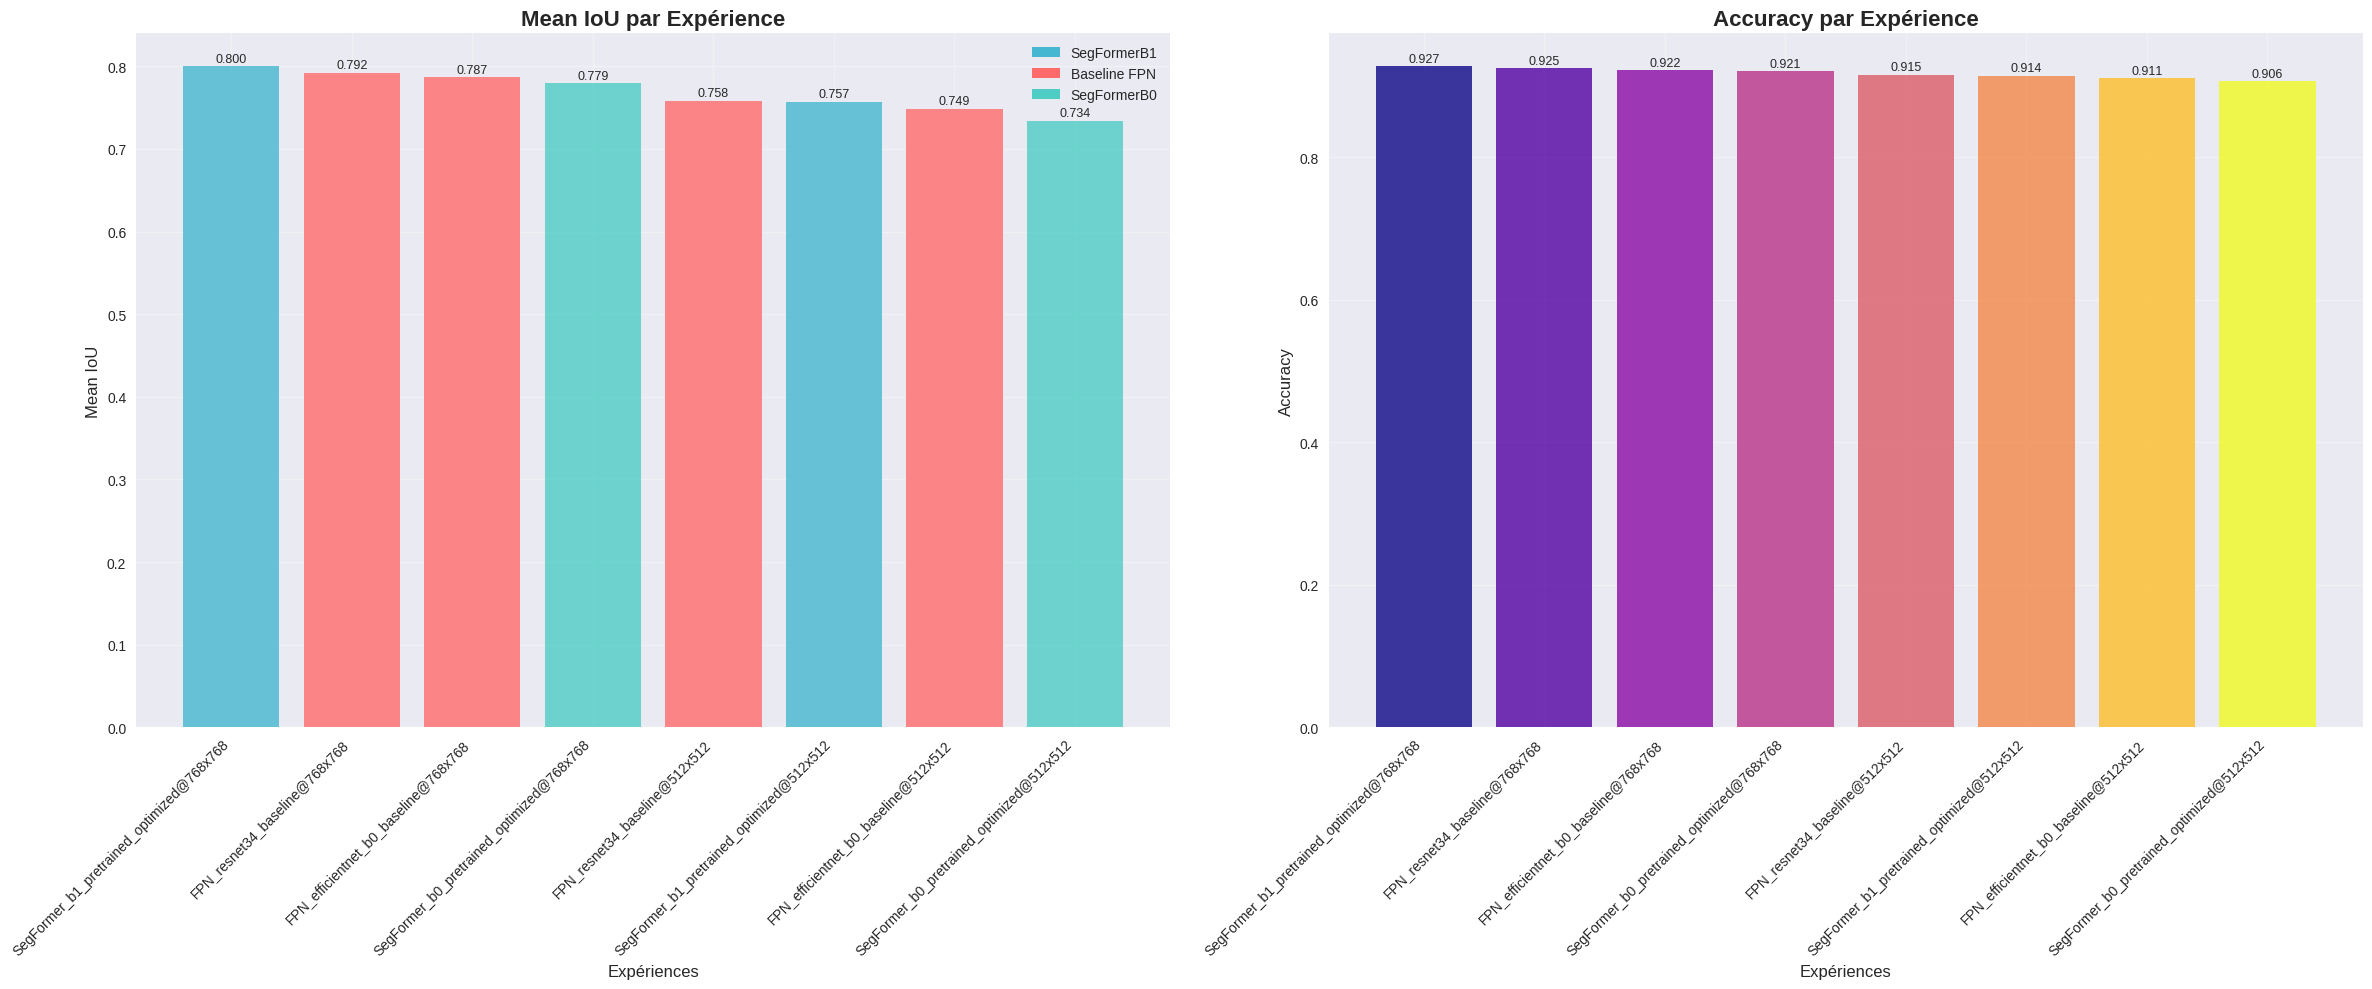

📊 Diagrammes générés pour 8 expériences (IoU) et 8 expériences (Accuracy)

✅ Analyse terminée. Utilisez show_detailed_results=True pour obtenir les données détaillées.


In [40]:
compare_experiments_mlflow(experiment_name=mlflow_experiment)

### Analyse meilleur modèle

In [51]:
top_n_models = 2

Affichage des courbes d'apprentissage

In [83]:
def display_training_curves_from_top_runs(experiment_name="OC Projet 9", metric="test_mean_iou", top_n=1):
    """
    Trouve les n meilleurs modèles selon la métrique choisie et affiche leurs graphiques de courbes d'entraînement.
    Si top_n >= 2, affiche aussi une comparaison des IoU par classe entre les 2 premiers.

    Args:
        experiment_name (str): Nom de l'expérience MLflow
        metric (str): Métrique pour classer les runs (ex: "test_mean_iou", "best_val_mean_iou", "test_accuracy")
        top_n (int): Nombre de meilleurs runs à afficher
    """
    print(f"\n{'='*60}")
    print(f"📈 Affichage des courbes d'entraînement des {top_n} meilleurs modèles")
    print(f"🔬 Expérience MLflow: {experiment_name}")
    print(f"📊 Métrique de classement: {metric}")
    print(f"{'='*60}")

    client = mlflow.tracking.MlflowClient()

    try:
        # Récupérer l'expérience par nom
        experiment = client.get_experiment_by_name(experiment_name)
        if experiment is None:
            print(f"❌ Expérience '{experiment_name}' non trouvée.")
            return

        # Construire le filtre pour la métrique choisie
        filter_string = f"status = 'FINISHED' and metrics.{metric} >= 0"
        order_by = f"metrics.{metric} DESC"

        # Rechercher les runs terminés avec la métrique choisie
        runs_df = mlflow.search_runs(
            experiment_ids=[experiment.experiment_id],
            filter_string=filter_string,
            order_by=[order_by],
            max_results=top_n
        )

        if runs_df.empty:
            print(f"❌ Aucun run terminé avec la métrique {metric} trouvé.")
            return

        if len(runs_df) < top_n:
            print(f"⚠️ Seulement {len(runs_df)} runs trouvés sur les {top_n} demandés.")

        print(f"🏆 Top {len(runs_df)} runs trouvés:\n")

        # Traiter chaque run dans l'ordre de performance
        for idx, (_, run) in enumerate(runs_df.iterrows(), 1):
            run_id = run['run_id']
            run_name = run.get('tags.mlflow.runName', 'Unknown')
            metric_value = run[f'metrics.{metric}']

            print(f"#{idx} - Run Name: {run_name}")
            print(f"     Run ID: {run_id}")
            print(f"     {metric}: {metric_value:.4f}\n")

            # Télécharger et afficher l'artefact 'training_curves.png'
            artifact_path = "training_curves.png"

            try:
                print(f"💾 Téléchargement de l'artefact '{artifact_path}' pour le run #{idx}...")

                with tempfile.TemporaryDirectory() as tmpdir:
                    local_path = mlflow.artifacts.download_artifacts(
                        run_id=run_id,
                        artifact_path=artifact_path,
                        dst_path=tmpdir
                    )
                    print(f"✅ Artefact téléchargé vers: {local_path}")

                    # Afficher l'image
                    print(f"🖼️ Affichage des courbes pour le run #{idx}...")
                    img = PILImage.open(local_path)

                    # Créer une figure avec un titre informatif
                    plt.figure(figsize=(12, 8))
                    plt.imshow(img)

                    # Nettoyer le nom du run pour l'affichage
                    clean_name = run_name
                    import re
                    clean_name = re.sub(r'_prod_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', clean_name)
                    clean_name = re.sub(r'_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', clean_name)

                    plt.title(f"#{idx} - {clean_name} ({metric}: {metric_value:.4f})", fontsize=14, fontweight='bold')
                    plt.axis('off')
                    plt.tight_layout()
                    plt.show()

                    print(f"{'='*60}")

            except Exception as e:
                print(f"❌ Erreur lors du téléchargement/affichage pour le run #{idx}: {e}")
                print("Vérifiez que l'artefact 'training_curves.png' existe pour ce run.")
                print(f"{'='*60}")

    except Exception as e:
        print(f"❌ Erreur générale lors de l'affichage des courbes d'entraînement: {e}")


📈 Affichage des courbes d'entraînement des 2 meilleurs modèles
🔬 Expérience MLflow: OC Projet 9
📊 Métrique de classement: test_mean_iou
🏆 Top 2 runs trouvés:

#1 - Run Name: SegFormer_b1_pretrained_optimized_prod_2025-08-30_07-25-25
     Run ID: c9835f7094354f48baff73f5d71edfc9
     test_mean_iou: 0.7998

💾 Téléchargement de l'artefact 'training_curves.png' pour le run #1...


✅ Artefact téléchargé vers: /tmp/tmpt9m0fl81/training_curves.png
🖼️ Affichage des courbes pour le run #1...


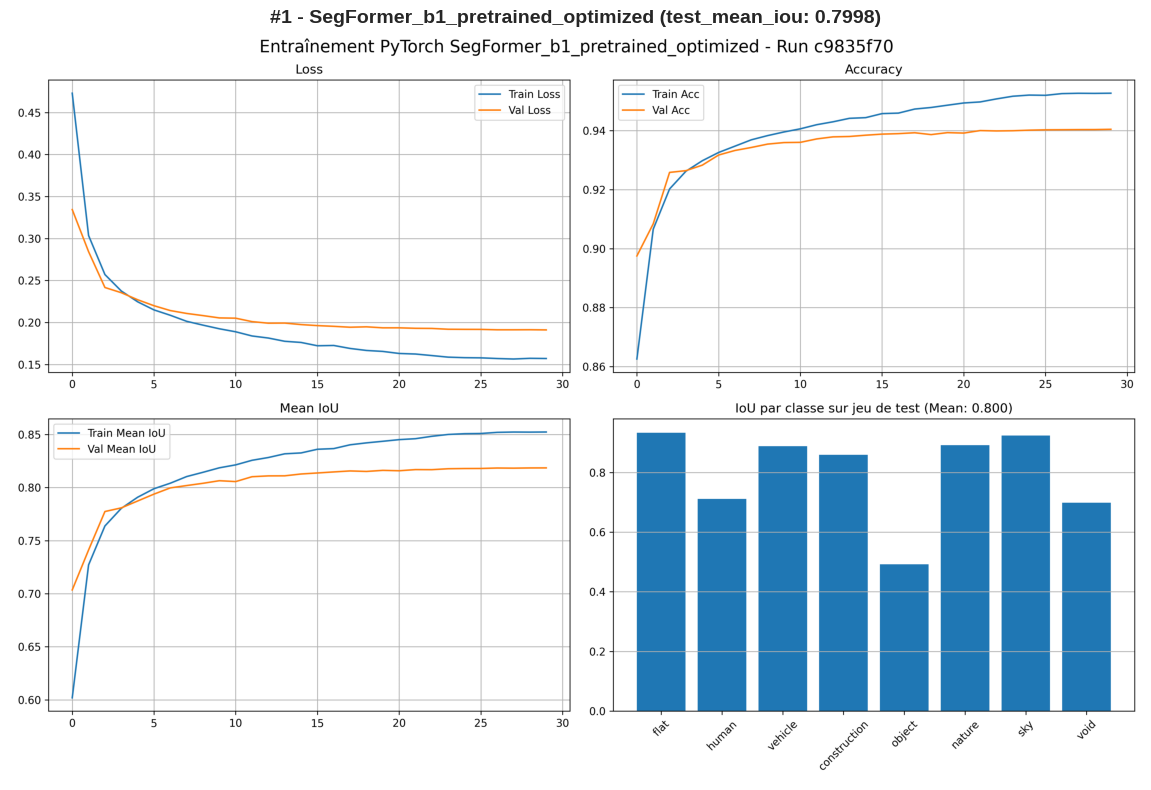

#2 - Run Name: FPN_resnet34_baseline_prod_2025-08-30_14-41-34
     Run ID: 4992e14daff845aabea9f44a56f499f6
     test_mean_iou: 0.7922

💾 Téléchargement de l'artefact 'training_curves.png' pour le run #2...


✅ Artefact téléchargé vers: /tmp/tmp57jx3jp5/training_curves.png
🖼️ Affichage des courbes pour le run #2...


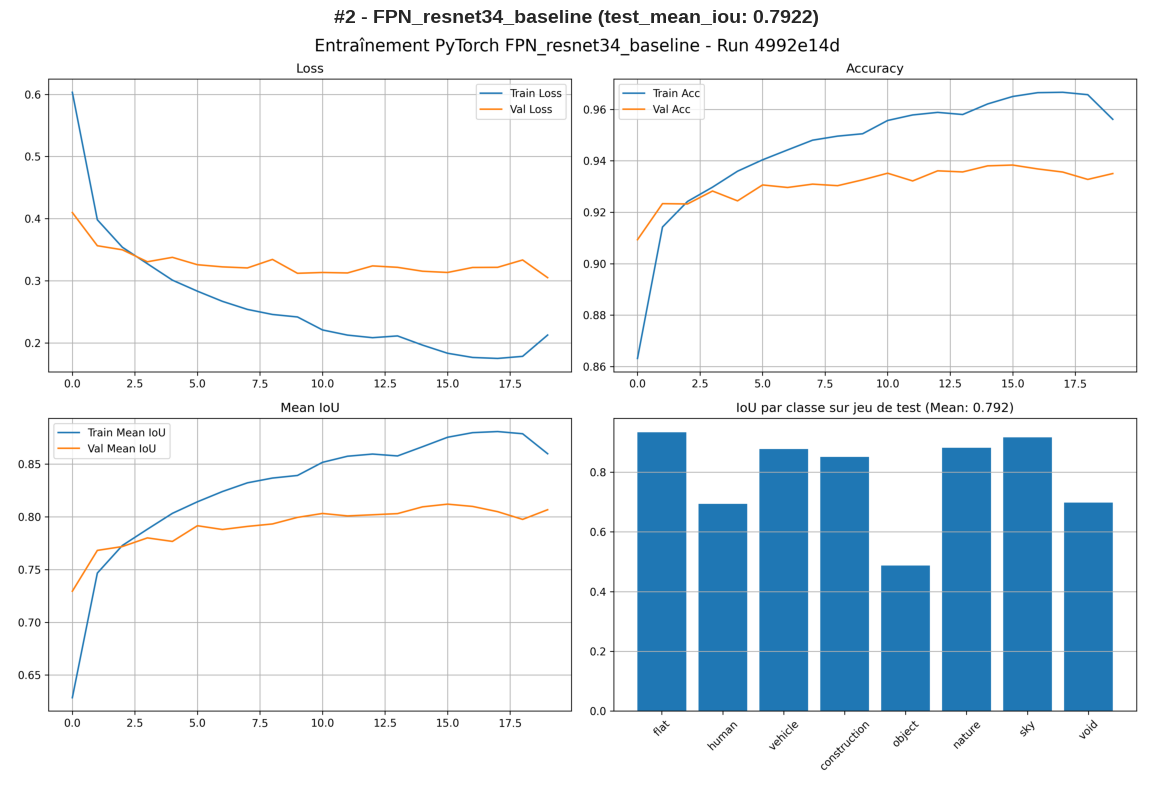

In [84]:
display_training_curves_from_top_runs("OC Projet 9", metric="test_mean_iou", top_n=top_n_models)

Affichage de la matrice de confusion en pourcentages

In [75]:
def display_top_confusion_matrices(experiment_name="OC Projet 9", metric="test_mean_iou", top_n=1):
    """
    Trouve les n meilleurs modèles selon la métrique choisie et affiche leurs matrices de confusion.
    Si top_n >= 2, affiche aussi une comparaison des matrices de confusion entre les 2 premiers.
    Args:
        experiment_name (str): Nom de l'expérience MLflow
        metric (str): Métrique pour classer les runs (ex: "test_mean_iou", "best_val_mean_iou", "test_accuracy")
        top_n (int): Nombre de meilleurs runs à afficher
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import json
    import tempfile
    import re

    print(f"\n{'='*60}")
    print(f"📊 Affichage des matrices de confusion des {top_n} meilleurs modèles")
    print(f"🔬 Expérience MLflow: {experiment_name}")
    print(f"📈 Métrique de classement: {metric}")
    print(f"{'='*60}")

    client = mlflow.tracking.MlflowClient()

    try:
        # Récupérer l'expérience par nom
        experiment = client.get_experiment_by_name(experiment_name)
        if experiment is None:
            print(f"❌ Expérience '{experiment_name}' non trouvée.")
            return

        # Construire le filtre pour la métrique choisie
        filter_string = f"status = 'FINISHED' and metrics.{metric} >= 0"
        order_by = f"metrics.{metric} DESC"

        # Rechercher les runs terminés avec la métrique choisie
        runs_df = mlflow.search_runs(
            experiment_ids=[experiment.experiment_id],
            filter_string=filter_string,
            order_by=[order_by],
            max_results=top_n
        )

        if runs_df.empty:
            print(f"❌ Aucun run terminé avec la métrique {metric} trouvé.")
            return

        if len(runs_df) < top_n:
            print(f"⚠️ Seulement {len(runs_df)} runs trouvés sur les {top_n} demandés.")

        print(f"🏆 Top {len(runs_df)} runs trouvés:\n")
        results = []

        # Traiter chaque run dans l'ordre de performance
        for idx, (_, run) in enumerate(runs_df.iterrows(), 1):
            run_id = run['run_id']
            run_name = run.get('tags.mlflow.runName', 'Unknown')
            metric_value = run[f'metrics.{metric}']

            # Nettoyer le nom du run
            clean_name = re.sub(r'_prod_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', run_name)
            clean_name = re.sub(r'_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', clean_name)

            print(f"#{idx} - {clean_name}")
            print(f"     Run ID: {run_id}")
            print(f"     {metric}: {metric_value:.4f}\n")

            # Télécharger et afficher la matrice de confusion
            try:
                with tempfile.TemporaryDirectory() as temp_dir:
                    confusion_matrix_path = mlflow.artifacts.download_artifacts(
                        run_id=run_id,
                        artifact_path="confusion_matrix.json",
                        dst_path=temp_dir
                    )

                    with open(confusion_matrix_path, 'r') as f:
                        confusion_data = json.load(f)

                    matrix = np.array(confusion_data['matrix'])
                    class_names = confusion_data['class_names']
                    accuracy = confusion_data.get('accuracy', 'N/A')
                    total_samples = confusion_data.get('total_samples', 'N/A')

                    # Créer la visualisation
                    plt.figure(figsize=(12, 10))

                    # Normaliser la matrice pour l'affichage (en pourcentages par ligne = Recall)
                    matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis] * 100

                    # Créer le heatmap
                    sns.heatmap(matrix_normalized,
                               annot=True,
                               fmt='.1f',
                               cmap='Blues',
                               xticklabels=class_names,
                               yticklabels=class_names,
                               cbar_kws={'label': 'Recall par classe (%)'})

                    plt.title(f'#{idx} - Matrice de Confusion (Recall par classe) - {clean_name}\n'
                             f'{metric}: {metric_value:.4f} | Accuracy: {accuracy:.4f}' if accuracy != 'N/A' else f'{metric}: {metric_value:.4f}',
                             fontsize=14, fontweight='bold', pad=20)

                    plt.xlabel('Classes Prédites', fontsize=12)
                    plt.ylabel('Classes Réelles', fontsize=12)
                    plt.xticks(rotation=45, ha='right')
                    plt.yticks(rotation=0)

                    # Note explicative
                    plt.figtext(0.02, 0.02,
                               'Note: Lecture par ligne - "% d\'échantillons réels correctement détectés par classe"',
                               fontsize=9, ha='left', style='italic')

                    plt.tight_layout()
                    plt.show()

                    # Stocker les résultats
                    results.append({
                        'rank': idx,
                        'run_id': run_id,
                        'run_name': run_name,
                        'clean_name': clean_name,
                        'metric_value': metric_value,
                        'confusion_matrix': matrix,
                        'confusion_matrix_normalized': matrix_normalized,
                        'class_names': class_names,
                        'accuracy': accuracy,
                        'total_samples': total_samples
                    })

                    print(f"✅ Matrice de confusion #{idx} affichée")
                    print(f"{'='*60}")

            except Exception as e:
                print(f"❌ Erreur lors du téléchargement/affichage pour le run #{idx}: {e}")
                print("Vérifiez que l'artefact 'confusion_matrix.json' existe pour ce run.")
                print(f"{'='*60}")

        # Si on a au moins 2 runs, afficher la comparaison des bonnes classifications par classe
        if len(results) >= 2:
            print(f"\n📊 Comparaison du recall par classe entre les 2 meilleurs modèles")
            result1 = results[0]
            result2 = results[1]

            try:
                # Vérifier que les deux matrices ont les mêmes dimensions
                matrix1_norm = result1['confusion_matrix_normalized']
                matrix2_norm = result2['confusion_matrix_normalized']

                if matrix1_norm.shape != matrix2_norm.shape:
                    print(f"⚠️ Les matrices ont des tailles différentes ({matrix1_norm.shape} vs {matrix2_norm.shape})")
                    print(f"   Impossible de générer la comparaison.")
                else:
                    # Extraire les valeurs de la diagonale (recall par classe)
                    diagonal1 = np.diag(matrix1_norm)  # % recall pour le modèle 1
                    diagonal2 = np.diag(matrix2_norm)  # % recall pour le modèle 2

                    # Calculer les deltas en points de pourcentage
                    deltas = diagonal1 - diagonal2  # Modèle 1 - Modèle 2
                    class_names = result1['class_names']

                    # Créer le diagramme en barres
                    plt.figure(figsize=(12, 8))

                    # Couleurs selon le signe du delta
                    colors = ['#2ECC71' if delta >= 0 else '#E74C3C' for delta in deltas]
                    bars = plt.bar(class_names, deltas, color=colors, alpha=0.8)

                    # Configuration du graphique
                    plt.title(f'Δ Recall par Classe\n{result1["clean_name"]} - {result2["clean_name"]}',
                             fontsize=14, fontweight='bold')
                    plt.xlabel('Classes', fontsize=12)
                    plt.ylabel('Différence Recall (% points)', fontsize=12)
                    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
                    plt.grid(True, alpha=0.3)
                    plt.xticks(rotation=45, ha='right')

                    # Ajouter les valeurs sur les barres
                    for bar, delta in zip(bars, deltas):
                        height = bar.get_height()
                        # Placer l'étiquette juste au-dessus de la barre
                        if height >= 0:
                            y_pos = height + 0.05  # Proche du sommet pour les barres positives
                        else:
                            y_pos = 0.05  # Juste au-dessus de zéro pour les barres négatives
                        plt.text(bar.get_x() + bar.get_width()/2., y_pos,
                                f'{delta:+.1f}%', ha='center', va='bottom', fontsize=9)

                    # Légende
                    from matplotlib.patches import Patch
                    legend_elements = [
                        Patch(facecolor='#2ECC71', label=f'{result1["clean_name"]} meilleur'),
                        Patch(facecolor='#E74C3C', label=f'{result2["clean_name"]} meilleur')
                    ]
                    plt.legend(handles=legend_elements, loc='upper right')

                    # Statistiques
                    mean_delta = np.mean(deltas)
                    positive_deltas = np.sum(deltas > 0)
                    plt.figtext(0.02, 0.02,
                               f'Δ moyen: {mean_delta:+.1f}% | Classes où {result1["clean_name"]} domine: {positive_deltas}/{len(deltas)}',
                               fontsize=10, ha='left')

                    plt.tight_layout()
                    plt.show()

                    print(f"✅ Comparaison générée entre {result1['clean_name']} et {result2['clean_name']}")
                    print(f"   📈 Δ moyen du recall: {mean_delta:+.1f}% points")
                    print(f"   🏆 {result1['clean_name']} meilleur sur {positive_deltas}/{len(deltas)} classes")

            except Exception as e:
                print(f"❌ Erreur lors de la génération de la comparaison: {e}")

        print(f"\n✅ Analyse terminée. {len(results)} matrices de confusion affichées sur {len(runs_df)} runs.")
        return results

    except Exception as e:
        print(f"❌ Erreur générale lors de l'affichage des matrices de confusion: {e}")
        return None


📊 Affichage des matrices de confusion des 2 meilleurs modèles
🔬 Expérience MLflow: OC Projet 9
📈 Métrique de classement: test_mean_iou
🏆 Top 2 runs trouvés:

#1 - SegFormer_b1_pretrained_optimized
     Run ID: c9835f7094354f48baff73f5d71edfc9
     test_mean_iou: 0.7998



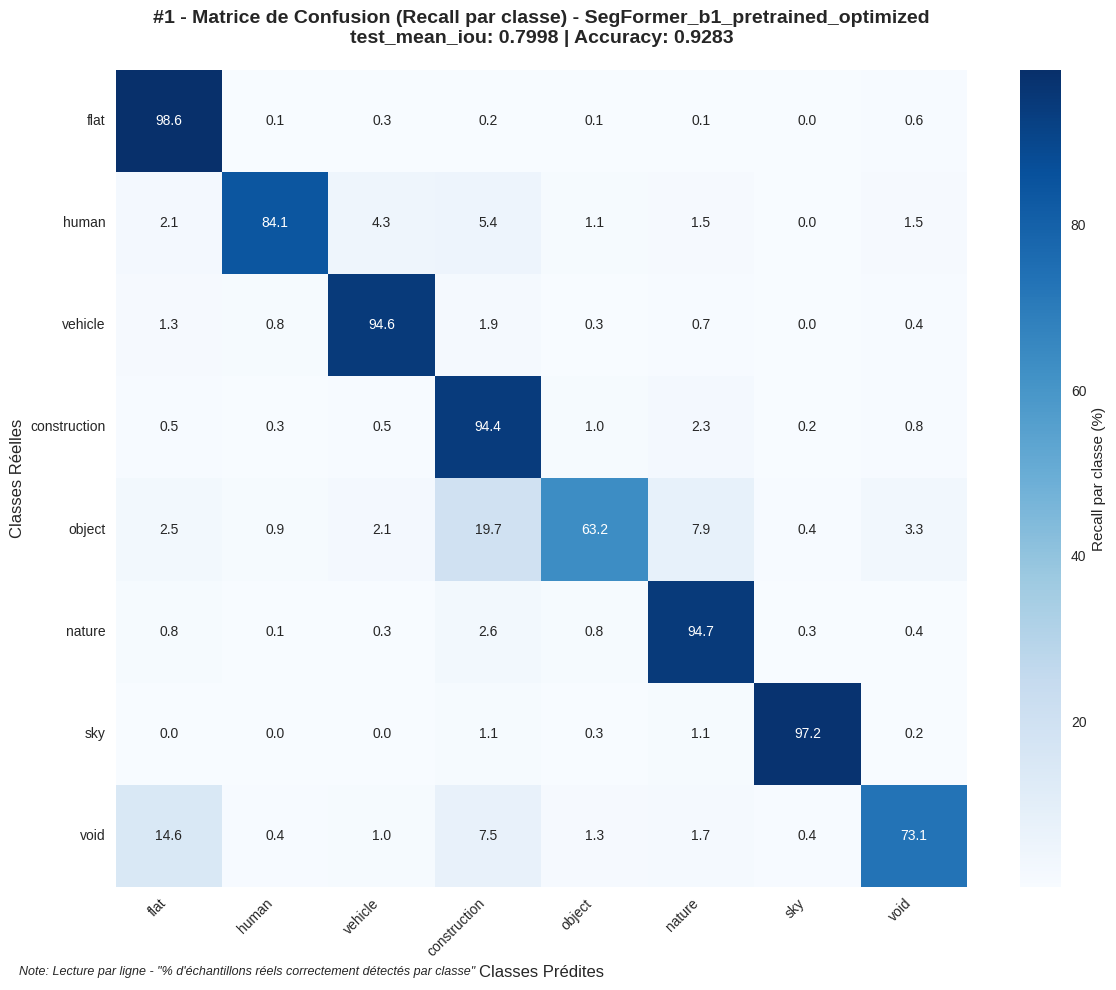

✅ Matrice de confusion #1 affichée
#2 - FPN_resnet34_baseline
     Run ID: 4992e14daff845aabea9f44a56f499f6
     test_mean_iou: 0.7922



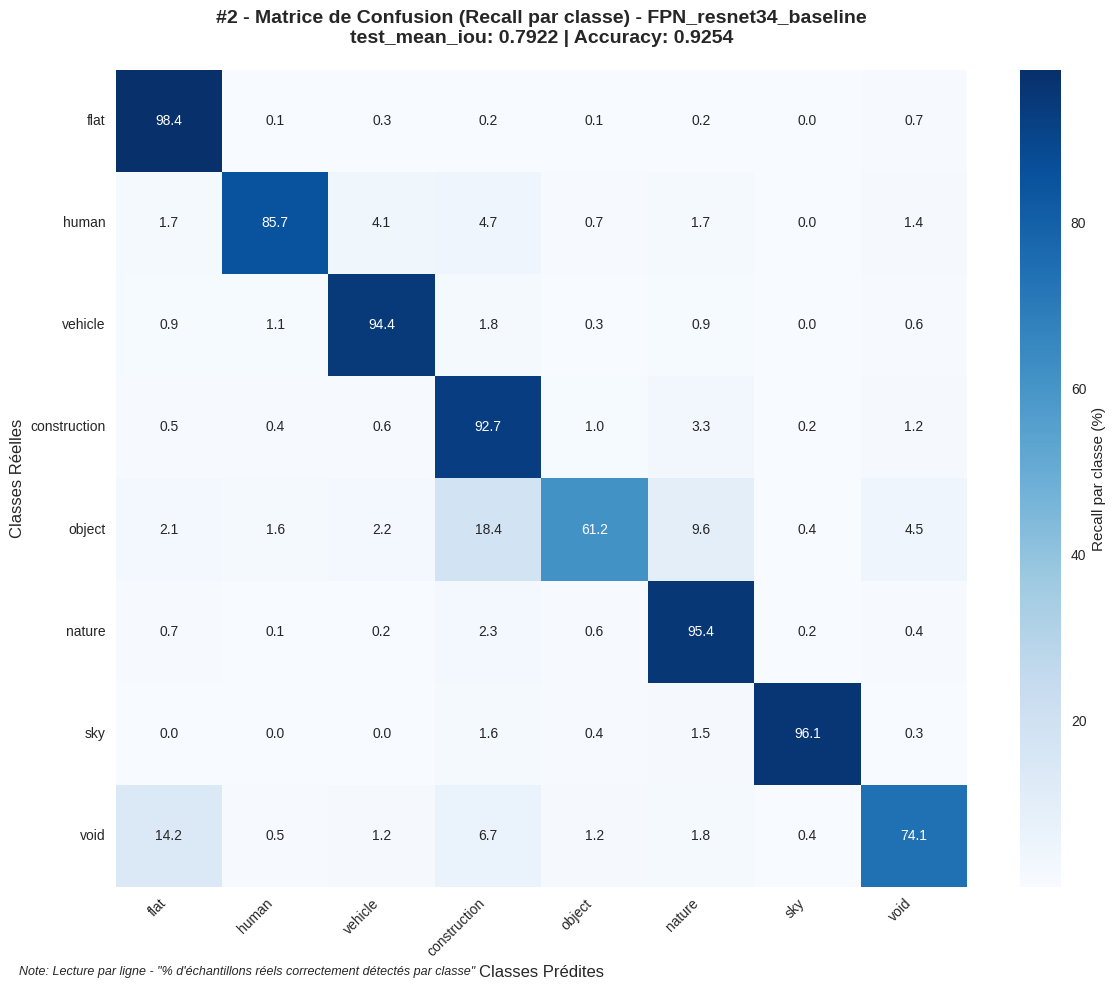

✅ Matrice de confusion #2 affichée

📊 Comparaison du recall par classe entre les 2 meilleurs modèles


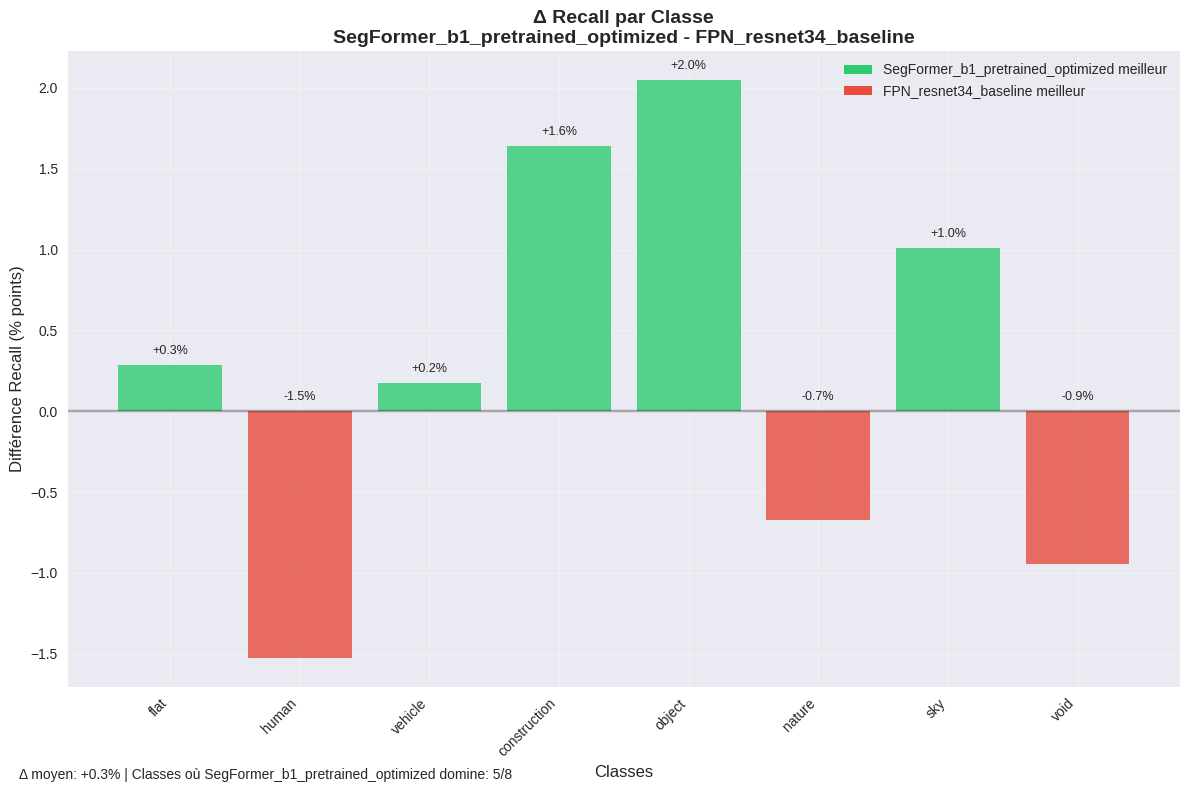

✅ Comparaison générée entre SegFormer_b1_pretrained_optimized et FPN_resnet34_baseline
   📈 Δ moyen du recall: +0.3% points
   🏆 SegFormer_b1_pretrained_optimized meilleur sur 5/8 classes

✅ Analyse terminée. 2 matrices de confusion affichées sur 2 runs.


In [76]:
confusion_result = display_top_confusion_matrices("OC Projet 9", metric="test_mean_iou", top_n=2)

Affichage de la répartition des modalités dans l'ensemble du dataset d'apprentissage (on passe par le json de matrice de confusion pour gagner du temps)

In [88]:
def analyze_class_distribution_from_confusion_matrix(experiment_name="OC Projet 9",
                                                   figsize=(14, 8),
                                                   color_palette='viridis',
                                                   show_values=True):
    """
    Analyse la répartition des classes dans le dataset à partir de n'importe quelle matrice de confusion.
    La distribution des classes réelles est constante peu importe le modèle.

    Args:
        experiment_name (str): Nom de l'expérience MLflow
        figsize (tuple): Taille de la figure (largeur, hauteur)
        color_palette (str): Palette de couleurs pour les barres
        show_values (bool): Afficher les valeurs sur les barres

    Returns:
        dict: Dictionnaire contenant les statistiques de distribution
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import json
    import tempfile
    import seaborn as sns

    print(f"📊 Analyse de la distribution des classes dans le dataset")
    print(f"🔬 Expérience MLflow: {experiment_name}")
    print("=" * 60)

    client = mlflow.tracking.MlflowClient()

    try:
        # Récupérer l'expérience par nom
        experiment = client.get_experiment_by_name(experiment_name)
        if experiment is None:
            print(f"❌ Expérience '{experiment_name}' non trouvée.")
            return None

        # Rechercher le premier run terminé disponible (n'importe lequel suffit)
        runs_df = mlflow.search_runs(
            experiment_ids=[experiment.experiment_id],
            filter_string="status = 'FINISHED'",
            max_results=1
        )

        if runs_df.empty:
            print(f"❌ Aucun run terminé trouvé.")
            return None

        run_id = runs_df.iloc[0]['run_id']
        run_name = runs_df.iloc[0].get('tags.mlflow.runName', 'Unknown')

        print(f"📋 Utilisation du run: {run_name}")
        print(f"🆔 Run ID: {run_id}")
        print()

        # Télécharger et analyser la matrice de confusion
        with tempfile.TemporaryDirectory() as temp_dir:
            confusion_matrix_path = mlflow.artifacts.download_artifacts(
                run_id=run_id,
                artifact_path="confusion_matrix.json",
                dst_path=temp_dir
            )

            with open(confusion_matrix_path, 'r') as f:
                confusion_data = json.load(f)

            matrix = np.array(confusion_data['matrix'])
            class_names = confusion_data['class_names']

            # Calculer la distribution des classes (somme par ligne = nombre total de pixels réels par classe)
            class_counts = np.sum(matrix, axis=1)
            total_pixels = np.sum(class_counts)
            class_percentages = (class_counts / total_pixels) * 100

            # Statistiques détaillées
            print("📈 RÉPARTITION DES CLASSES DANS LE DATASET:")
            print("=" * 65)
            print(f"{'Classe':<15} {'Nb Pixels':<12} {'Pourcentage':<12} {'Barre':<20}")
            print("-" * 65)

            for i, class_name in enumerate(class_names):
                bar_length = int(class_percentages[i] / 2)  # Barre visuelle
                bar = "█" * bar_length
                print(f"{class_name:<15} {class_counts[i]:<12,} {class_percentages[i]:<11.2f}% {bar}")

            print("-" * 65)
            print(f"{'TOTAL':<15} {total_pixels:<12,} {'100.00%':<12}")
            print()

            # Créer le graphique
            fig, ax1 = plt.subplots(figsize=figsize)

            # Utiliser une palette de couleurs
            colors = plt.cm.get_cmap(color_palette)(np.linspace(0, 1, len(class_names)))

            # Barres avec les pourcentages (axe gauche)
            bars = ax1.bar(range(len(class_names)), class_percentages,
                          color=colors, alpha=0.8, edgecolor='black', linewidth=1)

            # Configuration axe gauche (pourcentages)
            ax1.set_xlabel('Classes', fontsize=12, fontweight='bold')
            ax1.set_ylabel('Pourcentage (%)', fontsize=12, fontweight='bold', color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')
            ax1.set_xticks(range(len(class_names)))
            ax1.set_xticklabels(class_names, rotation=45, ha='right')
            ax1.grid(True, alpha=0.3, axis='y')

            # Créer un second axe y pour les nombres absolus
            ax2 = ax1.twinx()
            ax2.set_ylabel('Nombre de Pixels', fontsize=12, fontweight='bold', color='red')
            ax2.tick_params(axis='y', labelcolor='red')

            # Synchroniser les échelles
            ax2.set_ylim(0, np.max(class_counts) * 1.1)
            ax1.set_ylim(0, np.max(class_percentages) * 1.1)

            # Ajouter les valeurs sur les barres si demandé
            if show_values:
                for i, (bar, count, pct) in enumerate(zip(bars, class_counts, class_percentages)):
                    height = bar.get_height()
                    # Pourcentage au-dessus de la barre
                    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                            f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)
                    # Nombre absolu à l'intérieur de la barre
                    ax1.text(bar.get_x() + bar.get_width()/2., height/2,
                            f'{count:,}', ha='center', va='center',
                            color='white', fontweight='bold', fontsize=9)

            # Titre et mise en forme
            plt.title(f'Répartition des Classes dans le Dataset Cityscapes\n'
                     f'Total: {total_pixels:,} pixels',
                     fontsize=14, fontweight='bold', pad=20)

            plt.tight_layout()
            plt.show()

            # Statistiques supplémentaires
            print("📊 STATISTIQUES COMPLÉMENTAIRES:")
            print("-" * 40)
            print(f"   🔢 Nombre total de pixels: {total_pixels:,}")
            print(f"   📏 Nombre de classes: {len(class_names)}")
            print(f"   📈 Classe la plus représentée: {class_names[np.argmax(class_counts)]} ({np.max(class_percentages):.2f}%)")
            print(f"   📉 Classe la moins représentée: {class_names[np.argmin(class_counts)]} ({np.min(class_percentages):.2f}%)")
            print(f"   ⚖️  Ratio max/min: {np.max(class_counts)/np.min(class_counts):.2f}")

            # Calcul de l'équilibrage des classes
            ideal_percentage = 100 / len(class_names)
            imbalance_scores = np.abs(class_percentages - ideal_percentage)
            avg_imbalance = np.mean(imbalance_scores)
            print(f"   ⚖️  Score de déséquilibre moyen: {avg_imbalance:.2f}% (0 = parfait équilibre)")
            print()

            return {
                'class_names': class_names,
                'class_counts': class_counts,
                'class_percentages': class_percentages,
                'total_pixels': total_pixels,
                'most_common_class': class_names[np.argmax(class_counts)],
                'least_common_class': class_names[np.argmin(class_counts)],
                'imbalance_ratio': np.max(class_counts)/np.min(class_counts),
                'avg_imbalance_score': avg_imbalance
            }

    except Exception as e:
        print(f"❌ Erreur lors de l'analyse de distribution: {e}")
        return None


def compare_class_performance(experiment_name="OC Projet 9", metric="test_mean_iou", top_n=2):
    """
    Compare les performances par classe entre les N meilleurs modèles.
    Affiche les IoU par classe et leurs différences sous forme de diagramme en barres.

    Args:
        experiment_name (str): Nom de l'expérience MLflow
        metric (str): Métrique pour classer les runs
        top_n (int): Nombre de meilleurs modèles à comparer (minimum 2)
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import json
    import tempfile
    import re

    print(f"\n{'='*60}")
    print(f"📊 Comparaison des performances par classe des {top_n} meilleurs modèles")
    print(f"🔬 Expérience MLflow: {experiment_name}")
    print(f"📈 Métrique de classement: {metric}")
    print(f"{'='*60}")

    client = mlflow.tracking.MlflowClient()

    try:
        # Récupérer l'expérience par nom
        experiment = client.get_experiment_by_name(experiment_name)
        if experiment is None:
            print(f"❌ Expérience '{experiment_name}' non trouvée.")
            return

        # Rechercher les runs terminés avec la métrique choisie
        filter_string = f"status = 'FINISHED' and metrics.{metric} >= 0"
        order_by = f"metrics.{metric} DESC"

        runs_df = mlflow.search_runs(
            experiment_ids=[experiment.experiment_id],
            filter_string=filter_string,
            order_by=[order_by],
            max_results=top_n
        )

        if len(runs_df) < 2:
            print(f"❌ Pas assez de runs (besoin d'au moins 2, trouvé {len(runs_df)}).")
            return

        if len(runs_df) < top_n:
            print(f"⚠️ Seulement {len(runs_df)} runs trouvés sur les {top_n} demandés.")

        print(f"🏆 Top {len(runs_df)} runs trouvés:\n")

        # Collecter les métriques détaillées pour chaque run
        models_data = []

        for idx, (_, run) in enumerate(runs_df.iterrows(), 1):
            run_id = run['run_id']
            run_name = run.get('tags.mlflow.runName', 'Unknown')
            metric_value = run[f'metrics.{metric}']

            # Nettoyer le nom du run
            clean_name = re.sub(r'_prod_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', run_name)
            clean_name = re.sub(r'_\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}$', '', clean_name)

            print(f"#{idx} - {clean_name}")
            print(f"     Run ID: {run_id}")
            print(f"     {metric}: {metric_value:.4f}")

            try:
                with tempfile.TemporaryDirectory() as temp_dir:
                    # Télécharger les métriques détaillées
                    detailed_metrics_path = mlflow.artifacts.download_artifacts(
                        run_id=run_id,
                        artifact_path="detailed_metrics.json",
                        dst_path=temp_dir
                    )

                    with open(detailed_metrics_path, 'r') as f:
                        detailed_metrics = json.load(f)

                    class_stats = detailed_metrics['class_stats']

                    models_data.append({
                        'rank': idx,
                        'run_id': run_id,
                        'clean_name': clean_name,
                        'metric_value': metric_value,
                        'class_stats': class_stats
                    })

                    print(f"     ✅ Métriques détaillées récupérées")

            except Exception as e:
                print(f"     ❌ Erreur: {e}")

            print()

        if len(models_data) < 2:
            print(f"❌ Pas assez de données détaillées récupérées.")
            return

        # Créer la comparaison visuelle
        class_names = [stat['class_name'] for stat in models_data[0]['class_stats']]

        # Graphique 1: IoU par classe pour chaque modèle
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

        # Barres groupées pour les IoU
        x_pos = np.arange(len(class_names))
        bar_width = 0.35
        colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12'][:len(models_data)]

        for i, model in enumerate(models_data):
            iou_values = [stat['iou'] for stat in model['class_stats']]
            bars = ax1.bar(x_pos + i * bar_width, iou_values, bar_width,
                          label=f"#{model['rank']} {model['clean_name']}",
                          color=colors[i], alpha=0.8)

        ax1.set_xlabel('Classes', fontsize=12)
        ax1.set_ylabel('IoU', fontsize=12)
        ax1.set_title('IoU par Classe', fontsize=14, fontweight='bold')
        ax1.set_xticks(x_pos + bar_width * (len(models_data) - 1) / 2)
        ax1.set_xticklabels(class_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Graphique 2: Delta entre les 2 premiers modèles
        if len(models_data) >= 2:
            model1 = models_data[0]
            model2 = models_data[1]

            iou1_values = [stat['iou'] for stat in model1['class_stats']]
            iou2_values = [stat['iou'] for stat in model2['class_stats']]
            deltas = [(iou1 - iou2) * 100 for iou1, iou2 in zip(iou1_values, iou2_values)]

            # Couleurs selon le signe du delta
            colors_delta = ['#2ECC71' if delta >= 0 else '#E74C3C' for delta in deltas]

            bars = ax2.bar(class_names, deltas, color=colors_delta, alpha=0.8)

            ax2.set_xlabel('Classes', fontsize=12)
            ax2.set_ylabel('Différence IoU (% points)', fontsize=12)
            ax2.set_title(f'Δ IoU par Classe\n{model1["clean_name"]} - {model2["clean_name"]}',
                         fontsize=14, fontweight='bold')
            ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            ax2.grid(True, alpha=0.3)
            ax2.tick_params(axis='x', rotation=45)

            # Ajouter les valeurs sur les barres
            for bar, delta in zip(bars, deltas):
                height = bar.get_height()
                if height >= 0:
                    y_pos = height + 0.02
                else:
                    y_pos = 0.02
                ax2.text(bar.get_x() + bar.get_width()/2., y_pos,
                        f'{delta:+.1f}%', ha='center', va='bottom', fontsize=9)

            # Légende
            from matplotlib.patches import Patch
            legend_elements = [
                Patch(facecolor='#2ECC71', label=f'{model1["clean_name"]} meilleur'),
                Patch(facecolor='#E74C3C', label=f'{model2["clean_name"]} meilleur')
            ]
            ax2.legend(handles=legend_elements, loc='upper right')

        # Statistiques de comparaison
        if len(models_data) >= 2:
            mean_delta = np.mean(deltas)
            positive_deltas = sum(1 for d in deltas if d > 0)

            ax2.text(
                0.02, -0.18,  # Position (en coordonnées ax2)
                f'Δ moyen: {mean_delta:+.1f}% points\n'
                f'Classes où {model1["clean_name"]} domine: {positive_deltas}/{len(deltas)}',
                transform=ax2.transAxes,
                fontsize=10, ha='left', va='top'
            )


            print(f"✅ Comparaison générée entre {model1['clean_name']} et {model2['clean_name']}")
            print(f"   📈 Δ IoU moyen: {mean_delta:+.1f}% points")
            print(f"   🏆 {model1['clean_name']} meilleur sur {positive_deltas}/{len(deltas)} classes")

        plt.tight_layout()
        plt.show()

        return models_data

    except Exception as e:
        print(f"❌ Erreur générale: {e}")
        return None

📊 Analyse de la distribution des classes dans le dataset
🔬 Expérience MLflow: OC Projet 9
📋 Utilisation du run: FPN_resnet34_baseline_prod_2025-08-30_14-41-34
🆔 Run ID: 4992e14daff845aabea9f44a56f499f6



📈 RÉPARTITION DES CLASSES DANS LE DATASET:
Classe          Nb Pixels    Pourcentage  Barre               
-----------------------------------------------------------------
flat            112,398,654  38.11      % ███████████████████
human           3,906,872    1.32       % 
vehicle         20,978,551   7.11       % ███
construction    60,670,326   20.57      % ██████████
object          6,063,420    2.06       % █
nature          46,853,097   15.89      % ███████
sky             8,658,891    2.94       % █
void            35,382,189   12.00      % █████
-----------------------------------------------------------------
TOTAL           294,912,000  100.00%     



/tmp/ipython-input-805409003.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap(color_palette)(np.linspace(0, 1, len(class_names)))


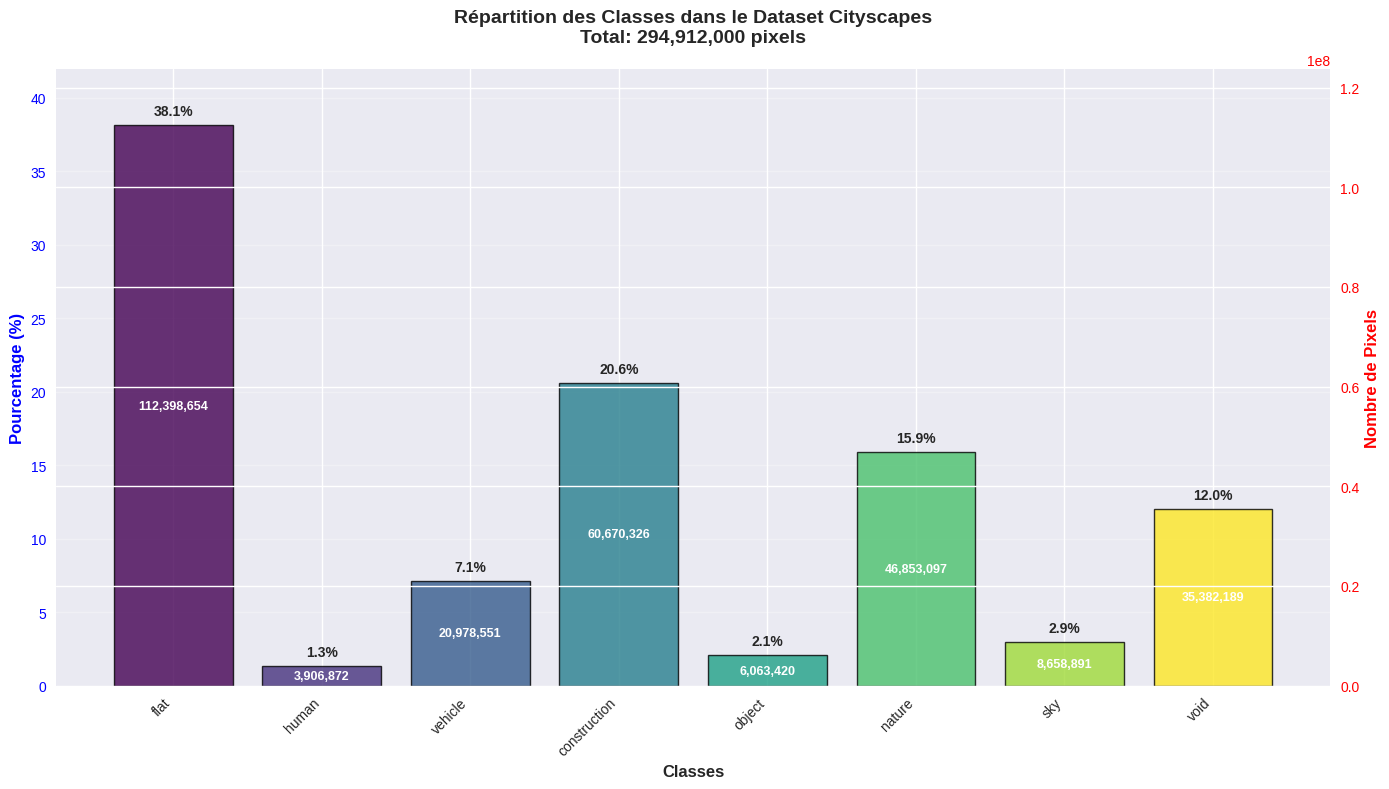

📊 STATISTIQUES COMPLÉMENTAIRES:
----------------------------------------
   🔢 Nombre total de pixels: 294,912,000
   📏 Nombre de classes: 8
   📈 Classe la plus représentée: flat (38.11%)
   📉 Classe la moins représentée: human (1.32%)
   ⚖️  Ratio max/min: 28.77
   ⚖️  Score de déséquilibre moyen: 9.27% (0 = parfait équilibre)


📊 Comparaison des performances par classe des 2 meilleurs modèles
🔬 Expérience MLflow: OC Projet 9
📈 Métrique de classement: test_mean_iou
🏆 Top 2 runs trouvés:

#1 - SegFormer_b1_pretrained_optimized
     Run ID: c9835f7094354f48baff73f5d71edfc9
     test_mean_iou: 0.7998


     ✅ Métriques détaillées récupérées

#2 - FPN_resnet34_baseline
     Run ID: 4992e14daff845aabea9f44a56f499f6
     test_mean_iou: 0.7922


     ✅ Métriques détaillées récupérées

✅ Comparaison générée entre SegFormer_b1_pretrained_optimized et FPN_resnet34_baseline
   📈 Δ IoU moyen: +0.8% points
   🏆 SegFormer_b1_pretrained_optimized meilleur sur 7/8 classes


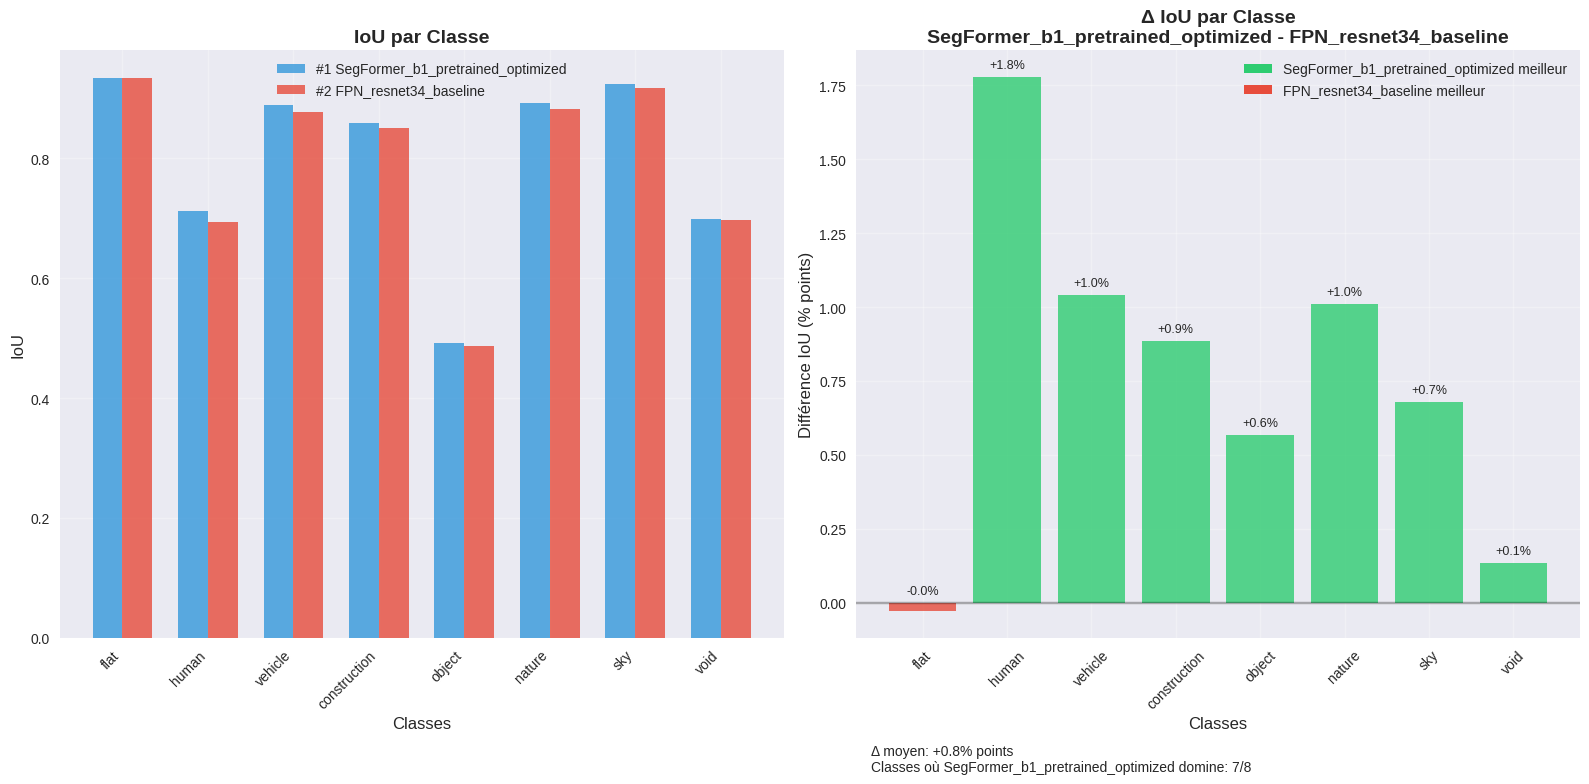

In [89]:
# Analyse simple du meilleur modèle
result = analyze_class_distribution_from_confusion_matrix("OC Projet 9")

# # Avec personnalisation
# result = analyze_class_distribution_from_confusion_matrix(
#     experiment_name="OC Projet 8",
#     figsize=(16, 10),
#     color_palette='plasma',
#     show_values=True
# )

# Comparaison entre plusieurs modèles
comparison = compare_class_performance("OC Projet 9", "test_mean_iou", top_n=2)

### Mise en production meilleur modèle

In [ ]:
def register_best_model(experiment_name="OC Projet 8", model_name="StreetsSegmentation",
                       force=False, specific_run_id=None):
    """
    Enregistre le meilleur modèle (selon test_mean_iou) OU un modèle spécifique dans le Registry MLflow.

    Args:
        experiment_name (str): Nom de l'expérience MLflow
        model_name (str): Nom du modèle dans le Registry
        force (bool): Si True, force la mise en production même si le score est moins bon
        specific_run_id (str): Si fourni, enregistre ce run spécifique au lieu du meilleur
    """
    print(f"\n{'='*60}")
    if specific_run_id:
        print(f"🎯 Enregistrement d'un modèle SPÉCIFIQUE dans le Registry MLflow")
        print(f"🆔 Run ID spécifique: {specific_run_id}")
    else:
        print(f"🏆 Enregistrement du MEILLEUR modèle dans le Registry MLflow")
    print(f"🔬 Expérience MLflow: {experiment_name}")
    print(f"📦 Nom du modèle Registry: {model_name}")
    if force:
        print(f"⚡ Mode FORCE activé - Mise en prod forcée")
    print(f"{'='*60}")

    # 1. Si un run_id spécifique est fourni, l'utiliser directement
    if specific_run_id:
        print(f"🎯 Mode spécifique activé - utilisation du run {specific_run_id}")

        try:
            # Vérifier que le run existe et récupérer ses métriques
            run = mlflow.get_run(specific_run_id)
            metrics = run.data.metrics
            params = run.data.params

            test_mean_iou = metrics.get('test_mean_iou', None)
            test_accuracy = metrics.get('test_sparse_categorical_accuracy', None)
            run_name = run.data.tags.get('mlflow.runName', 'Unknown')

            if test_mean_iou is None:
                print("⚠️ Le run spécifique n'a pas de métrique test_mean_iou")
                if not force:
                    print("❌ Utilisez force=True pour forcer l'enregistrement sans métriques")
                    return None

            selected_result = {
                'run_id': specific_run_id,
                'test_mean_iou': test_mean_iou or -1.0,
                'test_accuracy': test_accuracy,
                'experiment_name': run_name,
                'selection_mode': 'specific'
            }

            print(f"✅ Run spécifique trouvé:")
            print(f"   • Run Name: {run_name}")
            print(f"   • Run ID: {specific_run_id}")
            if test_mean_iou:
                print(f"   • Test Mean IoU: {test_mean_iou:.4f}")
            if test_accuracy:
                print(f"   • Test Accuracy: {test_accuracy:.4f}")

        except Exception as e:
            print(f"❌ Erreur lors de la récupération du run spécifique {specific_run_id}: {e}")
            return None

    else:
        # 2. Mode automatique : trouver le meilleur modèle (logique existante)
        print("🔍 Mode automatique - recherche du meilleur modèle...")

        # Récupérer les configurations terminées (réutilise la logique existante)
        completed_configs = get_completed_configs_info(experimental_configurations, experiment_name)

        if not completed_configs:
            print("❌ Aucune expérience terminée trouvée")
            return None

        # Récupérer les métriques MLflow pour chaque run
        experiment = mlflow.get_experiment_by_name(experiment_name)
        runs_df = mlflow.search_runs(
            experiment_ids=[experiment.experiment_id],
            filter_string="status = 'FINISHED'",
            output_format="pandas"
        )

        run_name_to_id = {
            run.get('tags.mlflow.runName', ''): run['run_id']
            for _, run in runs_df.iterrows()
        }

        print(f"📊 Analyse de {len(completed_configs)} configurations terminées")

        # Collecter les résultats avec métriques
        results = []
        for config_idx, config, run_name in completed_configs:
            if run_name not in run_name_to_id:
                continue

            run_id = run_name_to_id[run_name]

            try:
                # Récupérer les métriques directement depuis MLflow
                run = mlflow.get_run(run_id)
                metrics = run.data.metrics

                test_mean_iou = metrics.get('test_mean_iou', None)

                if test_mean_iou is not None:
                    results.append({
                        'config_idx': config_idx,
                        'config': config,
                        'run_name': run_name,
                        'run_id': run_id,
                        'test_mean_iou': test_mean_iou,
                        'experiment_name': config['name']
                    })
                    print(f"   ✅ [{config_idx}] {config['name']}: IoU={test_mean_iou:.4f}")
                else:
                    print(f"   ⚠️ [{config_idx}] {config['name']}: Pas de test_mean_iou")

            except Exception as e:
                print(f"   ❌ [{config_idx}] {config['name']}: Erreur - {e}")
                continue

        if not results:
            print("❌ Aucune expérience avec test_mean_iou trouvée")
            return None

        # Trouver le meilleur modèle
        best_result = max(results, key=lambda x: x['test_mean_iou'])

        selected_result = {
            'run_id': best_result['run_id'],
            'test_mean_iou': best_result['test_mean_iou'],
            'experiment_name': best_result['experiment_name'],
            'selection_mode': 'automatic'
        }

        print(f"🏆 Meilleur modèle identifié:")
        print(f"   • Expérience: {best_result['experiment_name']}")
        print(f"   • Run ID: {best_result['run_id']}")
        print(f"   • Test Mean IoU: {best_result['test_mean_iou']:.4f}")

    # 3. Vérifier si le modèle existe dans le Registry (reste identique)
    client = mlflow.client.MlflowClient()
    current_best_iou = -1.0
    model_exists = False
    latest_version = None

    try:
        try:
            registered_model = client.get_registered_model(model_name)
            model_exists = True
            print(f"\n📦 Modèle '{model_name}' trouvé dans le Registry")
        except mlflow.exceptions.RestException:
            model_exists = False
            print(f"\n📦 Modèle '{model_name}' n'existe pas encore dans le Registry")

        if model_exists:
            model_versions = client.search_model_versions(f"name='{model_name}'")
            if model_versions:
                latest_version = max(model_versions, key=lambda v: int(v.version))
                current_run = mlflow.get_run(latest_version.run_id)
                current_best_iou = current_run.data.metrics.get('test_mean_iou', -1.0)

                print(f"   • Version la plus récente: {latest_version.version}")
                print(f"   • Stage: {latest_version.current_stage}")
                print(f"   • Test Mean IoU: {current_best_iou:.4f}")

    except Exception as e:
        print(f"⚠️ Erreur lors de la vérification du Registry: {e}")

    # 4. Logique de comparaison adaptée
    if specific_run_id:
        # En mode spécifique, on enregistre toujours (sauf si force=False et pas de métriques)
        should_register = True
        if selected_result['test_mean_iou'] == -1.0 and not force:
            should_register = False
            print("❌ Le run spécifique n'a pas de métriques et force=False")
    else:
        # En mode automatique, comparaison habituelle
        should_register = selected_result['test_mean_iou'] > current_best_iou or force

    # 5. Enregistrement (logique existante adaptée)
    if should_register:
        if specific_run_id:
            print(f"\n🎯 Enregistrement du modèle spécifique...")
            if selected_result['test_mean_iou'] > current_best_iou:
                action_msg = f"Le modèle spécifique ({selected_result['test_mean_iou']:.4f}) est meilleur que l'actuel ({current_best_iou:.4f})"
            elif force:
                action_msg = f"Enregistrement FORCÉ du modèle spécifique"
            else:
                action_msg = f"Enregistrement du modèle spécifique"
            print(f"   {action_msg}")
        else:
            if not model_exists:
                print(f"\n🆕 Création du modèle '{model_name}' dans le Registry...")
                action_msg = "Création et enregistrement du premier modèle"
            elif force and selected_result['test_mean_iou'] <= current_best_iou:
                print(f"\n⚡ FORCE MODE: Enregistrement forcé du modèle")
                print(f"   Nouveau: {selected_result['test_mean_iou']:.4f} vs Actuel: {current_best_iou:.4f}")
                action_msg = "Enregistrement forcé de la nouvelle version"
            else:
                print(f"\n🚀 Le nouveau modèle ({selected_result['test_mean_iou']:.4f}) est meilleur que l'actuel ({current_best_iou:.4f})")
                action_msg = "Enregistrement de la nouvelle version"

        print(f"   {action_msg}...")

        try:
            # Si le modèle n'existe pas, le créer
            if not model_exists:
                client.create_registered_model(
                    name=model_name,
                    description=f"Modèle de segmentation des rues - Performance: {selected_result['test_mean_iou']:.4f}"
                )
                print(f"   ✅ Modèle '{model_name}' créé dans le Registry")

            # Vérifier si une version existe déjà pour ce run spécifique
            existing_versions = [v for v in client.search_model_versions(f"name='{model_name}'")
                               if v.run_id == selected_result['run_id']]

            if existing_versions:
                model_version = existing_versions[0]
                print(f"   ℹ️ Version existante trouvée pour ce run: {model_version.version}")
            else:
                print("   📝 Enregistrement d'une nouvelle version...")

                # Chercher l'artefact du modèle
                artifacts = client.list_artifacts(selected_result['run_id'])
                model_artifact_path = None

                for artifact in artifacts:
                    if any(pattern in artifact.path.lower() for pattern in
                          ['model', 'best_model', '.keras', '.h5', '.pkl']):
                        model_artifact_path = artifact.path
                        break

                if model_artifact_path is None:
                    print("   ❌ Aucun artefact de modèle trouvé dans le run")
                    return None

                print(f"   📁 Artefact trouvé: {model_artifact_path}")

                model_version = client.create_model_version(
                    name=model_name,
                    source=f"runs:/{selected_result['run_id']}/{model_artifact_path}",
                    run_id=selected_result['run_id'],
                    description=f"Model from {selected_result['experiment_name']} - IoU: {selected_result['test_mean_iou']:.4f} - Mode: {selected_result['selection_mode']}"
                )

            # Ajouter les tags
            print("   🏷️ Ajout des tags de métadonnées...")
            tags_to_add = {
                "source_run_id": selected_result['run_id'],
                "test_mean_iou": str(selected_result['test_mean_iou']),
                "model_name": model_name,
                "source_experiment": selected_result['experiment_name'],
                "selection_mode": selected_result['selection_mode'],
                "registration_mode": "forced" if force and selected_result['test_mean_iou'] <= current_best_iou else "automatic"
            }

            for tag_key, tag_value in tags_to_add.items():
                client.set_model_version_tag(
                    name=model_name,
                    version=model_version.version,
                    key=tag_key,
                    value=tag_value
                )

            # Promouvoir en Production
            print(f"   🚀 Promotion de la version {model_version.version} en Production...")
            client.transition_model_version_stage(
                name=model_name,
                version=model_version.version,
                stage="Production",
                archive_existing_versions=True
            )

            print(f"✅ Modèle enregistré avec succès !")
            print(f"   • Nom: {model_name}")
            print(f"   • Version: {model_version.version}")
            print(f"   • Stage: Production")
            print(f"   • Test Mean IoU: {selected_result['test_mean_iou']:.4f}")
            print(f"   • Mode de sélection: {selected_result['selection_mode']}")

            return {
                'model_name': model_name,
                'version': model_version.version,
                'run_id': selected_result['run_id'],
                'test_mean_iou': selected_result['test_mean_iou'],
                'selection_mode': selected_result['selection_mode'],
                'action': 'created' if not model_exists else 'updated',
                'tags': tags_to_add
            }

        except Exception as e:
            print(f"❌ Erreur lors de l'enregistrement: {e}")
            return None
    else:
        print(f"\n➡️ Aucun enregistrement effectué")
        if specific_run_id:
            print("   Le run spécifique n'a pas de métriques suffisantes")
            print("   💡 Utilisez force=True pour forcer l'enregistrement")
        else:
            print(f"   La version actuelle ({current_best_iou:.4f}) est déjà optimale")
            print("   💡 Utilisez force=True pour forcer la mise en production")

        return {
            'model_name': model_name,
            'action': 'no_update',
            'reason': 'Insufficient metrics' if specific_run_id else 'Current version is optimal',
            'suggestion': 'Use force=True to override'
        }

In [91]:
def register_best_model(experiment_name="OC Projet 9", model_name="StreetsSegmentationPOC",
                       metric="test_mean_iou", force=False, specific_run_id=None):
    """
    Enregistre le meilleur modèle (selon la métrique choisie) OU un modèle spécifique dans le Registry MLflow.

    Args:
        experiment_name (str): Nom de l'expérience MLflow
        model_name (str): Nom du modèle dans le Registry
        metric (str): Métrique pour classer les runs (ex: "test_mean_iou", "test_accuracy")
        force (bool): Si True, force la mise en production même si le score est moins bon
        specific_run_id (str): Si fourni, enregistre ce run spécifique au lieu du meilleur
    """
    print(f"\n{'='*60}")
    if specific_run_id:
        print(f"🎯 Enregistrement d'un modèle SPÉCIFIQUE dans le Registry MLflow")
        print(f"🆔 Run ID spécifique: {specific_run_id}")
    else:
        print(f"🏆 Enregistrement du MEILLEUR modèle dans le Registry MLflow")
        print(f"📊 Métrique de sélection: {metric}")
    print(f"🔬 Expérience MLflow: {experiment_name}")
    print(f"📦 Nom du modèle Registry: {model_name}")
    if force:
        print(f"⚡ Mode FORCE activé - Mise en prod forcée")
    print(f"{'='*60}")

    client = mlflow.tracking.MlflowClient()

    # 1. Si un run_id spécifique est fourni, l'utiliser directement
    if specific_run_id:
        print(f"🎯 Mode spécifique activé - utilisation du run {specific_run_id}")
        try:
            run = mlflow.get_run(specific_run_id)
            metrics = run.data.metrics
            metric_value = metrics.get(metric, None)
            run_name = run.data.tags.get('mlflow.runName', 'Unknown')

            if metric_value is None:
                print(f"⚠️ Le run spécifique n'a pas de métrique {metric}")
                if not force:
                    print("❌ Utilisez force=True pour forcer l'enregistrement sans métriques")
                    return None

            selected_result = {
                'run_id': specific_run_id,
                'metric_value': metric_value or -1.0,
                'run_name': run_name,
                'selection_mode': 'specific'
            }

            print(f"✅ Run spécifique trouvé:")
            print(f"   • Run Name: {run_name}")
            print(f"   • Run ID: {specific_run_id}")
            if metric_value:
                print(f"   • {metric}: {metric_value:.4f}")

        except Exception as e:
            print(f"❌ Erreur lors de la récupération du run spécifique {specific_run_id}: {e}")
            return None

    else:
        # 2. Mode automatique : chercher directement le meilleur modèle
        print("🔍 Mode automatique - recherche du meilleur modèle...")

        try:
            # Récupérer l'expérience par nom
            experiment = client.get_experiment_by_name(experiment_name)
            if experiment is None:
                print(f"❌ Expérience '{experiment_name}' non trouvée.")
                return None

            # Construire le filtre pour la métrique choisie
            filter_string = f"status = 'FINISHED' and metrics.{metric} >= 0"
            order_by = f"metrics.{metric} DESC"

            # Rechercher les runs terminés avec la métrique choisie
            runs_df = mlflow.search_runs(
                experiment_ids=[experiment.experiment_id],
                filter_string=filter_string,
                order_by=[order_by],
                max_results=1
            )

            if runs_df.empty:
                print(f"❌ Aucun run terminé avec la métrique {metric} trouvé.")
                return None

            # Récupérer le meilleur run
            best_run = runs_df.iloc[0]
            run_id = best_run['run_id']
            metric_value = best_run[f'metrics.{metric}']
            run_name = best_run.get('tags.mlflow.runName', 'Unknown')

            selected_result = {
                'run_id': run_id,
                'metric_value': metric_value,
                'run_name': run_name,
                'selection_mode': 'automatic'
            }

            print(f"🏆 Meilleur modèle identifié:")
            print(f"   • Run Name: {run_name}")
            print(f"   • Run ID: {run_id}")
            print(f"   • {metric}: {metric_value:.4f}")

        except Exception as e:
            print(f"❌ Erreur lors de la recherche du meilleur modèle: {e}")
            return None

    # 3. Vérifier si le modèle existe dans le Registry
    current_best_metric = -1.0
    model_exists = False
    latest_version = None

    try:
        try:
            registered_model = client.get_registered_model(model_name)
            model_exists = True
            print(f"\n📦 Modèle '{model_name}' trouvé dans le Registry")
        except mlflow.exceptions.RestException:
            model_exists = False
            print(f"\n📦 Modèle '{model_name}' n'existe pas encore dans le Registry")

        if model_exists:
            model_versions = client.search_model_versions(f"name='{model_name}'")
            if model_versions:
                latest_version = max(model_versions, key=lambda v: int(v.version))
                current_run = mlflow.get_run(latest_version.run_id)
                current_best_metric = current_run.data.metrics.get(metric, -1.0)
                print(f"   • Version la plus récente: {latest_version.version}")
                print(f"   • Stage: {latest_version.current_stage}")
                print(f"   • {metric}: {current_best_metric:.4f}")

    except Exception as e:
        print(f"⚠️ Erreur lors de la vérification du Registry: {e}")

    # 4. Logique de comparaison
    if specific_run_id:
        should_register = True
        if selected_result['metric_value'] == -1.0 and not force:
            should_register = False
            print("❌ Le run spécifique n'a pas de métriques et force=False")
    else:
        should_register = selected_result['metric_value'] > current_best_metric or force

    # 5. Enregistrement
    if should_register:
        if specific_run_id:
            print(f"\n🎯 Enregistrement du modèle spécifique...")
            if selected_result['metric_value'] > current_best_metric:
                action_msg = f"Le modèle spécifique ({selected_result['metric_value']:.4f}) est meilleur que l'actuel ({current_best_metric:.4f})"
            elif force:
                action_msg = f"Enregistrement FORCÉ du modèle spécifique"
            else:
                action_msg = f"Enregistrement du modèle spécifique"
            print(f"   {action_msg}")
        else:
            if not model_exists:
                print(f"\n🆕 Création du modèle '{model_name}' dans le Registry...")
                action_msg = "Création et enregistrement du premier modèle"
            elif force and selected_result['metric_value'] <= current_best_metric:
                print(f"\n⚡ FORCE MODE: Enregistrement forcé du modèle")
                print(f"   Nouveau: {selected_result['metric_value']:.4f} vs Actuel: {current_best_metric:.4f}")
                action_msg = "Enregistrement forcé de la nouvelle version"
            else:
                print(f"\n🚀 Le nouveau modèle ({selected_result['metric_value']:.4f}) est meilleur que l'actuel ({current_best_metric:.4f})")
                action_msg = "Enregistrement de la nouvelle version"

        print(f"   {action_msg}...")

        try:
            # Si le modèle n'existe pas, le créer
            if not model_exists:
                client.create_registered_model(
                    name=model_name,
                    description=f"Modèle de segmentation des rues - Performance ({metric}): {selected_result['metric_value']:.4f}"
                )
                print(f"   ✅ Modèle '{model_name}' créé dans le Registry")

            # Vérifier si une version existe déjà pour ce run spécifique
            existing_versions = [v for v in client.search_model_versions(f"name='{model_name}'")
                               if v.run_id == selected_result['run_id']]

            if existing_versions:
                model_version = existing_versions[0]
                print(f"   ℹ️ Version existante trouvée pour ce run: {model_version.version}")
            else:
                print("   📝 Enregistrement d'une nouvelle version...")
                # Chercher l'artefact du modèle
                artifacts = client.list_artifacts(selected_result['run_id'])
                model_artifact_path = None
                for artifact in artifacts:
                    if any(pattern in artifact.path.lower() for pattern in
                          ['model', 'best_model', '.keras', '.h5', '.pkl']):
                        model_artifact_path = artifact.path
                        break

                if model_artifact_path is None:
                    print("   ❌ Aucun artefact de modèle trouvé dans le run")
                    return None

                print(f"   📁 Artefact trouvé: {model_artifact_path}")

                model_version = client.create_model_version(
                    name=model_name,
                    source=f"runs:/{selected_result['run_id']}/{model_artifact_path}",
                    run_id=selected_result['run_id'],
                    description=f"Model from {selected_result['run_name']} - {metric}: {selected_result['metric_value']:.4f} - Mode: {selected_result['selection_mode']}"
                )

            # Ajouter les tags
            print("   🏷️ Ajout des tags de métadonnées...")
            tags_to_add = {
                "source_run_id": selected_result['run_id'],
                f"{metric}": str(selected_result['metric_value']),
                "model_name": model_name,
                "source_run_name": selected_result['run_name'],
                "selection_mode": selected_result['selection_mode'],
                "selection_metric": metric,
                "registration_mode": "forced" if force and selected_result['metric_value'] <= current_best_metric else "automatic"
            }

            for tag_key, tag_value in tags_to_add.items():
                client.set_model_version_tag(
                    name=model_name,
                    version=model_version.version,
                    key=tag_key,
                    value=tag_value
                )

            # Promouvoir en Production
            print(f"   🚀 Promotion de la version {model_version.version} en Production...")
            client.transition_model_version_stage(
                name=model_name,
                version=model_version.version,
                stage="Production",
                archive_existing_versions=True
            )

            print(f"✅ Modèle enregistré avec succès !")
            print(f"   • Nom: {model_name}")
            print(f"   • Version: {model_version.version}")
            print(f"   • Stage: Production")
            print(f"   • {metric}: {selected_result['metric_value']:.4f}")
            print(f"   • Mode de sélection: {selected_result['selection_mode']}")

            return {
                'model_name': model_name,
                'version': model_version.version,
                'run_id': selected_result['run_id'],
                'metric_value': selected_result['metric_value'],
                'metric_name': metric,
                'selection_mode': selected_result['selection_mode'],
                'action': 'created' if not model_exists else 'updated',
                'tags': tags_to_add
            }

        except Exception as e:
            print(f"❌ Erreur lors de l'enregistrement: {e}")
            return None

    else:
        print(f"\n➡️ Aucun enregistrement effectué")
        if specific_run_id:
            print("   Le run spécifique n'a pas de métriques suffisantes")
            print("   💡 Utilisez force=True pour forcer l'enregistrement")
        else:
            print(f"   La version actuelle ({current_best_metric:.4f}) est déjà optimale")
            print("   💡 Utilisez force=True pour forcer la mise en production")

        return {
            'model_name': model_name,
            'action': 'no_update',
            'reason': 'Insufficient metrics' if specific_run_id else 'Current version is optimal',
            'suggestion': 'Use force=True to override'
        }

In [92]:
# Enregistrement automatique (seulement si meilleur)
register_best_model(experiment_name="OC Projet 9", model_name="StreetsSegmentationPOC")


🏆 Enregistrement du MEILLEUR modèle dans le Registry MLflow
📊 Métrique de sélection: test_mean_iou
🔬 Expérience MLflow: OC Projet 9
📦 Nom du modèle Registry: StreetsSegmentationPOC
🔍 Mode automatique - recherche du meilleur modèle...


🏆 Meilleur modèle identifié:
   • Run Name: SegFormer_b1_pretrained_optimized_prod_2025-08-30_07-25-25
   • Run ID: c9835f7094354f48baff73f5d71edfc9
   • test_mean_iou: 0.7998

📦 Modèle 'StreetsSegmentationPOC' n'existe pas encore dans le Registry

🆕 Création du modèle 'StreetsSegmentationPOC' dans le Registry...
   Création et enregistrement du premier modèle...
   ✅ Modèle 'StreetsSegmentationPOC' créé dans le Registry
   📝 Enregistrement d'une nouvelle version...
   📁 Artefact trouvé: best_model.pth


2025/09/01 08:01:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: StreetsSegmentationPOC, version 1


   🏷️ Ajout des tags de métadonnées...
   🚀 Promotion de la version 1 en Production...


/tmp/ipython-input-1579544897.py:232: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


✅ Modèle enregistré avec succès !
   • Nom: StreetsSegmentationPOC
   • Version: 1
   • Stage: Production
   • test_mean_iou: 0.7998
   • Mode de sélection: automatic


{'model_name': 'StreetsSegmentationPOC',
 'version': '1',
 'run_id': 'c9835f7094354f48baff73f5d71edfc9',
 'metric_value': np.float64(0.7997990846633911),
 'metric_name': 'test_mean_iou',
 'selection_mode': 'automatic',
 'action': 'created',
 'tags': {'source_run_id': 'c9835f7094354f48baff73f5d71edfc9',
  'test_mean_iou': '0.7997990846633911',
  'model_name': 'StreetsSegmentationPOC',
  'source_run_name': 'SegFormer_b1_pretrained_optimized_prod_2025-08-30_07-25-25',
  'selection_mode': 'automatic',
  'selection_metric': 'test_mean_iou',
  'registration_mode': 'automatic'}}

## Fonction d'inférence et démonstration

Les fonctions utiles sont toutes dans les imports en début de notebook

In [44]:
# Charger le meilleur modèle du Registry MLflow
model_name = "StreetsSegmentationPOC"
best_model, best_model_run_id, best_model_encoder_name, best_model_script_img_size = load_best_model_from_registry(model_name)
best_model_input_shape = (*best_model_script_img_size, 3)

print(f"✅ Modèle chargé du run {best_model_run_id} avec encoder '{best_model_encoder_name}'")
print(f"📐 Input shape: {best_model_input_shape}")

second_best_model, second_best_model_run_id, second_best_model_encoder_name, second_best_model_script_img_size = load_model(run_id=None, experiment_name="OC Projet 9",
                       metric="test_mean_iou", top_n=2)
second_best_model_input_shape = (*second_best_model_script_img_size, 3)

print(f"✅ Modèle chargé du run {second_best_model_run_id} avec encoder '{second_best_model_encoder_name}'")
print(f"📐 Input shape: {second_best_model_input_shape}")

# Créer dossier de résultats
os.makedirs("./results", exist_ok=True)


🏛️ Récupération du modèle 'StreetsSegmentationPOC' depuis le Registry...
📦 Version Registry: 1 (Stage: Production)
🔗 Source run détecté: c9835f7094354f48baff73f5d71edfc9
➡️ Délégation vers load_model...

🔍 Chargement d'un modèle PyTorch depuis MLflow...
🎯 Mode run_id spécifique: c9835f7094354f48baff73f5d71edfc9
✅ Run trouvé: SegFormer_b1_pretrained_optimized_prod_2025-08-30_07-25-25

📋 Paramètres du modèle:
🏗️ Architecture: FPN
🔧 Encodeur: None
📊 Nombre de classes: 8
🖼️ Script img size: (768, 768)
🔍 Variante détectée: 'SegFormer_b1' → mit_b1
⬇️ Téléchargement de best_model.pth...


🔧 Création SegFormer (mit_b1)
🔄 Chargement des poids...
✅ Modèle chargé avec succès!
🎉 Modèle chargé depuis le run c9835f7094354f48baff73f5d71edfc9
✅ Modèle chargé du run c9835f7094354f48baff73f5d71edfc9 avec encoder 'mit_b1'
📐 Input shape: (768, 768, 3)

🔍 Chargement d'un modèle PyTorch depuis MLflow...
🏆 Mode classement: top_2 de 'test_mean_iou' dans 'OC Projet 9'
✅ Run sélectionné (position #2):
   • Nom: FPN_resnet34_baseline_prod_2025-08-30_14-41-34
   • Run ID: 4992e14daff845aabea9f44a56f499f6
   • test_mean_iou: 0.7922
📊 Contexte du classement:
   1. SegFormer_b1_pretrained_optimi: 0.7998
   👑 FPN_resnet34_baseline_prod_202: 0.7922

📋 Paramètres du modèle:
🏗️ Architecture: FPN
🔧 Encodeur: resnet34
📊 Nombre de classes: 8
🖼️ Script img size: (768, 768)
🔍 Aucune variante détectée, utilisation de mit_b0
⬇️ Téléchargement de best_model.pth...


🔧 Création modèle CNN
🔄 Chargement des poids...
✅ Modèle chargé avec succès!
🎉 Modèle chargé depuis le run 4992e14daff845aabea9f44a56f499f6
✅ Modèle chargé du run 4992e14daff845aabea9f44a56f499f6 avec encoder 'resnet34'
📐 Input shape: (768, 768, 3)


== Groupes de classes Cityscapes ==
  - flat : ['road', 'sidewalk', 'parking', 'rail track']
  - human : ['person', 'rider']
  - vehicle : ['car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'caravan', 'trailer']
  - construction : ['building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel']
  - object : ['pole', 'pole group', 'traffic sign', 'traffic light']
  - nature : ['vegetation', 'terrain']
  - sky : ['sky']
  - void : ['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground']

== Mapping ID Cityscapes → Groupe ==
  ID  0 ('unlabeled') → groupe 'void' (7)
  ID  1 ('ego vehicle') → groupe 'void' (7)
  ID  2 ('rectification border') → groupe 'void' (7)
  ID  3 ('out of roi') → groupe 'void' (7)
  ID  4 ('static') → groupe 'void' (7)
  ID  5 ('dynamic') → groupe 'void' (7)
  ID  6 ('ground') → groupe 'void' (7)
  ID  7 ('road') → groupe 'flat' (0)
  ID  8 ('sidewalk') → groupe 'flat' (0)
  ID  9 ('parking') → groupe 'flat' (0)
  ID 10

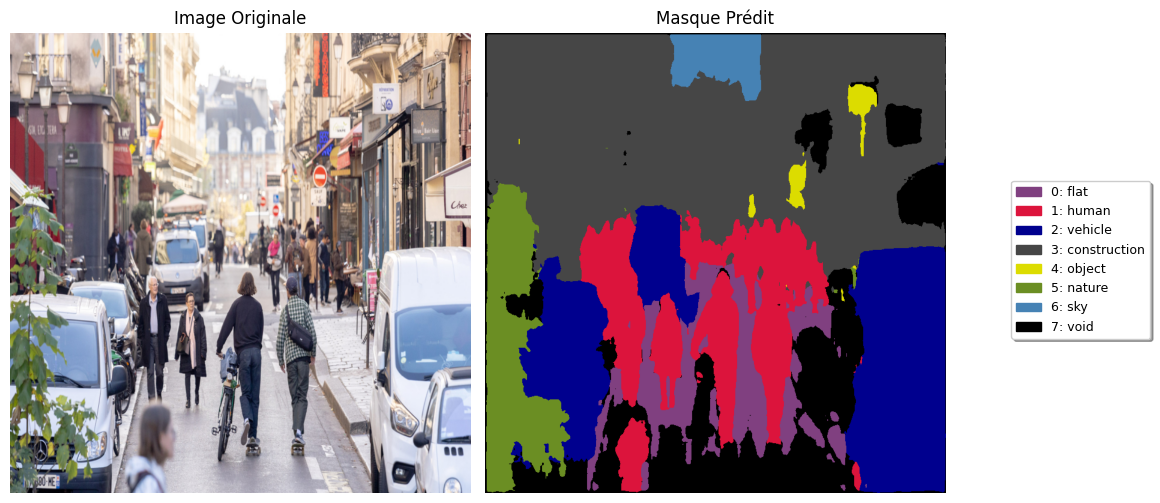


📊 Statistiques du masque prédit:
   flat: 39878 pixels (6.8%)
   human: 74386 pixels (12.6%)
   vehicle: 105056 pixels (17.8%)
   construction: 223362 pixels (37.9%)
   object: 4608 pixels (0.8%)
   nature: 39450 pixels (6.7%)
   sky: 12340 pixels (2.1%)
   void: 90744 pixels (15.4%)

🥈 TEST DU DEUXIÈME MEILLEUR MODÈLE (Run: 4992e14daff845aabea9f44a56f499f6)
🔧 Encodeur: resnet34
📐 Taille: (768, 768)
=== INFÉRENCE PYTORCH SUR paris_street.jpg ===
🔄 Préprocessing de l'image: paris_street.jpg
🔮 Exécution de l'inférence PyTorch...
✅ Inférence terminée - Shape: (768, 768)
⏱️ Temps d'inférence: 896.7 ms (0.8967 s)
💾 Résultat sauvegardé: ./results/paris_street_inference.png


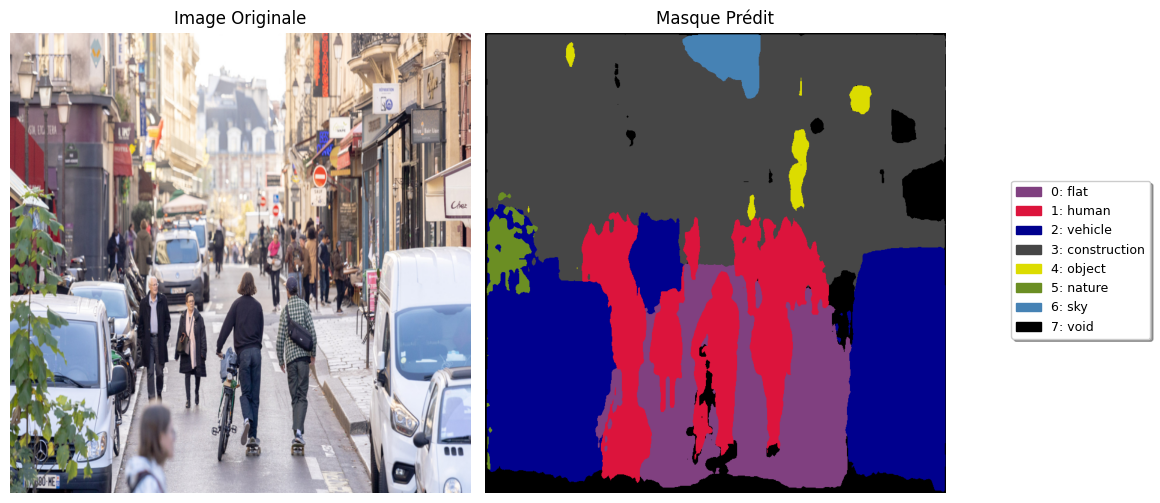


📊 Statistiques du masque prédit:
   flat: 71753 pixels (12.2%)
   human: 78837 pixels (13.4%)
   vehicle: 137423 pixels (23.3%)
   construction: 239263 pixels (40.6%)
   object: 5144 pixels (0.9%)
   nature: 7150 pixels (1.2%)
   sky: 8764 pixels (1.5%)
   void: 41490 pixels (7.0%)

📊 COMPARAISON DES TEMPS D'INFÉRENCE
🥇 Meilleur modèle (mit_b1):
   ⏱️  1517.6 ms (1.5176 s)
   🆔 Run: c9835f7094354f48baff73f5d71edfc9

🥈 Deuxième meilleur modèle (resnet34):
   ⏱️  896.7 ms (0.8967 s)
   🆔 Run: 4992e14daff845aabea9f44a56f499f6

🚀 Le deuxième modèle est 1.69x plus rapide !
📏 Différence absolue: 620.9 ms

🎯 RÉSUMÉ DE LA COMPARAISON
🖼️  Image testée: paris_street.jpg
📊 Précision (supposée): Meilleur > Deuxième
⚡ Vitesse: Deuxième modèle plus rapide
🏆 Trade-off: Précision vs Vitesse


In [48]:
# === COMPARAISON DES MODÈLES ===

# 1. Charger la configuration des classes
mapping_config = load_cityscapes_config("../cityscapes_config.json")
print(f"🎨 Nombre de classes: {mapping_config['num_classes']}")

# Image de test
image_path = "./content/new_images_to_predict/paris_street.jpg"
print(f"\n🖼️ Image de test: {os.path.basename(image_path)}")
print("=" * 80)

# 2. Inférence avec le MEILLEUR modèle
print(f"\n🥇 TEST DU MEILLEUR MODÈLE (Run: {best_model_run_id})")
print(f"🔧 Encodeur: {best_model_encoder_name}")
print(f"📐 Taille: {best_model_script_img_size}")

predicted_mask1, inference_time1 = run_inference_and_visualize(
    image_path=image_path,
    model=best_model,
    encoder_name=None,
    img_size=best_model_script_img_size,
    mapping_config=mapping_config,
    save_dir="./results"
)

print("=" * 80)

# 3. Inférence avec le DEUXIÈME MEILLEUR modèle
print(f"\n🥈 TEST DU DEUXIÈME MEILLEUR MODÈLE (Run: {second_best_model_run_id})")
print(f"🔧 Encodeur: {second_best_model_encoder_name}")
print(f"📐 Taille: {second_best_model_script_img_size}")

predicted_mask2, inference_time2 = run_inference_and_visualize(
    image_path=image_path,
    model=second_best_model,
    encoder_name=None,
    img_size=second_best_model_script_img_size,
    mapping_config=mapping_config,
    save_dir="./results"
)

print("=" * 80)

# 4. COMPARAISON DES PERFORMANCES
print(f"\n📊 COMPARAISON DES TEMPS D'INFÉRENCE")
print("=" * 50)
print(f"🥇 Meilleur modèle ({best_model_encoder_name}):")
print(f"   ⏱️  {inference_time1*1000:.1f} ms ({inference_time1:.4f} s)")
print(f"   🆔 Run: {best_model_run_id}")

print(f"\n🥈 Deuxième meilleur modèle ({second_best_model_encoder_name}):")
print(f"   ⏱️  {inference_time2*1000:.1f} ms ({inference_time2:.4f} s)")
print(f"   🆔 Run: {second_best_model_run_id}")

# Calculer la différence
if inference_time1 < inference_time2:
    speedup = inference_time2 / inference_time1
    faster_model = "Meilleur"
    print(f"\n🚀 Le meilleur modèle est {speedup:.2f}x plus rapide !")
elif inference_time2 < inference_time1:
    speedup = inference_time1 / inference_time2
    faster_model = "Deuxième"
    print(f"\n🚀 Le deuxième modèle est {speedup:.2f}x plus rapide !")
else:
    print(f"\n⚖️  Les deux modèles ont des temps d'inférence identiques")

# Différence absolue
time_diff = abs(inference_time1 - inference_time2)
print(f"📏 Différence absolue: {time_diff*1000:.1f} ms")

# 5. RÉSUMÉ FINAL
print(f"\n🎯 RÉSUMÉ DE LA COMPARAISON")
print("=" * 40)
print(f"🖼️  Image testée: {os.path.basename(image_path)}")
print(f"📊 Précision (supposée): Meilleur > Deuxième")
print(f"⚡ Vitesse: {'Meilleur' if inference_time1 <= inference_time2 else 'Deuxième'} modèle plus rapide")
print(f"🏆 Trade-off: {'Équilibré' if abs(speedup-1) < 0.1 else 'Précision vs Vitesse'}")

== Groupes de classes Cityscapes ==
  - flat : ['road', 'sidewalk', 'parking', 'rail track']
  - human : ['person', 'rider']
  - vehicle : ['car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'caravan', 'trailer']
  - construction : ['building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel']
  - object : ['pole', 'pole group', 'traffic sign', 'traffic light']
  - nature : ['vegetation', 'terrain']
  - sky : ['sky']
  - void : ['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground']

== Mapping ID Cityscapes → Groupe ==
  ID  0 ('unlabeled') → groupe 'void' (7)
  ID  1 ('ego vehicle') → groupe 'void' (7)
  ID  2 ('rectification border') → groupe 'void' (7)
  ID  3 ('out of roi') → groupe 'void' (7)
  ID  4 ('static') → groupe 'void' (7)
  ID  5 ('dynamic') → groupe 'void' (7)
  ID  6 ('ground') → groupe 'void' (7)
  ID  7 ('road') → groupe 'flat' (0)
  ID  8 ('sidewalk') → groupe 'flat' (0)
  ID  9 ('parking') → groupe 'flat' (0)
  ID 10

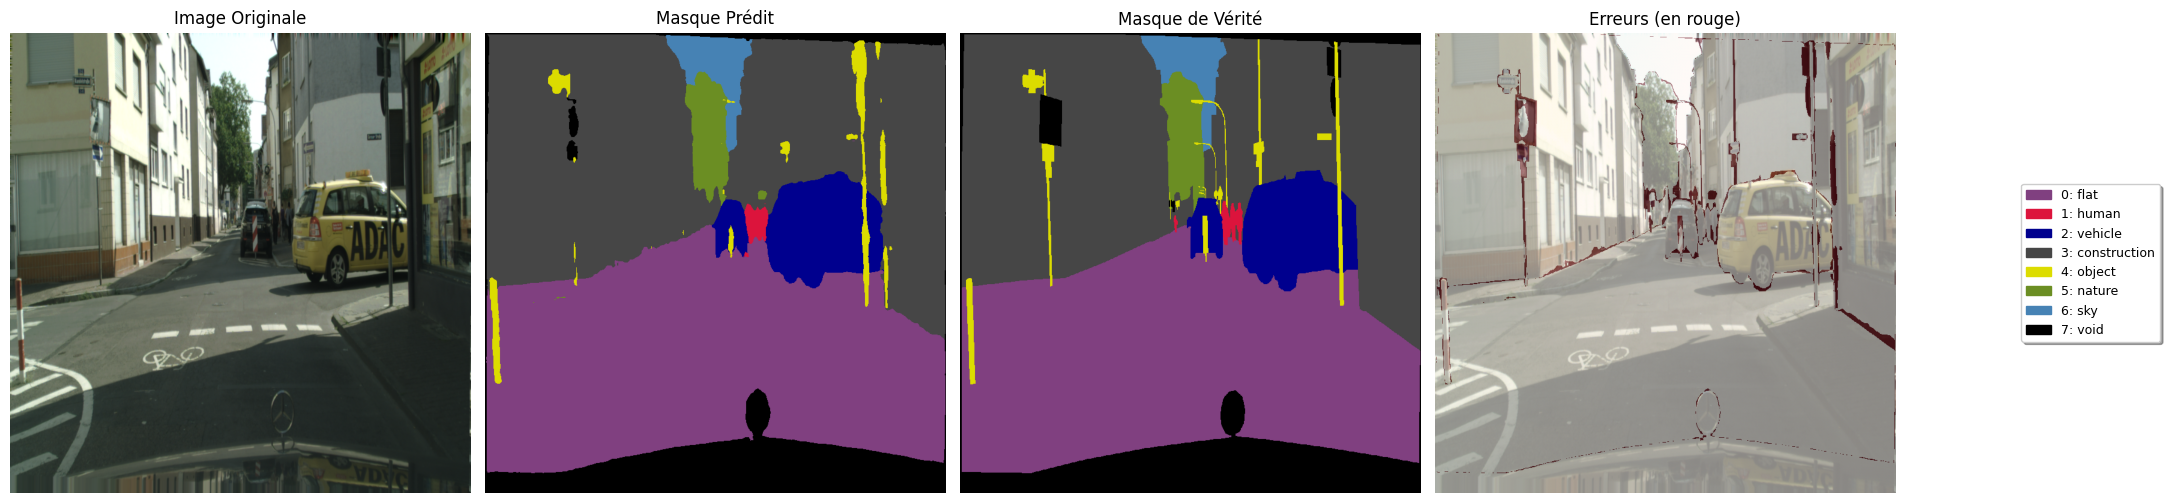


📊 Statistiques du masque prédit:
   flat: 224709 pixels (38.1%)
   human: 1937 pixels (0.3%)
   vehicle: 31553 pixels (5.3%)
   construction: 233854 pixels (39.6%)
   object: 10470 pixels (1.8%)
   nature: 11465 pixels (1.9%)
   sky: 10827 pixels (1.8%)
   void: 65009 pixels (11.0%)

📊 Statistiques du masque de vérité:
   flat: 223051 pixels (37.8%)
   human: 1915 pixels (0.3%)
   vehicle: 32409 pixels (5.5%)
   construction: 231660 pixels (39.3%)
   object: 10393 pixels (1.8%)
   nature: 11844 pixels (2.0%)
   sky: 10436 pixels (1.8%)
   void: 68116 pixels (11.5%)

🥈 TEST DU DEUXIÈME MEILLEUR MODÈLE (Run: 4992e14daff845aabea9f44a56f499f6)
🔧 Encodeur: resnet34
📐 Taille: (768, 768)
=== INFÉRENCE PYTORCH SUR frankfurt_000000_000294_leftImg8bit.png ===
🔄 Préprocessing de l'image: frankfurt_000000_000294_leftImg8bit.png
🔄 Préprocessing du masque: frankfurt_000000_000294_gtFine_labelIds.png
   Valeurs uniques avant mapping: [ 1  2  3  4  7  8 11 13 17 20]...
   Valeurs uniques après mappin

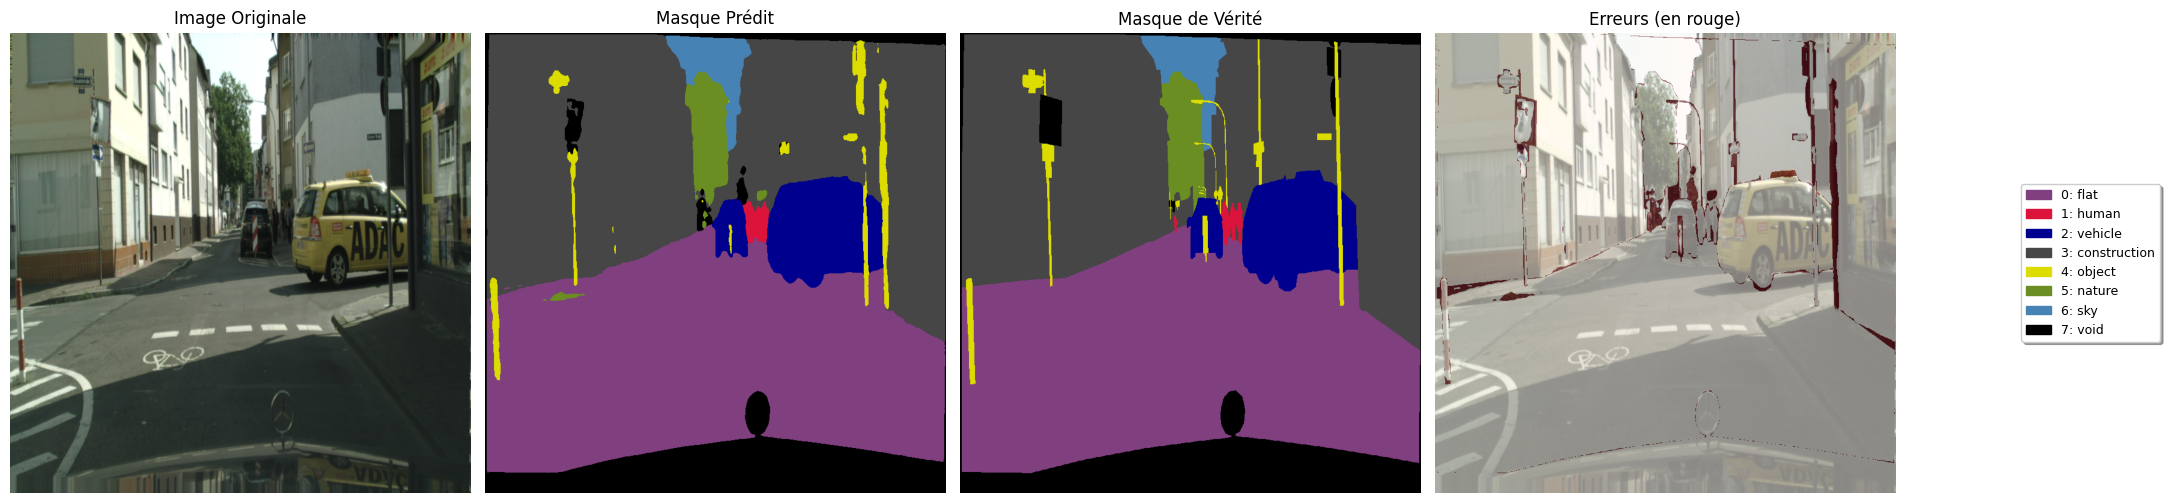


📊 Statistiques du masque prédit:
   flat: 222442 pixels (37.7%)
   human: 2241 pixels (0.4%)
   vehicle: 32134 pixels (5.4%)
   construction: 231122 pixels (39.2%)
   object: 11898 pixels (2.0%)
   nature: 12120 pixels (2.1%)
   sky: 10426 pixels (1.8%)
   void: 67441 pixels (11.4%)

📊 Statistiques du masque de vérité:
   flat: 223051 pixels (37.8%)
   human: 1915 pixels (0.3%)
   vehicle: 32409 pixels (5.5%)
   construction: 231660 pixels (39.3%)
   object: 10393 pixels (1.8%)
   nature: 11844 pixels (2.0%)
   sky: 10436 pixels (1.8%)
   void: 68116 pixels (11.5%)

📊 COMPARAISON DES TEMPS D'INFÉRENCE
🥇 Meilleur modèle (mit_b1):
   ⏱️  1268.7 ms (1.2687 s)
   🆔 Run: c9835f7094354f48baff73f5d71edfc9

🥈 Deuxième meilleur modèle (resnet34):
   ⏱️  553.8 ms (0.5538 s)
   🆔 Run: 4992e14daff845aabea9f44a56f499f6

🚀 Le deuxième modèle est 2.29x plus rapide !
📏 Différence absolue: 714.9 ms

🎯 ANALYSE QUALITATIVE
📊 Les visualisations ci-dessus montrent:
   • Image originale
   • Masque prédit 

In [49]:
# === COMPARAISON DES MODÈLES AVEC MASQUES DE VÉRITÉ ===

# 1. Charger la configuration des classes
mapping_config = load_cityscapes_config("../cityscapes_config.json")
print(f"🎨 Nombre de classes: {mapping_config['num_classes']}")

# Chemins des données de test avec ground truth
image_path = "./content/data/test_images_sample/original/frankfurt_000000_000294_leftImg8bit.png"
mask_path = "./content/data/test_images_sample/mask/frankfurt_000000_000294_gtFine_labelIds.png"

print(f"\n🖼️ Image de test: {os.path.basename(image_path)}")
print(f"🎯 Masque de vérité: {os.path.basename(mask_path)}")
print("=" * 80)

# 2. Inférence avec le MEILLEUR modèle
print(f"\n🥇 TEST DU MEILLEUR MODÈLE (Run: {best_model_run_id})")
print(f"🔧 Encodeur: {best_model_encoder_name}")
print(f"📐 Taille: {best_model_script_img_size}")

predicted_mask1, inference_time1 = run_inference_and_visualize(
    image_path=image_path,
    mask_path=mask_path,
    model=best_model,
    encoder_name=None,
    img_size=best_model_script_img_size,
    mapping_config=mapping_config,
    save_dir="./results"
)

print("=" * 80)

# 3. Inférence avec le DEUXIÈME MEILLEUR modèle
print(f"\n🥈 TEST DU DEUXIÈME MEILLEUR MODÈLE (Run: {second_best_model_run_id})")
print(f"🔧 Encodeur: {second_best_model_encoder_name}")
print(f"📐 Taille: {second_best_model_script_img_size}")

predicted_mask2, inference_time2 = run_inference_and_visualize(
    image_path=image_path,
    mask_path=mask_path,
    model=second_best_model,
    encoder_name=None,
    img_size=second_best_model_script_img_size,
    mapping_config=mapping_config,
    save_dir="./results"
)

print("=" * 80)

# 4. COMPARAISON DES PERFORMANCES
print(f"\n📊 COMPARAISON DES TEMPS D'INFÉRENCE")
print("=" * 50)
print(f"🥇 Meilleur modèle ({best_model_encoder_name}):")
print(f"   ⏱️  {inference_time1*1000:.1f} ms ({inference_time1:.4f} s)")
print(f"   🆔 Run: {best_model_run_id}")

print(f"\n🥈 Deuxième meilleur modèle ({second_best_model_encoder_name}):")
print(f"   ⏱️  {inference_time2*1000:.1f} ms ({inference_time2:.4f} s)")
print(f"   🆔 Run: {second_best_model_run_id}")

# Calculer la différence de vitesse
if inference_time1 < inference_time2:
    speedup = inference_time2 / inference_time1
    faster_model = "Meilleur"
    print(f"\n🚀 Le meilleur modèle est {speedup:.2f}x plus rapide !")
elif inference_time2 < inference_time1:
    speedup = inference_time1 / inference_time2
    faster_model = "Deuxième"
    print(f"\n🚀 Le deuxième modèle est {speedup:.2f}x plus rapide !")
else:
    print(f"\n⚖️  Les deux modèles ont des temps d'inférence identiques")

# Différence absolue
time_diff = abs(inference_time1 - inference_time2)
print(f"📏 Différence absolue: {time_diff*1000:.1f} ms")

# 5. ANALYSE QUALITATIVE (basée sur les visualisations affichées)
print(f"\n🎯 ANALYSE QUALITATIVE")
print("=" * 30)
print(f"📊 Les visualisations ci-dessus montrent:")
print(f"   • Image originale")
print(f"   • Masque prédit par chaque modèle")
print(f"   • Masque de vérité terrain")
print(f"   • Zones d'erreurs (en rouge)")
print(f"   • Statistiques détaillées par classe")

print(f"\n💡 Pour une évaluation quantitative précise,")
print(f"   calculez les métriques IoU, Dice, Accuracy sur le dataset complet.")

# 6. RÉSUMÉ FINAL
print(f"\n🎯 RÉSUMÉ DE LA COMPARAISON AVEC GROUND TRUTH")
print("=" * 50)
print(f"🖼️  Image testée: {os.path.basename(image_path)}")
print(f"🎯 Masque de référence: {os.path.basename(mask_path)}")
print(f"📊 Précision visuelle: Comparez les zones d'erreurs (rouge)")
print(f"⚡ Vitesse: {'Meilleur' if inference_time1 <= inference_time2 else 'Deuxième'} modèle plus rapide")
print(f"🏆 Recommandation: Analysez visuellement la qualité des prédictions")

# Comparaison SegFormer B1 vs FPN+ResNet34 - Segmentation Urbaine

## Résumé Exécutif

**SegFormer B1** remporte la bataille de la précision tandis que **FPN+ResNet34** domine en termes de vitesse d'inférence. Le choix entre ces deux modèles dépend donc du trade-off précision/vitesse requis pour l'application.

## Métriques Globales

| Métrique | SegFormer B1 | FPN+ResNet34 | Avantage |
|----------|--------------|--------------|----------|
| **Mean IoU** | 0.800 | 0.792 | SegFormer (+0.8%) |
| **Accuracy** | 0.927 | 0.925 | SegFormer (+0.2%) |
| **Temps d'inférence** | 1393.2 ms | 725.3 ms | **FPN (-47.9%)** |
| **Vitesse relative** | 1x | **1.92x plus rapide** | FPN |

## Performance par Classe (IoU)

### Classes où SegFormer B1 excelle le plus

1. **Human** (+1.8%) - **Avantage critique** pour la détection des personnes et cyclistes
2. **Vehicle** (+1.0%) - Segmentation des véhicules
3. **Construction** (+0.9%) - Bâtiments, murs, ponts
4. **Nature** (+1.0%) - Végétation et terrain

### Classes équivalentes

- **Flat** (~0%) - Routes et trottoirs (performance similaire)
- **Object** (+0.6%) - Poteaux et signalisation (légère avantage SegFormer)
- **Sky** (+0.7%) - Détection du ciel
- **Void** (+0.1%) - Zones non-labellisées

## Analyse Détaillée

### Points Forts du SegFormer B1

- **Précision supérieure** sur 7/8 classes
- **Architecture Transformer** moderne avec attention globale
- **Avantage critique sur les humains** (+1.8%) - essentiel pour la sécurité
- **Meilleure généralisation** sur les objets complexes (humains, véhicules)
- **Contours plus nets** et moins de bruit dans les prédictions
- **Potentiel d'amélioration** avec les variantes B2-B5 (non testées)

### Points Forts du FPN+ResNet34

- **Vitesse d'inférence accrue** (~2x plus rapide)
- **Architecture CNN mature** et éprouvée
- **Performance très proche** en précision malgré la simplicité
- **Efficiency computationnelle** remarquable

### Analyse des Statistiques d'Inférence

**Images testées :**
1. **paris_street.jpg** - Test de généralisation (sans masque de vérité)
2. **frankfurt_000000_000294_leftImg8bit.png** - Test avec ground truth

**Cohérence des prédictions** entre les deux modèles observée sur les deux images :
- Construction : ~39-40% (bâtiments urbains dominants)
- Flat : ~37-38% (routes et trottoirs)
- Vehicle : ~5-17% (variable selon la scène)
- Void : ~7-15% (zones d'exclusion)

## Recommandations d'Usage

### Choisir SegFormer B1 si :
- La **précision maximale** est prioritaire
- La **détection d'humains** est critique (sécurité, surveillance)
- Le **temps d'inférence** n'est pas critique
- L'application nécessite une **détection fine** des personnes/véhicules
- Les ressources computationnelles sont **suffisantes**
- Budget disponible pour **matériel d'inférence optimisé**

### Choisir FPN+ResNet34 si :
- La **vitesse** est critique (applications temps-réel)
- Les ressources sont **limitées**
- La différence de précision (+0.8%) est **acceptable**
- L'application nécessite un **débit élevé** d'images

## Limitations et Contexte de l'Étude

### Contraintes Expérimentales

- **Budget limité** : Plan mensuel avec crédits restreints pour l'entraînement
- **Modèles SegFormer** : Tests limités au B1, variantes B2-B5 non explorées par contrainte budgétaire
- **Temps d'inférence** : Tests réalisés sur **CPU uniquement** (temps non-optimisés)
- **Amélioration CNN** : Potentiel d'optimisation des architectures FPN non exploré

### Évolution par rapport aux travaux précédents

**Progrès réalisés :**
- **Résolution augmentée** : Passage de 224x224 à 512x512 et 768x768
- **Architectures modernes** : Introduction des Transformers (SegFormer) vs CNN uniquement
- **Bénéfice universel** : L'augmentation de résolution a amélioré tous les modèles testés

### Limites persistantes

**Prétraitement générique :**
- Normalisation basique (division par 255) pour tous les backbones
- Potentiel d'optimisation spécifique à chaque architecture non exploité

**Limitations des données :**
- **Généralisation limitée** : Dataset Cityscapes uniquement urbain, conditions météo homogènes
- **Backbones pré-entraînés** : ImageNet vs datasets spécialisés (Mapillary Vistas)
- **Performance sur humains** : IoU perfectible sur la classe la plus critique
- **Convergence des performances** : Écarts faibles suggérant une limitation par le dataset

**Contraintes techniques :**
- **Tailles fixes** : Images redimensionnées pour l'entraînement, impact sur la généralisation
- **Performances temps-réel** : Non évaluées sur matériel optimisé

### Perspectives d'Amélioration

**SegFormer B2-B5** : Versions avec plus de paramètres offrant potentiellement de meilleures performances au prix d'une complexité accrue.

**Optimisation du preprocessing** : Normalisation spécifique aux backbones, augmentation de données ciblée sur les humains (IA générative).

**Transfer learning spécialisé** : Backbones pré-entraînés sur Mapillary Vistas plutôt qu'ImageNet.

**Optimisation matérielle** : L'inférence GPU ou sur puces dédiées (Edge AI) réduirait drastiquement les temps de traitement pour les deux architectures.

**Trade-offs budgétaires** :
- **Entraînement** : Modèles complexes nécessitent plus de ressources
- **Déploiement** : Solutions temps-réel requièrent du matériel spécialisé

## Conclusion

Le choix optimal dépend du contexte applicatif et des contraintes budgétaires. Pour des applications où la détection d'humains est critique (systèmes de sécurité, véhicules autonomes), le gain de +1.8% du SegFormer B1 sur cette classe peut justifier l'investissement. Pour des systèmes de surveillance générale ou d'analyse urbaine, FPN+ResNet34 offre un excellent compromis.

**Points clés à retenir :**
- **Inférence CPU** : Les temps mesurés ne reflètent pas les performances réelles en déploiement optimisé
- **Potentiel SegFormer** : Versions B2-B5 non testées par contrainte budgétaire
- **Maturité CNN** : FPN+ResNet34 reste compétitif face aux Transformers modernes

**Recommandation stratégique** : FPN+ResNet34 pour le prototypage et les budgets serrés, SegFormer B1+ pour les applications critiques avec budget d'infrastructure adapté.

In [50]:
!pip freeze > requirements.txt